# <font color =#0095B6 > Telecome Churn Case Study </font>

#### Import libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, warnings

warnings.filterwarnings("ignore")
pd.set_option("display.precision", 2)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_selection import RFE
import warnings
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import sklearn

#### import csv file

In [8]:
df=pd.read_csv('telecom_churn_data.csv',encoding='palmos')

In [9]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  \
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.38  214.82  213.80   21.10          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN           NaN           NaN          0.00           NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN   
1     7001865778        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.05  355.07  268.32   86.28        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00               0.0              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00               0.0               0.0   
2     7001625959        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  167.69  189.06  210.23  290.71        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91            0.0           0.00           0.00          38.49            0.0           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24               0.0            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83               0.0               0.0   

In [10]:
df.shape

(99999, 226)

In [5]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [11]:
df.describe(include='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
count        1.00e+05    99999.0         98981.0         98981.0         98981.0                99999                99398                98899                98340  99999.00  99999.00  99999.00  99999.00     96062.00     96140.00     94621.00     92254.00      96062.00      96140.00      94621.00      92254.00       96062.00       96140.00       94621.00       92254.00       96062.00       96140.00       94621.00       92254.00          96062.00          96140.00          94621.00          92254.00          96062.00          96140.00          94621.00          92254.00          96062.00          96140.00          94621.00          92254.00          96062.00          96140.00          94621.00          92254.00      96062.00      96140.00      94621.00      92254.00          96062.00          96140.00          94621.00          92254.00          96062.00          96140.00          94621.00          92254.00          96062.00          96140.00          94621.00          92254.00   
unique            NaN        NaN             NaN             NaN             NaN                    1                    1                    1                    1       NaN       NaN       NaN       NaN          NaN          NaN          NaN          NaN           NaN           NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN           NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN   
top               NaN        NaN             NaN             NaN             NaN            6/30/2014            7/31/2014            8/31/2014            9/30/2014       NaN       NaN       NaN       NaN          NaN          NaN          NaN          NaN           NaN           NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN           NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN   
freq              NaN   

In [12]:
###The below function takes in a dataframe and a cutoff value as parameters and returns those columns from the data frame
###which have percentage of missing values more than the cutoff specified 

def missing_value(df,cutoff):
    missing_col=[]
    for i in df.columns:
        if round(100*df[i].isnull().sum()/len(df),2)>cutoff:
            missing_col.append(i)
    return round(100*df[missing_col].isnull().sum()/len(df),2)  

In [13]:
###Call the above function with our dataframe and a cutoff value of 50

missing_value(df,50)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

#### We remove column having more than 70% missing value present in data
#### segregate those column

In [14]:
missing_value(df,50)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [10]:
####Although Some of the columns in the dataframe have mising values are empty , they are not necessarily missing values
###but rather don't qualify to have any value under the arrangement they have .The values for these should be imputed to 0

In [15]:
impute_col=['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','max_rech_data_6','max_rech_data_7',
            'max_rech_data_8','max_rech_data_9','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
           'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9','av_rech_amt_data_6','av_rech_amt_data_7',
           'av_rech_amt_data_8','av_rech_amt_data_9','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7',
           'arpu_2g_8','arpu_2g_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6',
           'fb_user_7','fb_user_8','fb_user_9']

In [16]:
###Impute values with 0 for the above list of columns

for i in impute_col:
    df[i].fillna(0,inplace=True)

In [17]:
df.shape

(99999, 226)

In [18]:
round(100*(df.isnull().sum())/len(df),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

#### let's check again how many coulmn having missing value more than 50%

In [19]:
missing_value(df,50)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
dtype: float64

In [20]:
missing_col=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']

In [21]:
###Because of high percentage of missing values for the above columns they will need to be removed 

df=df.drop(missing_col,1)

In [22]:
df.shape

(99999, 222)

In [23]:
missing_coll=list(missing_value(df,7).index)

In [24]:
df[missing_coll]

onnet_mou_9  offnet_mou_9  roam_ic_mou_9  roam_og_mou_9  loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  loc_og_mou_9  std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  std_og_t2c_mou_9  std_og_mou_9  isd_og_mou_9  spl_og_mou_9  og_others_9  loc_ic_t2t_mou_9  loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  loc_ic_mou_9  std_ic_t2t_mou_9  std_ic_t2m_mou_9  std_ic_t2f_mou_9  std_ic_t2o_mou_9  std_ic_mou_9  spl_ic_mou_9  isd_ic_mou_9  ic_others_9
0              NaN           NaN            NaN            NaN               NaN               NaN               NaN               NaN           NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN          NaN               NaN               NaN               NaN           NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN          NaN
1            18.34         53.76           0.00           0.00             18.34             53.76              0.00              0.00         72.11              0.00              0.00               0.0               0.0          0.00           0.0          0.00          0.0            116.09             56.93              0.00        173.03              0.00             15.01              0.00               0.0         15.01          0.00          0.00         0.00
2            74.81        118.91          38.49          70.94             14.39             28.16             22.24              0.48         64.81              8.76              9.28               0.0               0.0         18.04           0.0         42.08          0.0            148.23             38.98            158.19        345.41             49.44            118.18              3.86               0.0        171.49          0.45          0.01         0.36
3           241.71        113.54           0.00           0.00             15.49             65.46              2.06              0.00         83.03            226.21              9.99               0.0               0.0        236.21           0.0         43.29          0.0             41.73             52.86             65.59        160.19            129.84             13.98              0.00               0.0        143.83          0.55          0.00         0.80
4            58.78         45.81           0.00           0.00             58.78             37.89              1.93              0.00         98.61              0.00              0.00               0.0               0.0          0.00           0.0          5.98          0.0            154.56             48.24              0.00        202.81              2.31              0.00              0.00               0.0          2.31          0.18          0.00         0.00
...            ...           ...            ...            ...               ...               ...               ...               ...           ...               ...               ...               ...               ...           ...           ...           ...          ...               ...               ...               ...           ...               ...               ...               ...               ...           ...           ...           ...          ...
99994         0.00         27.14           0.00           0.00              0.00             24.78              2.25              0.11         27.03              0.00              0.00               0.0               0.0          0.00           0.0          0.11          0.0             22.06             82.89             49.46        154.43              0.00              0.00              0.00               0.0          0.00          0.00          0.00         0.00
99995        49.49         56.13           0.95           4.23             49.49             46.71              3.28              0.00         99.49              0.00              1.90               0.0               0.0          1.90     

In [25]:
df[df[missing_coll].isnull().all(axis=1)][missing_coll].head()

onnet_mou_9  offnet_mou_9  roam_ic_mou_9  roam_og_mou_9  loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  loc_og_mou_9  std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  std_og_t2c_mou_9  std_og_mou_9  isd_og_mou_9  spl_og_mou_9  og_others_9  loc_ic_t2t_mou_9  loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  loc_ic_mou_9  std_ic_t2t_mou_9  std_ic_t2m_mou_9  std_ic_t2f_mou_9  std_ic_t2o_mou_9  std_ic_mou_9  spl_ic_mou_9  isd_ic_mou_9  ic_others_9
0           NaN           NaN            NaN            NaN               NaN               NaN               NaN               NaN           NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN          NaN               NaN               NaN               NaN           NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN          NaN
7           NaN           NaN            NaN            NaN               NaN               NaN               NaN               NaN           NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN          NaN               NaN               NaN               NaN           NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN          NaN
29          NaN           NaN            NaN            NaN               NaN               NaN               NaN               NaN           NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN          NaN               NaN               NaN               NaN           NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN          NaN
32          NaN           NaN            NaN            NaN               NaN               NaN               NaN               NaN           NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN          NaN               NaN               NaN               NaN           NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN          NaN
35          NaN           NaN            NaN            NaN               NaN               NaN               NaN               NaN           NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN          NaN               NaN               NaN               NaN           NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN          NaN

In [26]:
len(df[df[missing_coll].isnull().all(axis=1)][missing_coll])

7745

In [28]:
for i in missing_coll:
    df[i].fillna(0,inplace=True)

In [29]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  \
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.38  214.82  213.80   21.10          NaN          NaN         0.00         0.00           NaN           NaN          0.00          0.00            NaN            NaN           0.00           0.00            NaN            NaN           0.00           0.00               NaN               NaN              0.00              0.00               NaN               NaN              0.00              0.00               NaN               NaN              0.00              0.00               NaN               NaN              0.00              0.00           NaN           NaN          0.00          0.00               NaN               NaN              0.00              0.00               NaN               NaN              0.00              0.00               NaN               NaN              0.00               0.0               NaN   
1     7001865778        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.05  355.07  268.32   86.28        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00               0.0              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00               0.0               0.0   
2     7001625959        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  167.69  189.06  210.23  290.71        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91            0.0           0.00           0.00          38.49            0.0           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24               0.0            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83               0.0               0.0   

#### Check column with maximum missing values left

In [30]:
missing_value(df,2)

onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2c_mou_6       3.94
loc_og_t2c_mou_7       3.86
loc_og_t2c_mou_8       5.38
loc_og_mou_6           3.94
loc_og_mou_7           3.86
loc_og_mou_8           5.38
std_og_t2t_mou_6       3.94
std_og_t2t_mou_7       3.86
std_og_t2t_mou_8       5.38
std_og_t2m_mou_6       3.94
std_og_t2m_mou_7       3.86
std_og_t2m_mou_8       5.38
std_og_t2f_mou_6       3.94
std_og_t2f_mou_7       3.86
std_og_t2f_mou_8    

In [31]:
df.shape

(99999, 222)

In [32]:
del_col=list(missing_value(df,2).index)

In [33]:
df[df[del_col].isnull().all(axis=1)][del_col].head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  \
202           NaN          NaN          NaN           NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN          NaN          NaN          NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN   
275           NaN          NaN          NaN           NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN          NaN          NaN          NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN   
687           NaN          NaN          NaN           NaN           NaN           NaN            NaN            NaN            NaN            NaN            NaN            NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN          NaN          NaN          NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN           NaN   
1206          NaN          NaN

#### These columns are complete have missing value 
#### Let's drop these rows

In [34]:
df=df[~df[del_col].isnull().all(axis=1)]
df.shape

(99618, 222)

In [35]:
del_col.remove('date_of_last_rech_8')
del_col.remove('date_of_last_rech_9')

#### Impute nan with 0

In [36]:
for i in del_col:
    df[i].fillna(0,inplace=True)

#### Again checking missing value left

In [37]:
missing_value(df,0)

loc_og_t2o_mou          0.64
std_og_t2o_mou          0.64
loc_ic_t2o_mou          0.64
last_date_of_month_7    0.32
last_date_of_month_8    0.75
last_date_of_month_9    1.30
date_of_last_rech_6     1.49
date_of_last_rech_7     1.47
date_of_last_rech_8     3.25
date_of_last_rech_9     4.40
dtype: float64

In [38]:
del_col1=list(missing_value(df,0).index)

#### Checking the unique values present in those missing column

In [39]:
for i in del_col1:
    print(i)
    print(df[i].unique())

loc_og_t2o_mou
[ 0. nan]
std_og_t2o_mou
[ 0. nan]
loc_ic_t2o_mou
[ 0. nan]
last_date_of_month_7
['7/31/2014' nan]
last_date_of_month_8
['8/31/2014' nan]
last_date_of_month_9
['9/30/2014' nan]
date_of_last_rech_6
['6/21/2014' '6/29/2014' '6/17/2014' '6/28/2014' '6/26/2014' '6/19/2014'
 '6/27/2014' '6/25/2014' '6/14/2014' '6/18/2014' '6/20/2014' '6/30/2014'
 '6/23/2014' nan '6/22/2014' '6/24/2014' '6/12/2014' '6/3/2014'
 '6/11/2014' '6/16/2014' '6/10/2014' '6/15/2014' '6/13/2014' '6/7/2014'
 '6/8/2014' '6/6/2014' '6/2/2014' '6/4/2014' '6/5/2014' '6/1/2014'
 '6/9/2014']
date_of_last_rech_7
['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
date_of_last_rech_8
['8/8/2014' 

#### we are going to impute the mode value to missing value

In [40]:
del_col_1=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']

In [41]:
df['loc_og_t2o_mou'].fillna(df['loc_og_t2o_mou'].mode()[0],inplace=True)
df['std_og_t2o_mou'].fillna(df['std_og_t2o_mou'].mode()[0],inplace=True)
df['loc_ic_t2o_mou'].fillna(df['loc_ic_t2o_mou'].mode()[0],inplace=True)
df['loc_og_t2o_mou'].fillna(df['loc_og_t2o_mou'].mode()[0],inplace=True)
df['last_date_of_month_7'].fillna(df['last_date_of_month_7'].mode()[0],inplace=True)
df['last_date_of_month_8'].fillna(df['last_date_of_month_8'].mode()[0],inplace=True)
df['last_date_of_month_9'].fillna(df['last_date_of_month_9'].mode()[0],inplace=True)

In [42]:
missing_value(df,0)

date_of_last_rech_6    1.49
date_of_last_rech_7    1.47
date_of_last_rech_8    3.25
date_of_last_rech_9    4.40
dtype: float64

In [43]:
col1=list(missing_value(df,0).index)

In [44]:
df[df[col1].isnull().all(axis=1)][col1].head()

date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9
4019                  NaN                 NaN                 NaN                 NaN
7344                  NaN                 NaN                 NaN                 NaN
8477                  NaN                 NaN                 NaN                 NaN
13358                 NaN                 NaN                 NaN                 NaN
14254                 NaN                 NaN                 NaN                 NaN

In [45]:
df=df[~df[col1].isnull().all(axis=1)]
df.shape

(99596, 222)

#### All the values are missing in same column

In [46]:
df['date_of_last_rech_6'].fillna('6/30/2014',inplace=True)
df['date_of_last_rech_7'].fillna('7/31/2014',inplace=True)
df['date_of_last_rech_8'].fillna('8/31/2014',inplace=True)
df['date_of_last_rech_9'].fillna('9/30/2014',inplace=True)

In [48]:
###Check for columns with missing values now

round(100*df.isnull().sum()/len(df),2).sum()

0.0

In [49]:
df.shape

(99596, 222)

In [50]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  \
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.38  214.82  213.80   21.10         0.00         0.00         0.00         0.00          0.00          0.00          0.00          0.00            0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00               0.0              0.00              0.00              0.00          0.00          0.00          0.00          0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00               0.0               0.0   
1     7001865778        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.05  355.07  268.32   86.28        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00               0.0              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00               0.0               0.0   
2     7001625959        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  167.69  189.06  210.23  290.71        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91            0.0           0.00           0.00          38.49            0.0           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24               0.0            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83               0.0               0.0   

##### there are some column have all values =0
##### we are going to remove those column

In [51]:
col=[]
for i in df.columns:
    if (df[i].values==0).all():
        col.append(i)
        print(i)

loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
std_ic_t2o_mou_9


#### 11 columns have found to be 0 value

In [52]:
df=df.drop(col,1)

#### Convert  data type of column having date value

In [55]:
col=list(df.filter(regex='date').columns)

In [56]:
col

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [57]:
for i in col:
    df[i]=pd.to_datetime(df[i],format='%m/%d/%Y')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99596 entries, 0 to 99998
Columns: 211 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(168), int64(35)
memory usage: 161.1 MB


#### we are going to create new feature, which will help us data modeling

#### Let's add volume of 2g and 3g data value and create a single feature of each month

In [59]:
for i in range(6,10):
    df['vol_data_mb_'+str(i)]=(df['vol_2g_mb_'+str(i)]+df['vol_3g_mb_'+str(i)]).astype(int)

#### Let's find our high value customers

In [60]:
col = df.filter(regex=('count')).columns
df[col].head()

count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  count_rech_3g_9
0              0.0              0.0              0.0              0.0              1.0              1.0              1.0              0.0
1              0.0              1.0              2.0              0.0              0.0              0.0              0.0              0.0
2              0.0              0.0              0.0              1.0              0.0              0.0              0.0              0.0
3              0.0              0.0              0.0              0.0              0.0              0.0              0.0              0.0
4              1.0              0.0              0.0              0.0              0.0              0.0              0.0              0.0

##### Creating new feature: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9

In [61]:
for i in range(6,10):
    df['avg_rech_amt_'+str(i)] = round(df['total_rech_amt_'+str(i)]/df['total_rech_num_'+str(i)]+1,2)

In [62]:
missingColList=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9']

In [63]:
for i in missingColList:
    df[i].fillna(0,inplace=True)

#### Creating new feature: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9

#### These will store the total number of data recharge (=count_rech_2g + count_rech_3g ) for each month.

In [64]:
for i in range(6,10):
    df['total_rech_num_data_'+str(i)] = (df['count_rech_2g_'+str(i)]+df['count_rech_3g_'+str(i)]).astype(int)

#### Creating new feature: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9

#### These will store the total amount of data recharge (=total_rech_num_data * av_rech_amt_data ) for each month.

In [65]:
for i in range(6,10):
    df['total_rech_amt_data_'+str(i)] = df['total_rech_num_data_'+str(i)]*df['av_rech_amt_data_'+str(i)]

#### Creating new feature: total_month_rech_6,total_month_rech_7,total_month_rech_8,total_month_rech_9

####  will store the total recharge amount (= total_rech_amt + total_rech_amt_data ) for each customer, for each month.

In [66]:
for i in range(6,10):
    df['total_month_rech_'+str(i)] = df['total_rech_amt_'+str(i)]+df['total_rech_amt_data_'+str(i)]
df.filter(regex=('total_month_rech')).head()

total_month_rech_6  total_month_rech_7  total_month_rech_8  total_month_rech_9
0               614.0               504.0               504.0                 0.0
1                74.0               538.0               383.0               121.0
2               168.0               315.0               116.0               404.0
3               230.0               310.0               601.0               410.0
4               252.0               350.0               287.0               200.0

In [67]:
avg_goodphase=(df.total_month_rech_6+df.total_month_rech_7)/2

In [68]:
cutoff=np.percentile(avg_goodphase,70)

In [70]:
print('Cutoff for high value customers is :',cutoff)

Cutoff for high value customers is : 480.0


In [71]:
df_hv=df[avg_goodphase>=cutoff]
df_hv.reset_index(inplace=True,drop=True)

In [72]:
df_hv.shape

(29882, 231)

#### percentage of high users in data

In [73]:
round(len(df_hv)/df.shape[0]*100,2)

30.0

#### Create target variable churn with values as either 0 or 1

In [74]:
df_hv['churn']=df_hv[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1).map(lambda x:1 if x==0 else 0)

In [78]:
df_hv.churn.value_counts()

0    27467
1     2415
Name: churn, dtype: int64

In [79]:
len(df_hv.churn==1)

29882

#### there are only 8% churn cases

In [80]:
round(len(df_hv[df_hv.churn == 1])/df_hv.shape[0] *100,2)

8.08

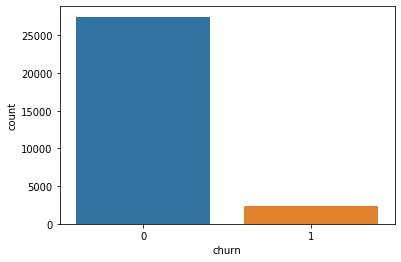

In [81]:
sns.countplot(x='churn',data=df_hv)

In [82]:
df_hv.shape

(29882, 232)

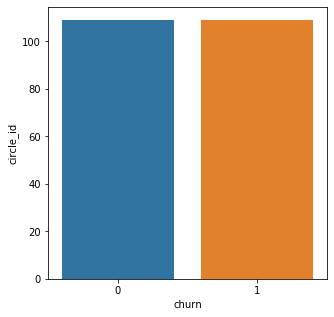

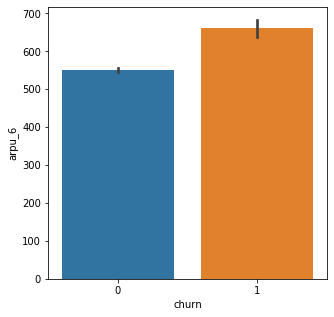

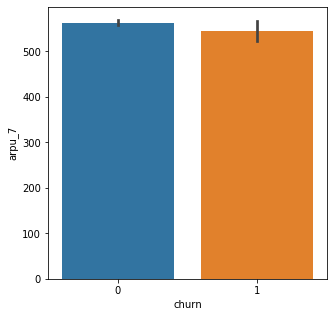

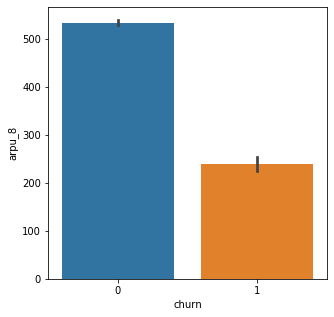

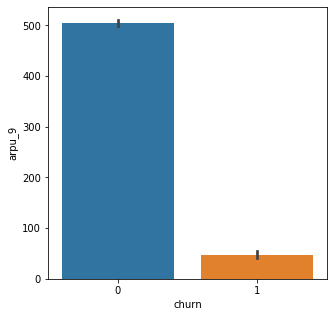

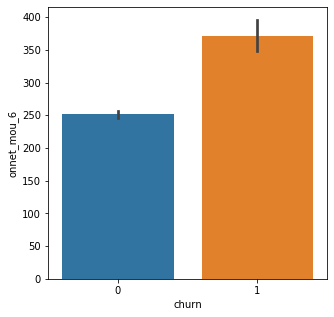

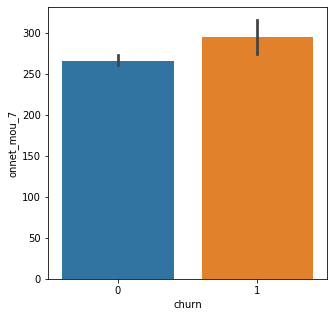

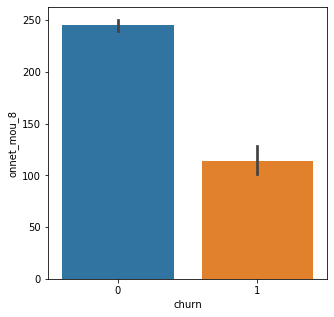

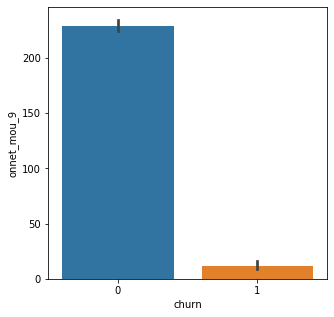

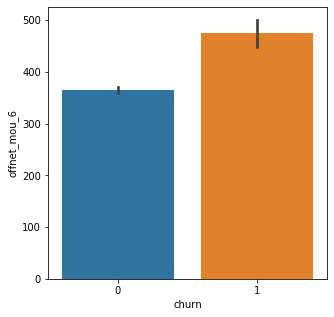

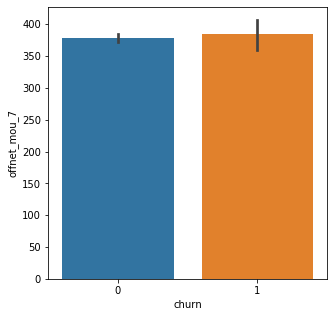

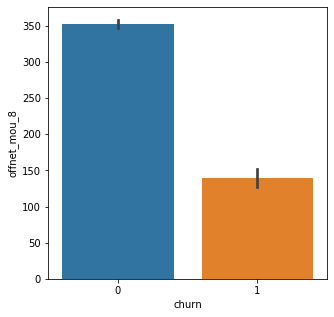

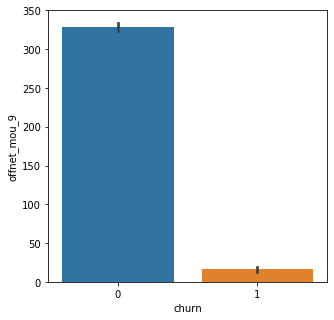

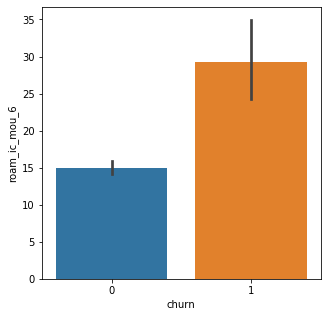

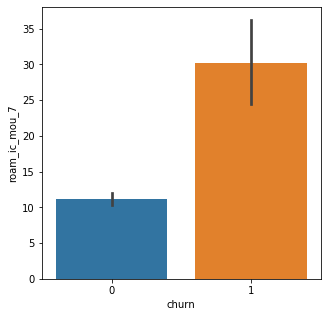

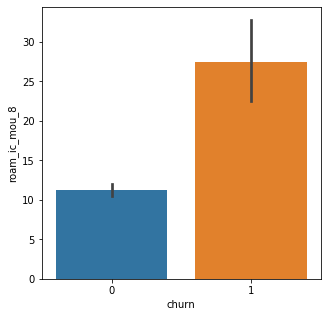

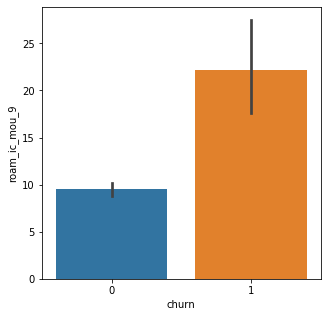

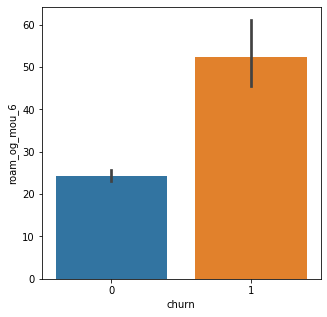

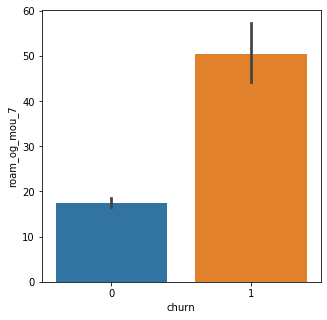

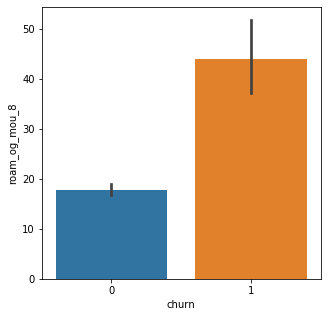

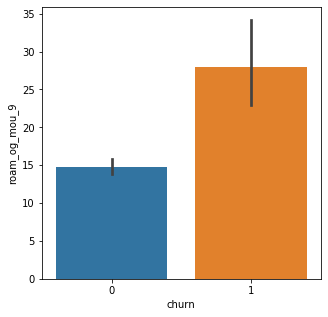

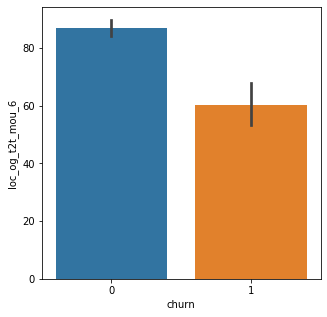

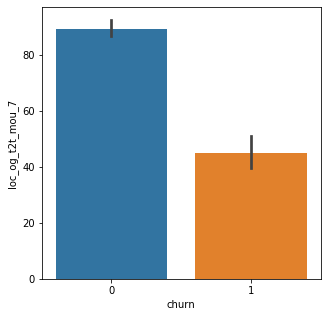

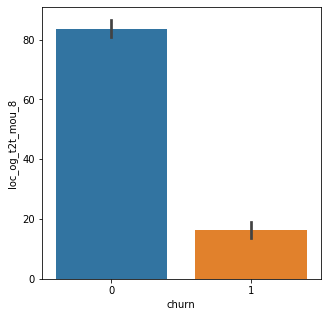

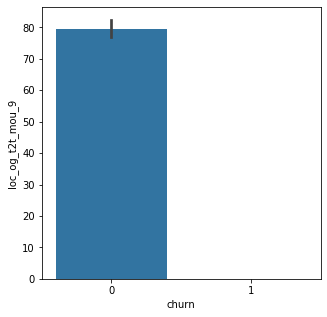

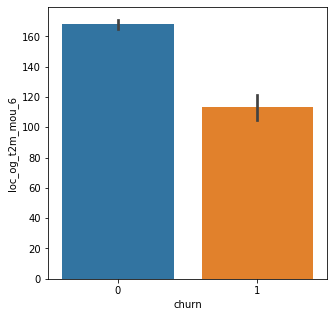

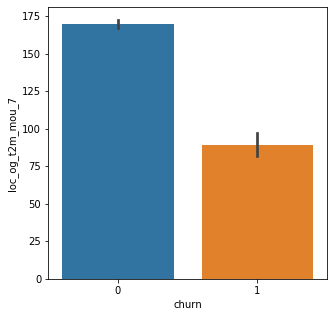

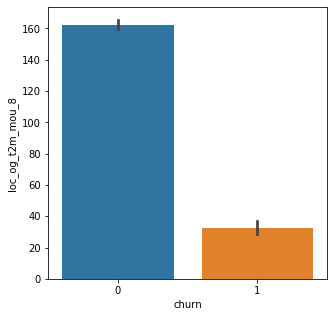

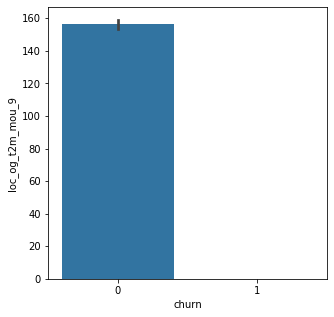

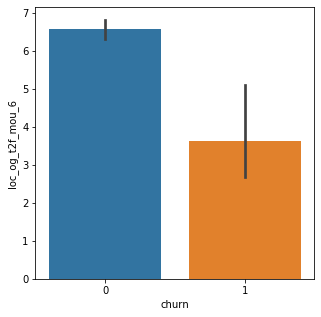

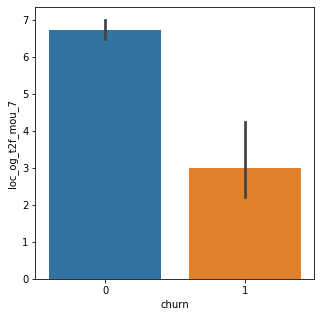

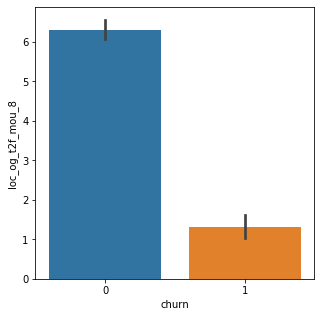

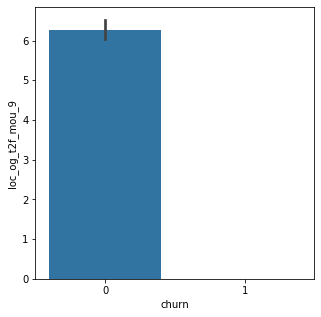

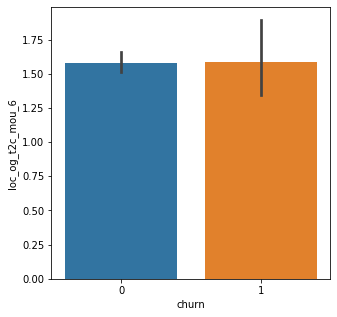

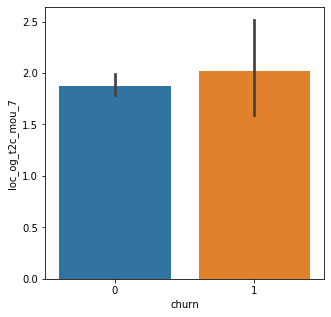

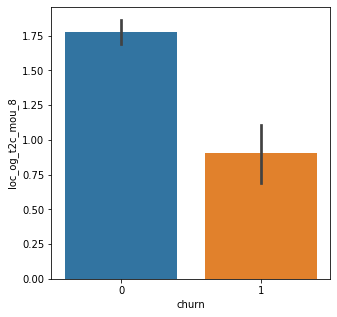

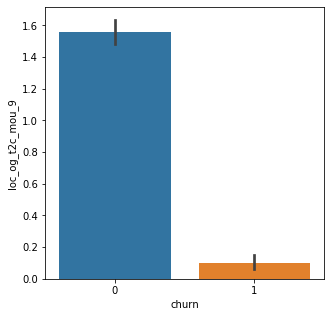

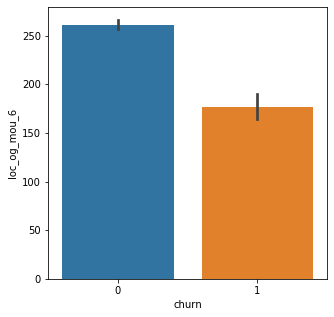

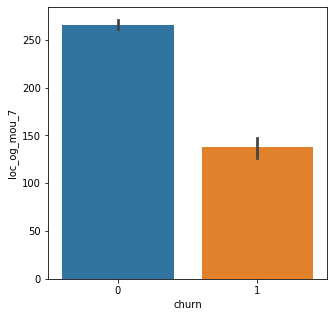

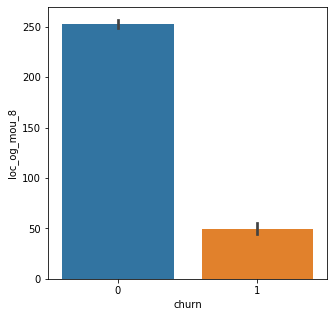

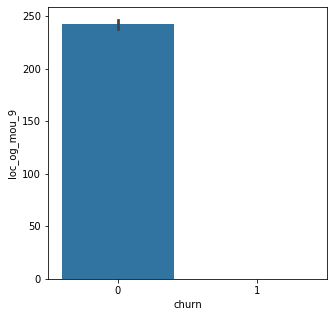

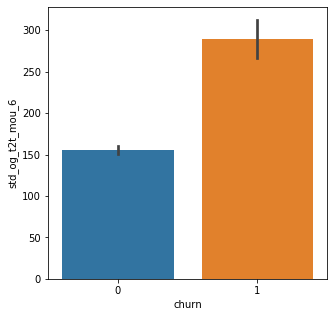

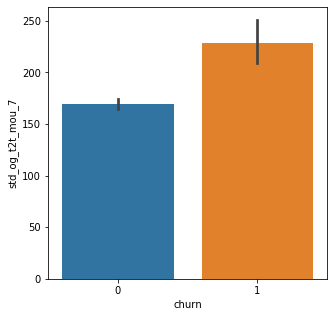

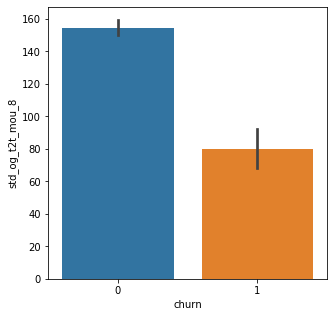

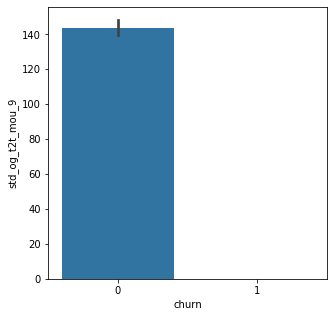

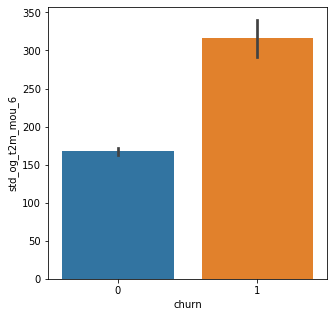

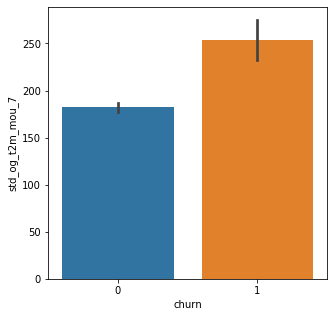

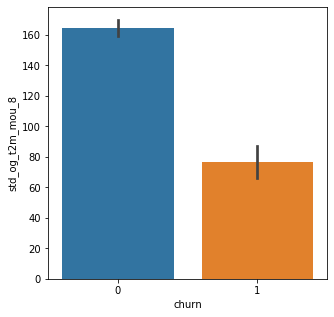

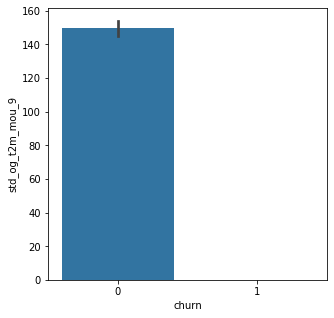

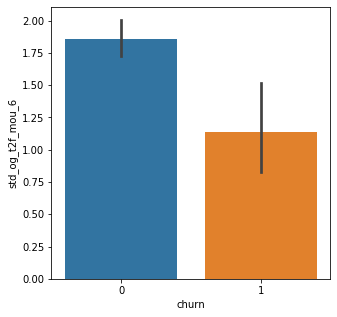

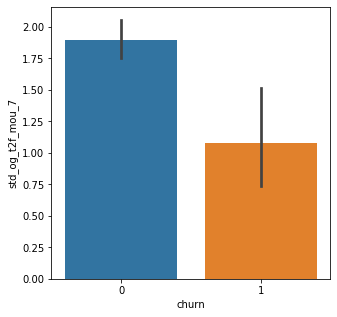

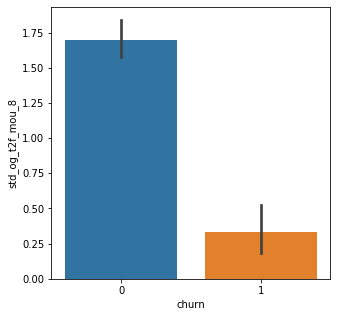

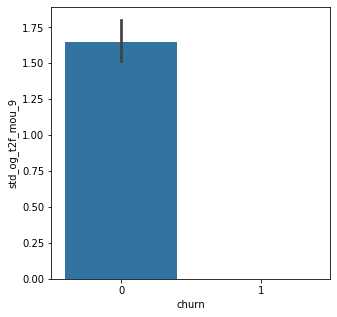

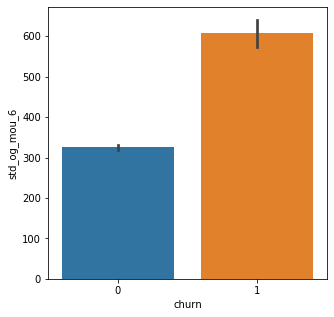

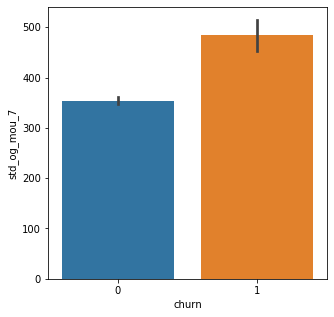

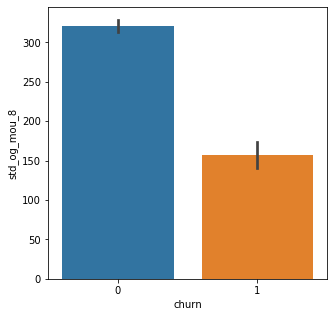

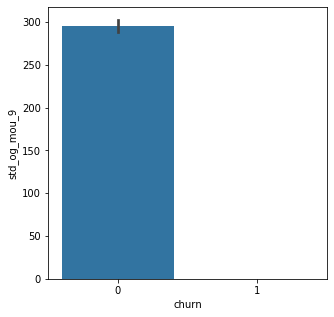

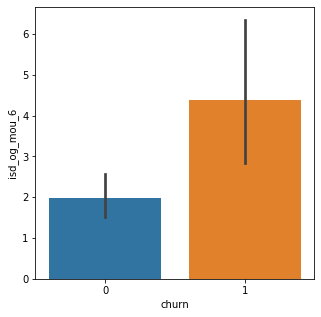

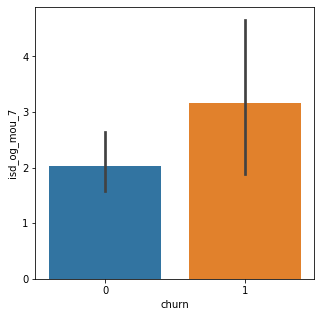

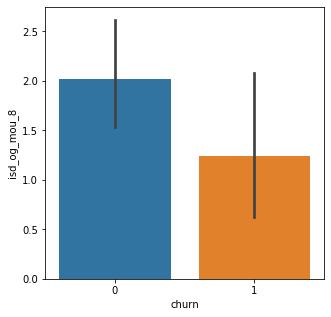

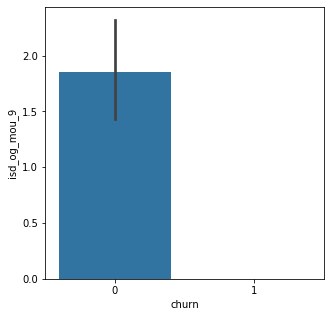

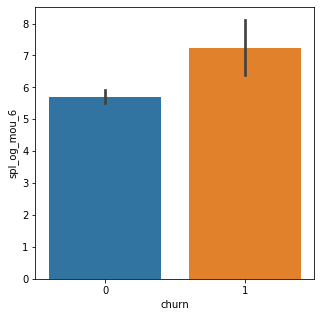

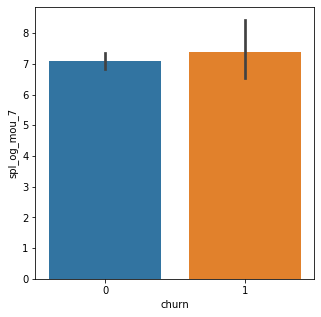

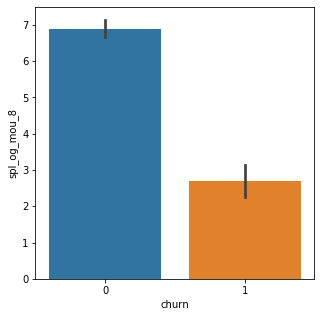

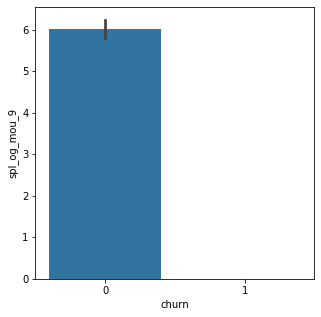

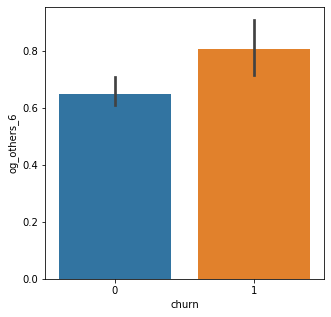

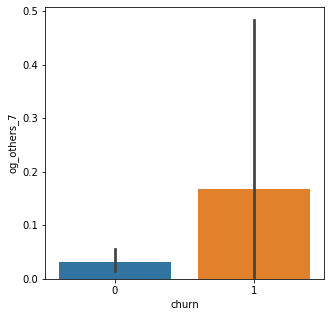

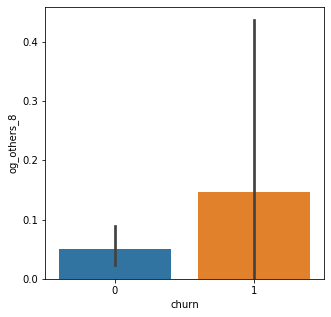

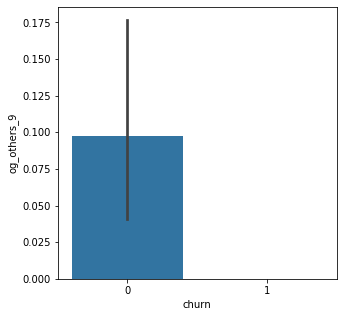

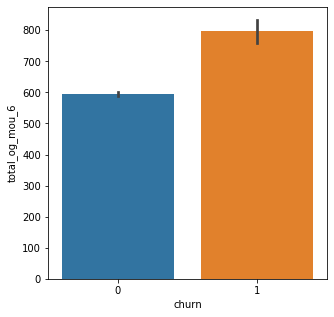

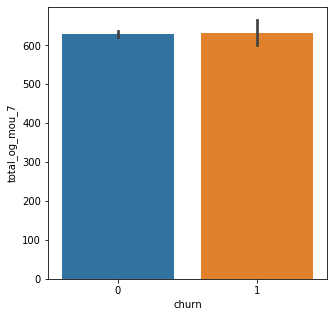

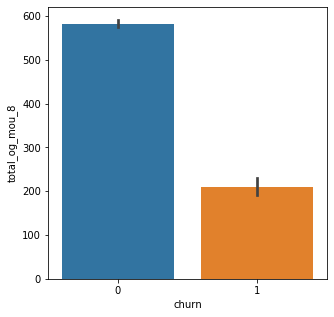

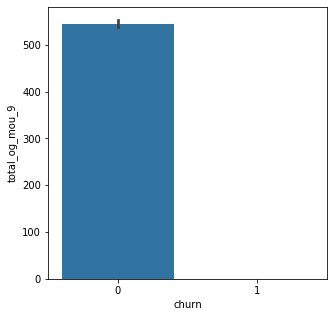

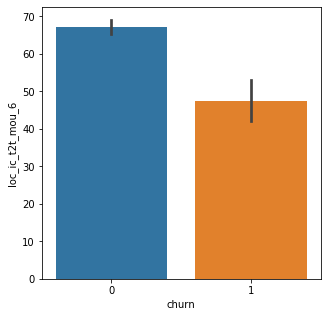

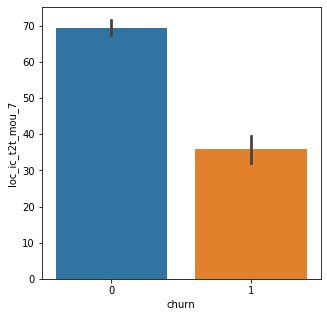

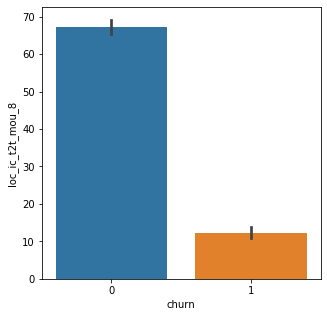

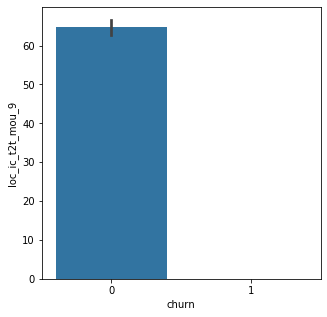

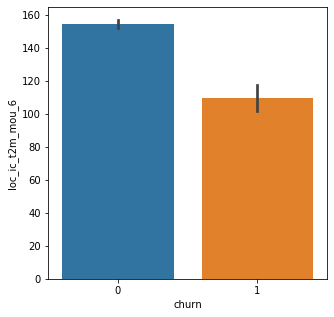

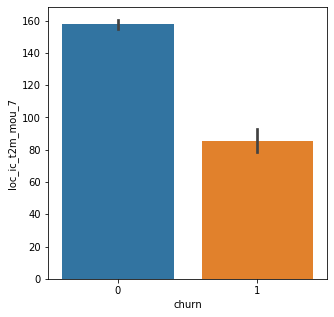

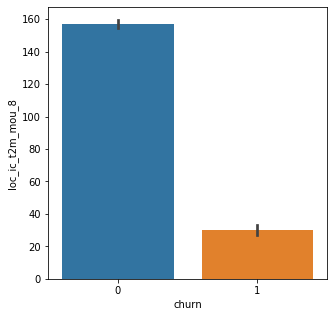

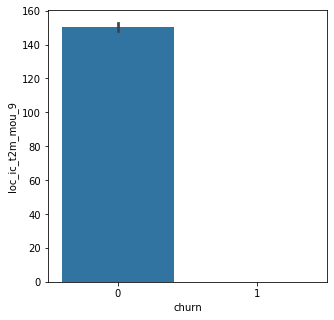

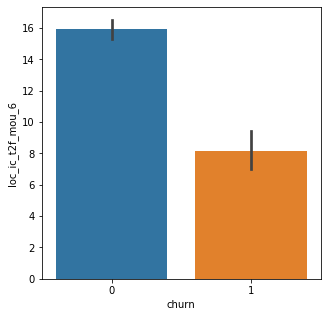

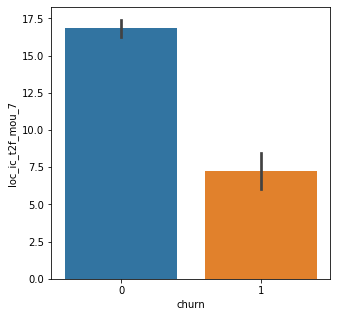

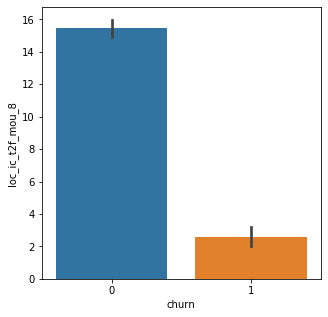

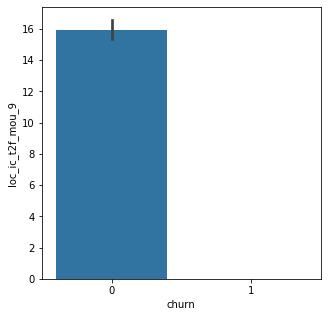

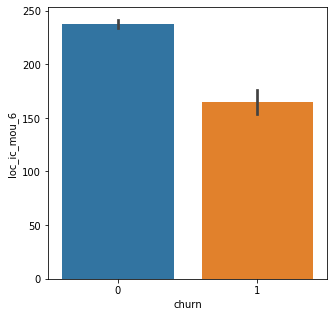

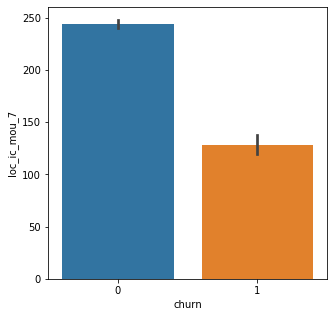

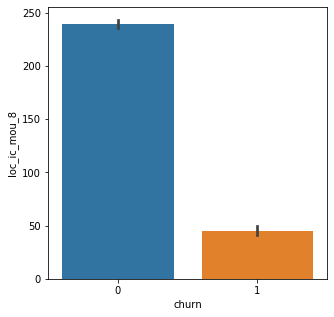

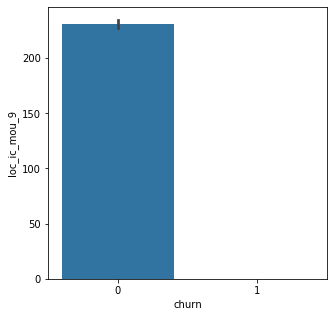

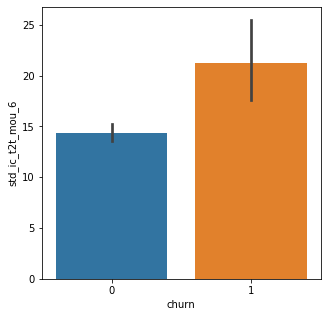

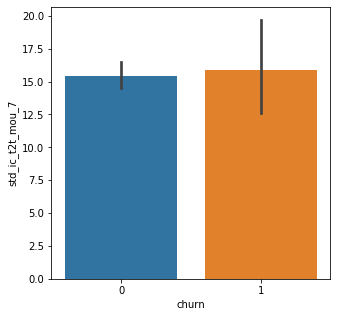

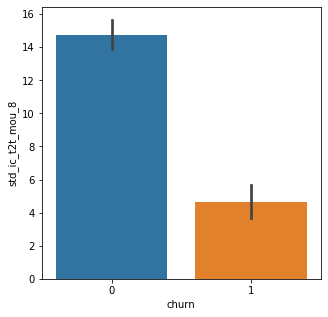

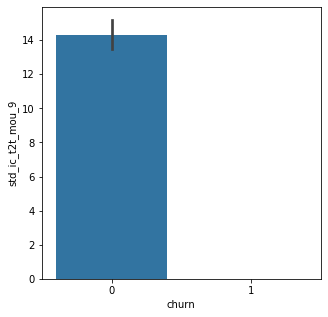

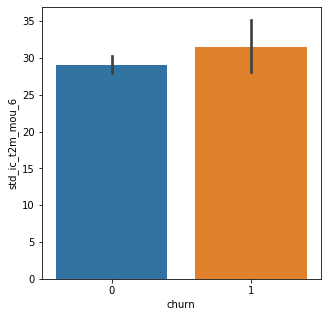

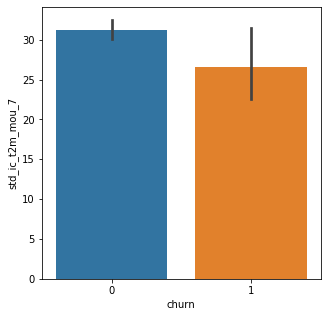

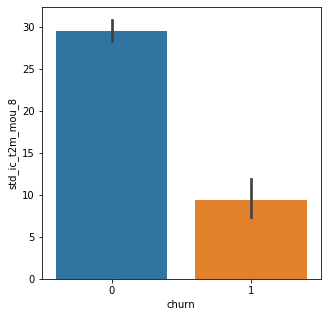

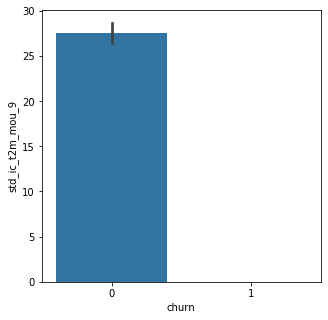

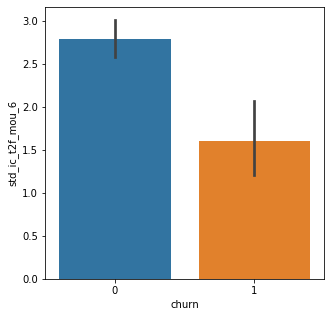

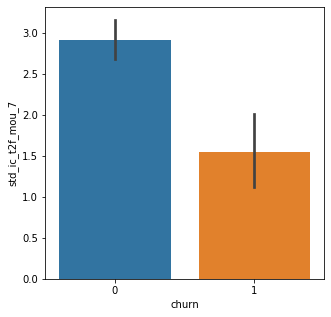

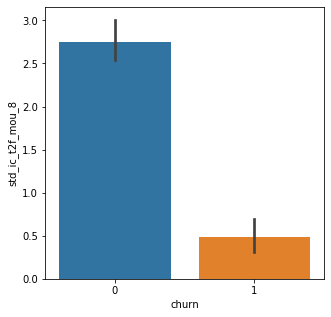

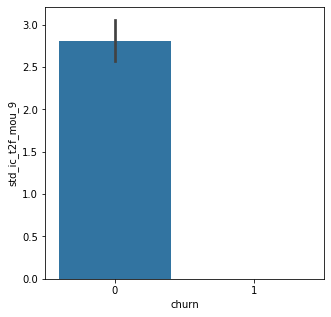

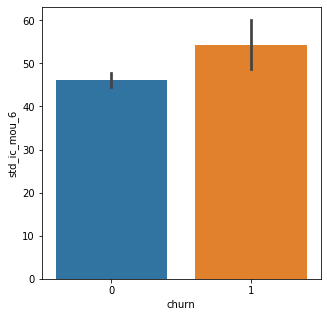

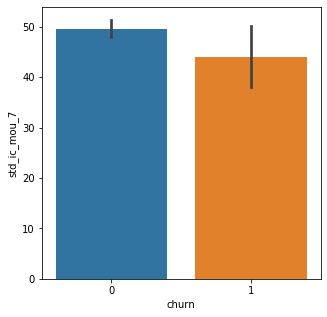

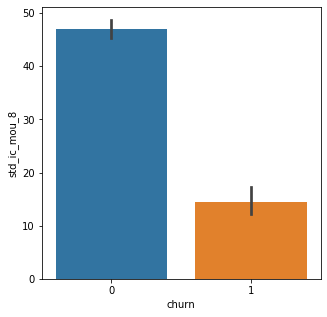

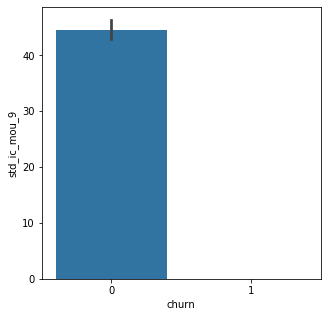

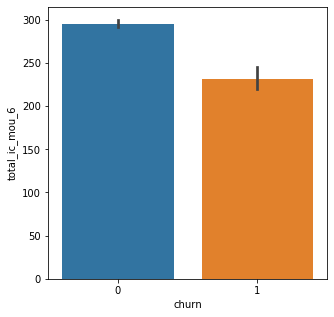

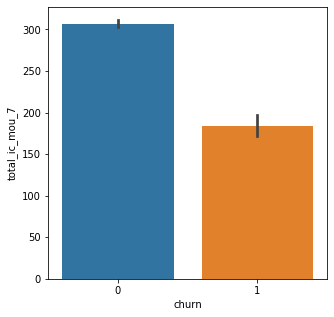

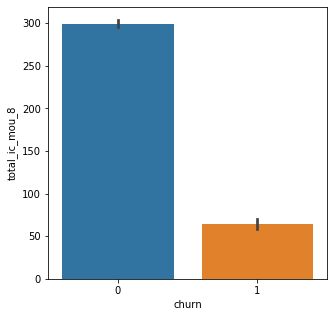

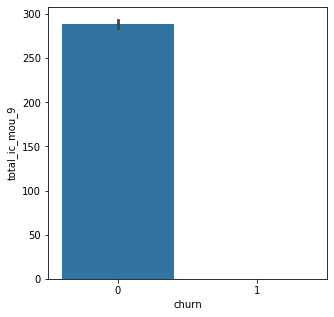

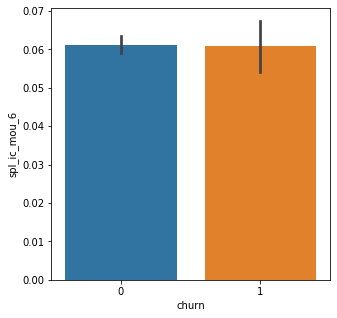

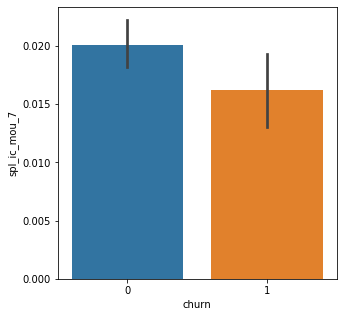

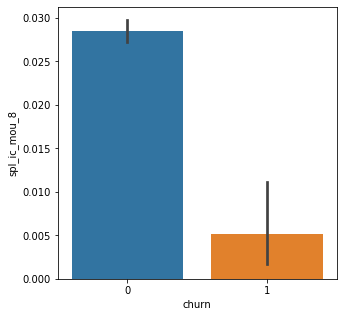

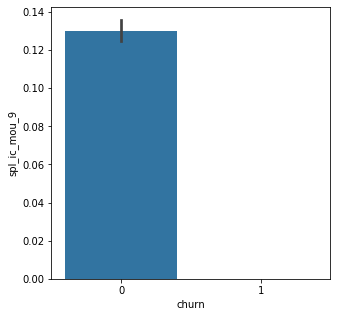

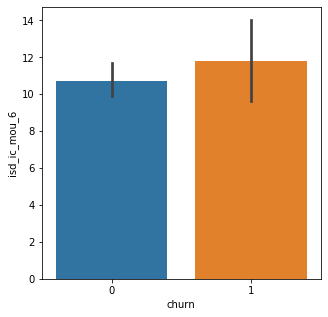

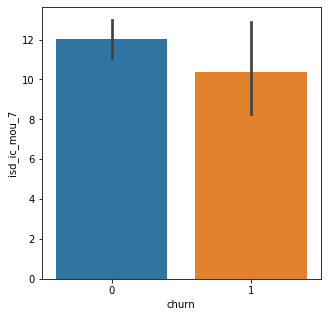

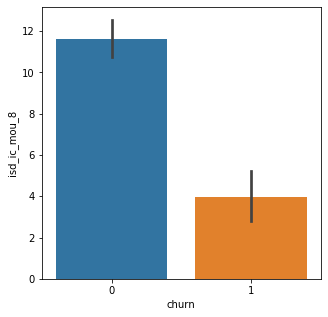

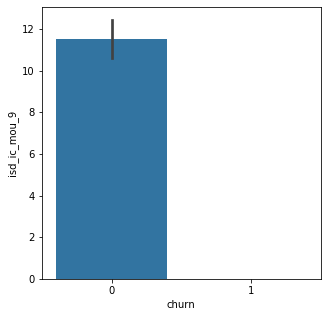

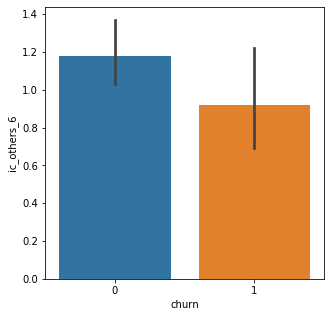

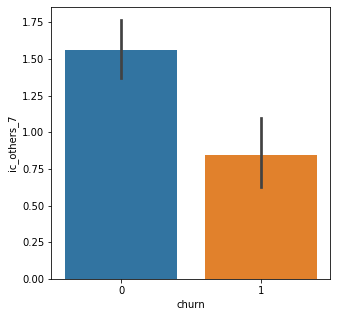

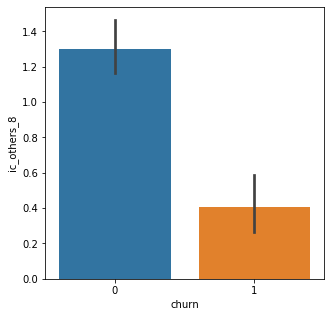

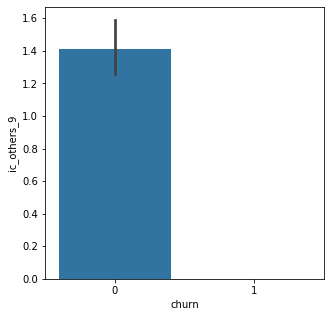

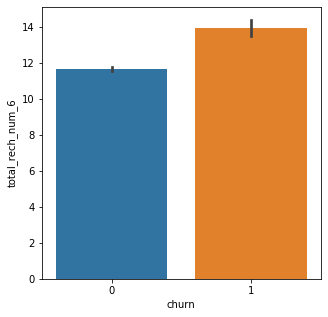

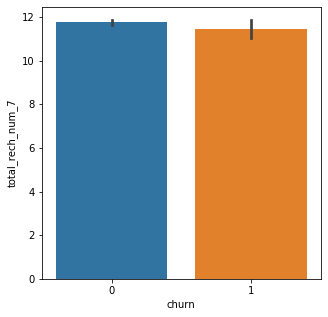

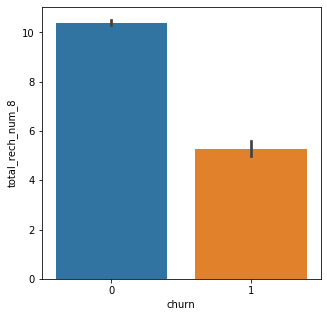

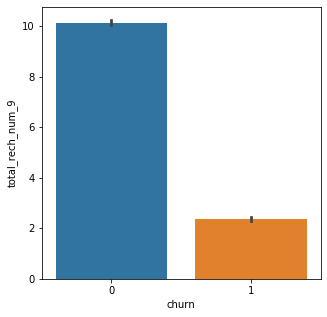

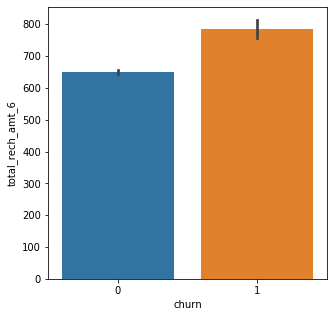

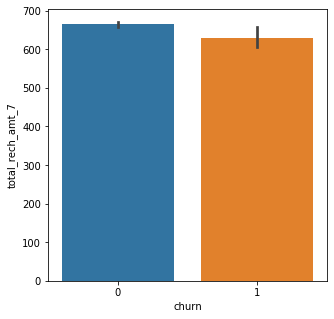

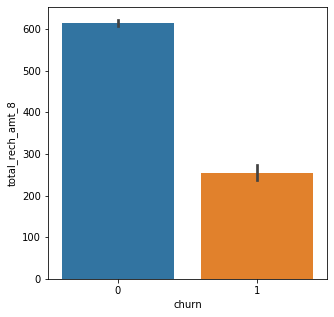

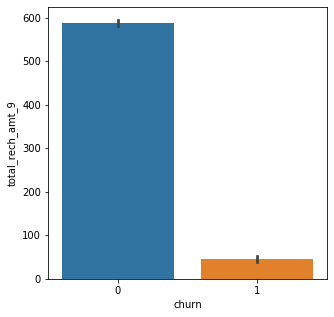

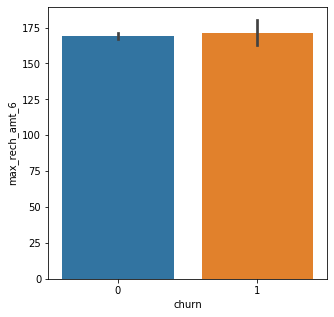

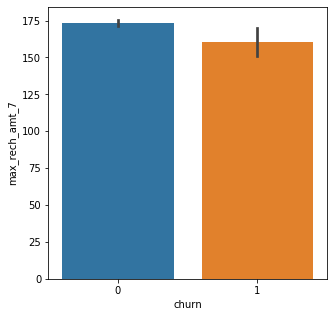

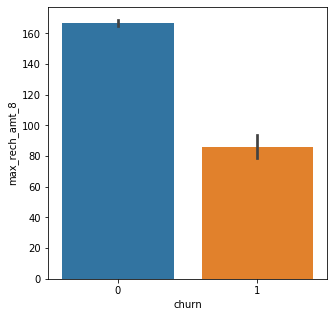

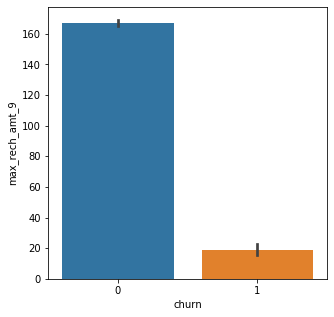

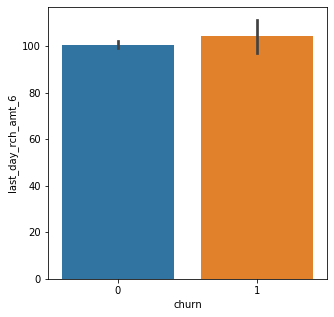

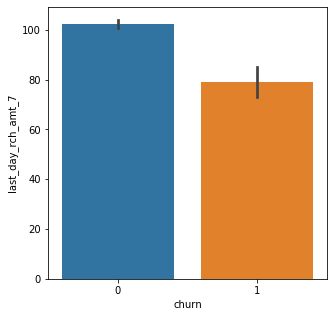

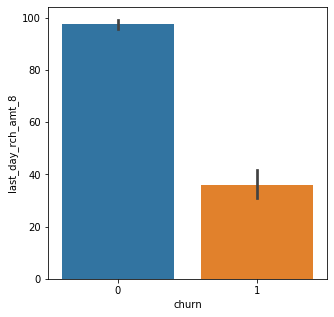

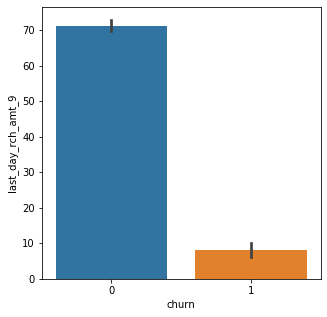

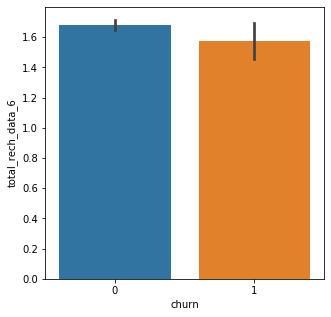

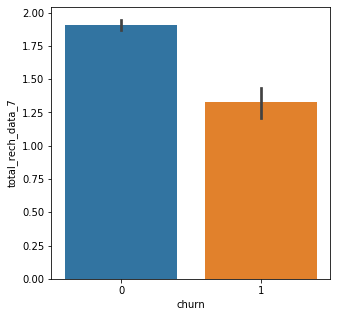

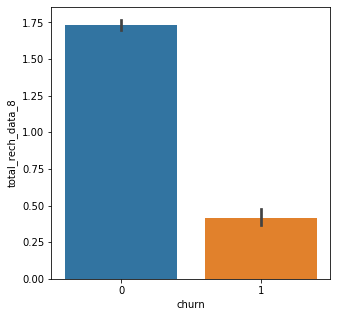

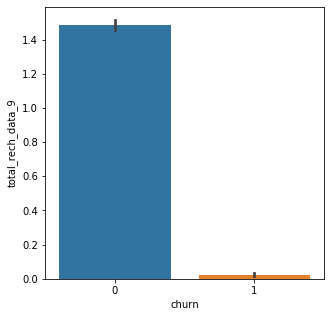

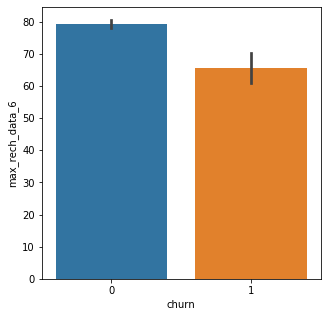

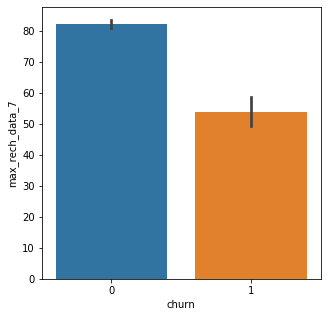

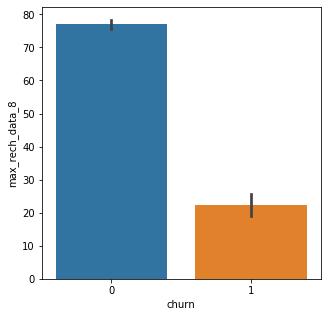

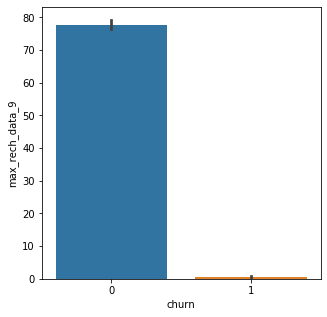

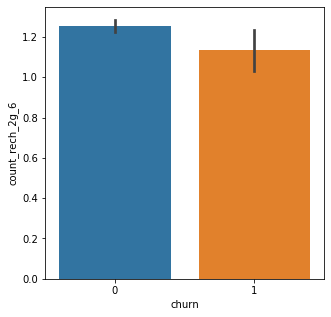

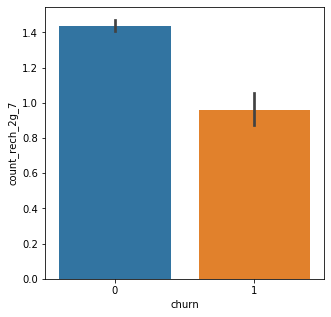

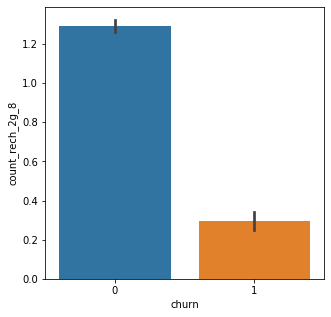

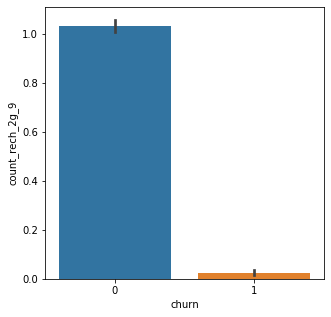

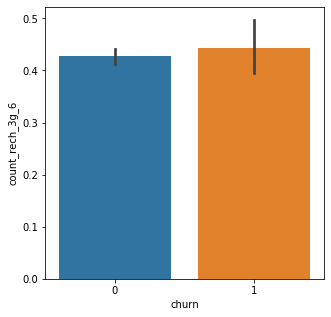

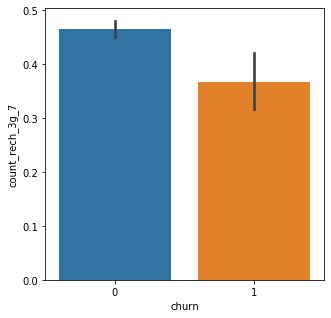

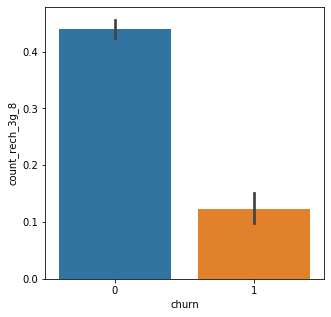

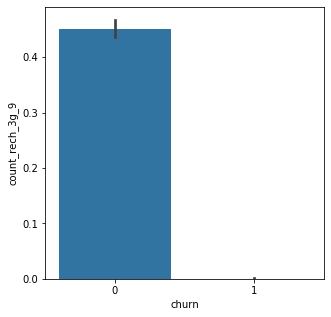

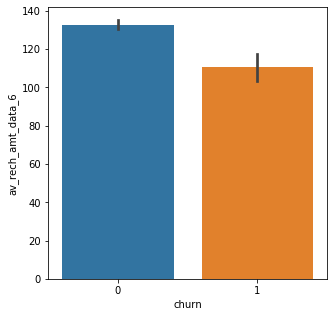

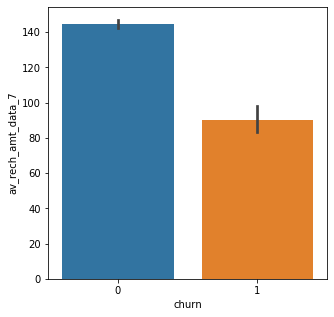

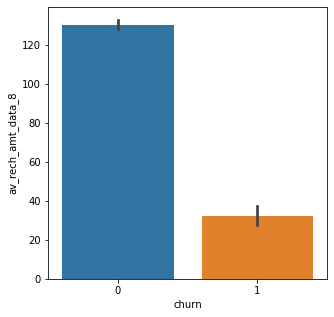

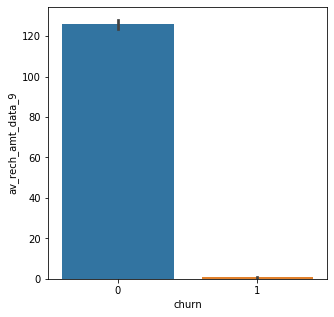

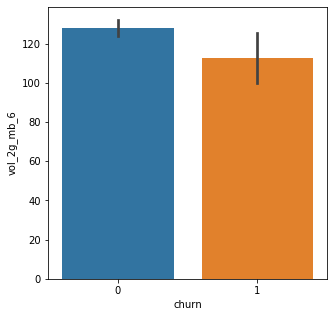

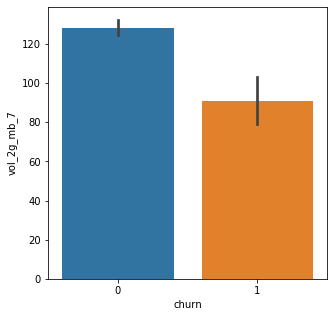

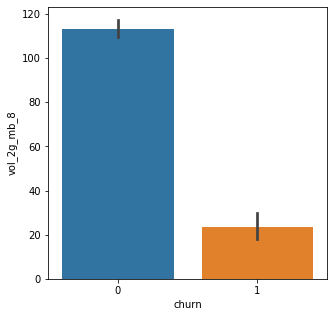

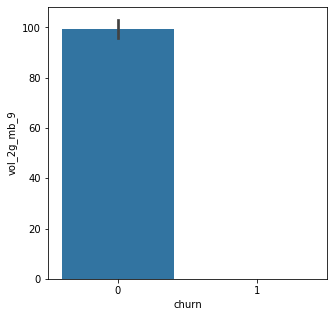

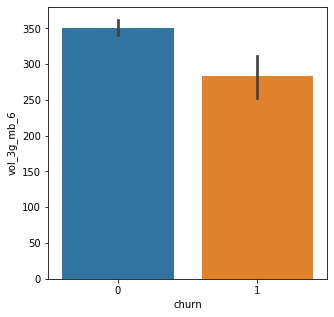

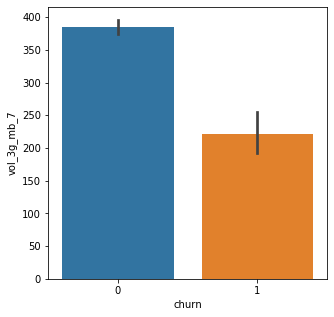

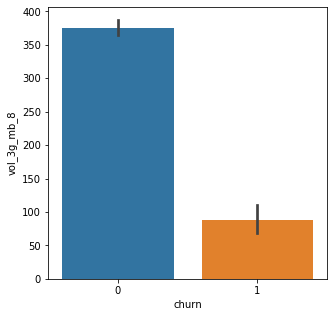

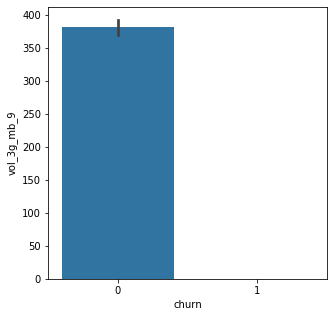

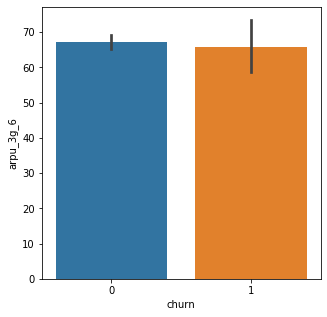

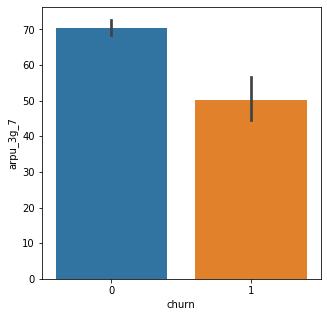

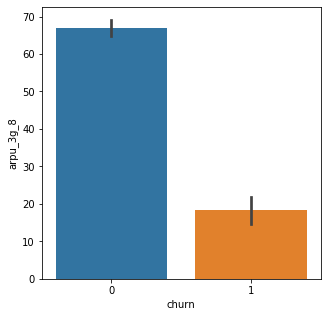

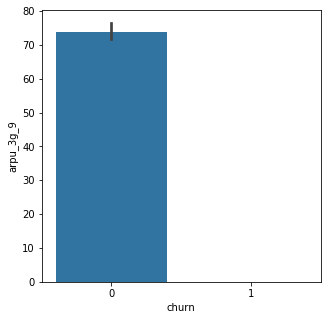

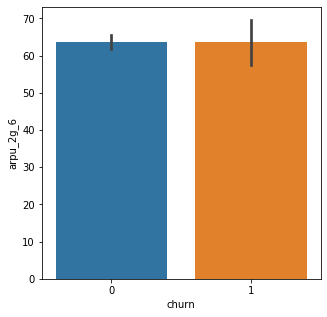

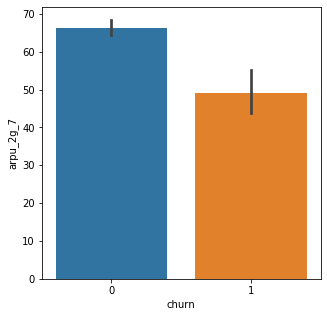

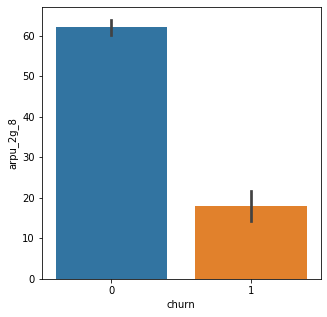

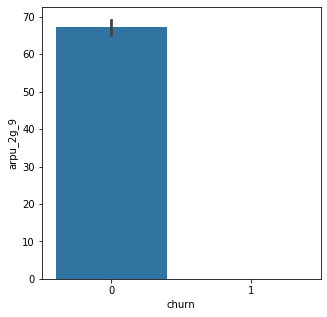

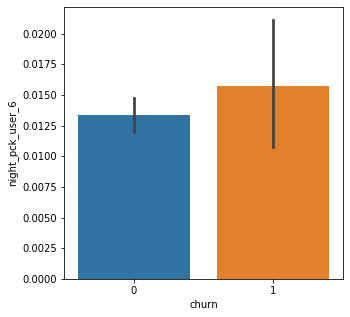

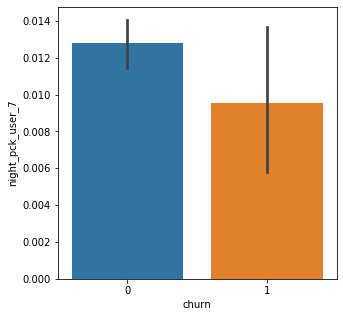

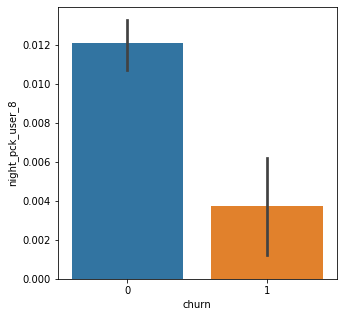

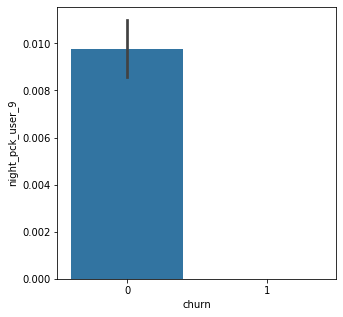

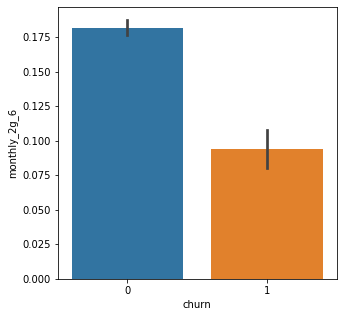

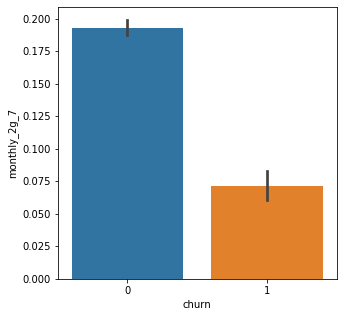

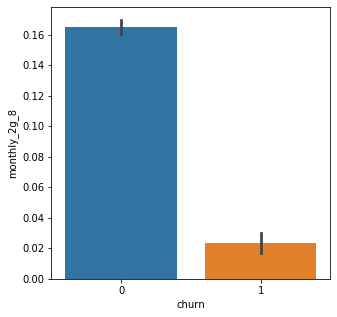

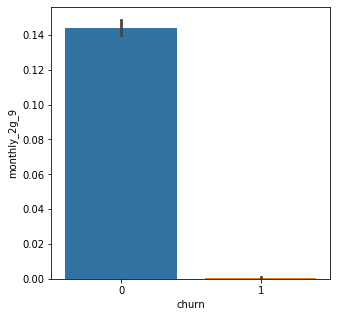

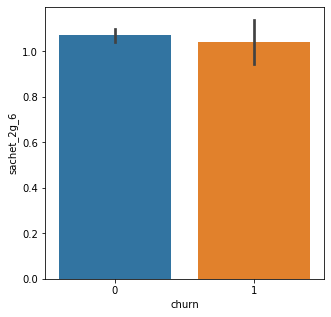

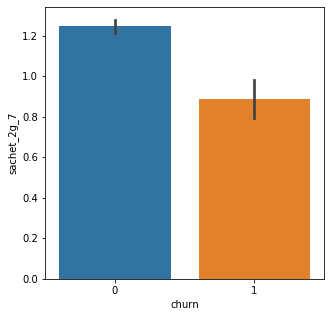

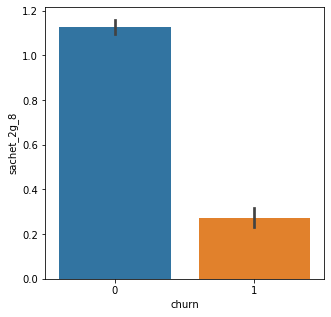

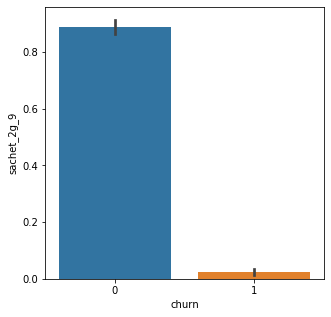

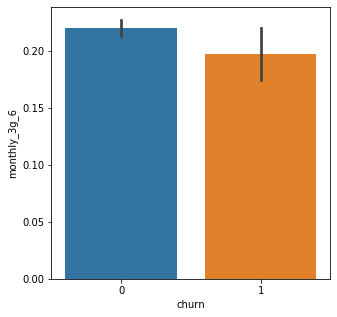

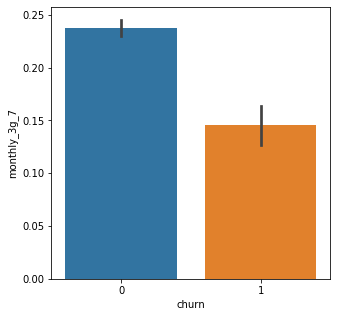

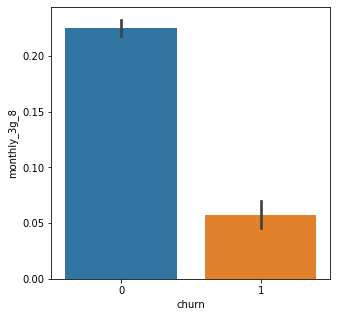

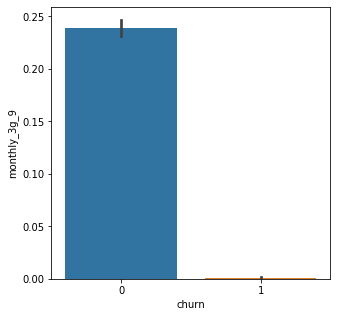

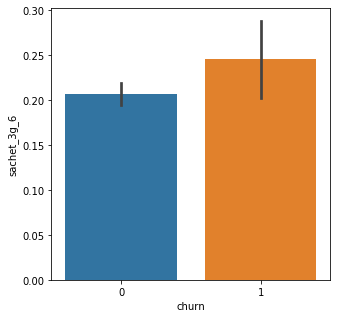

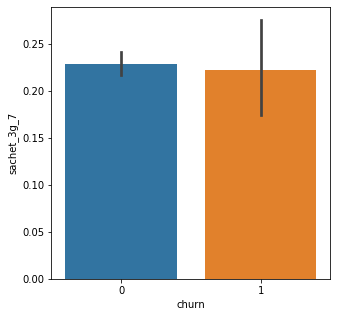

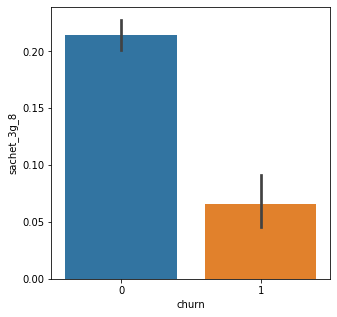

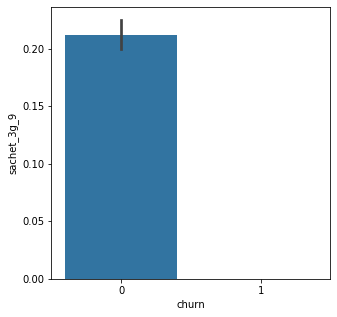

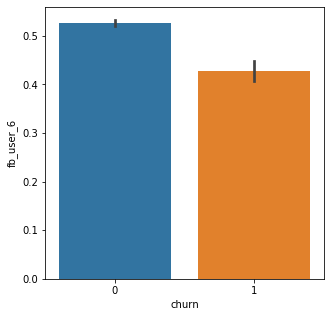

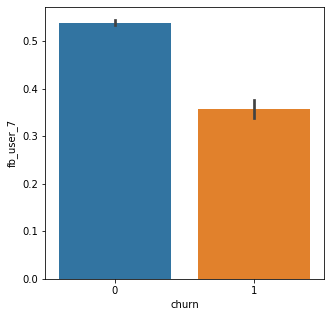

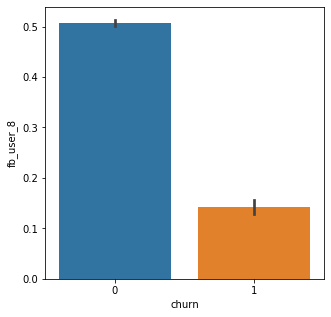

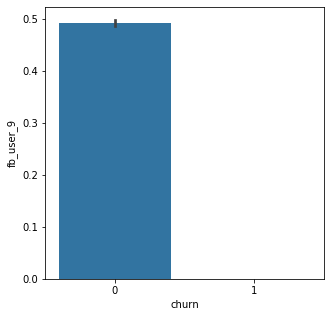

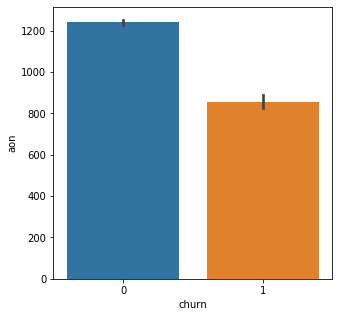

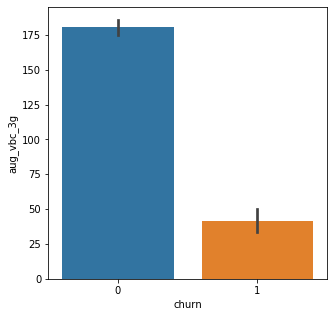

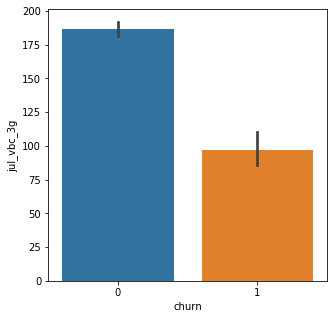

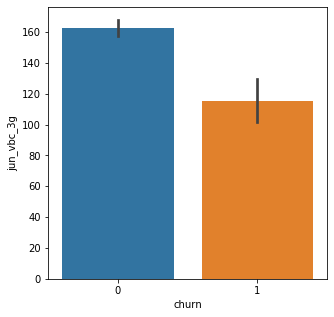

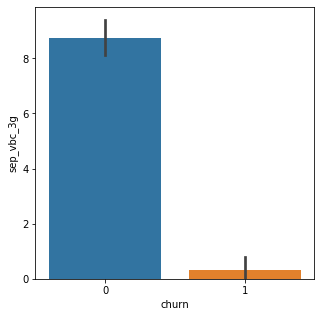

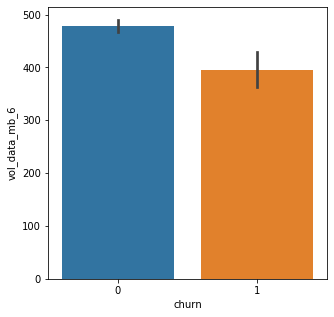

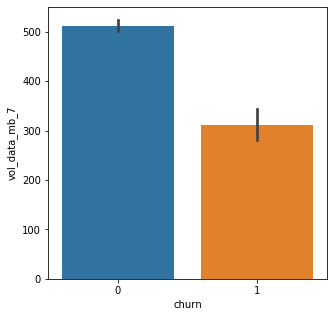

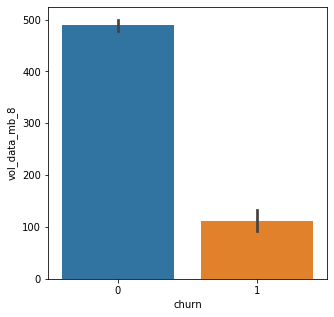

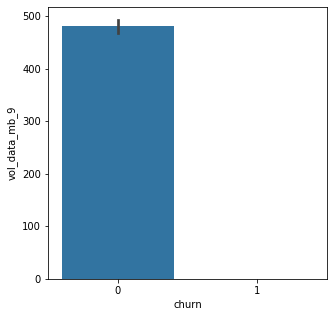

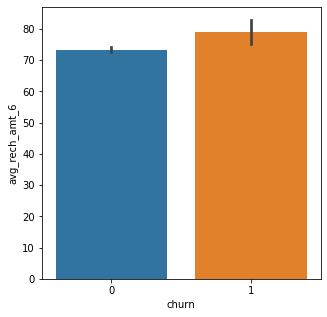

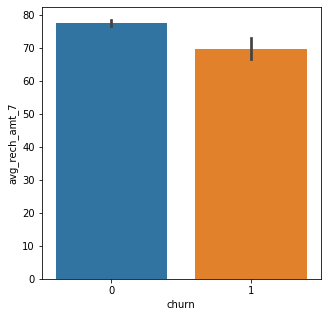

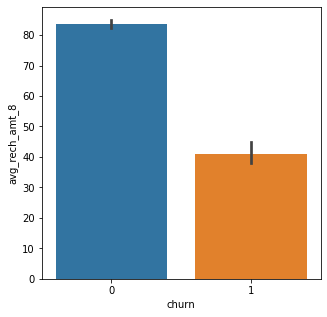

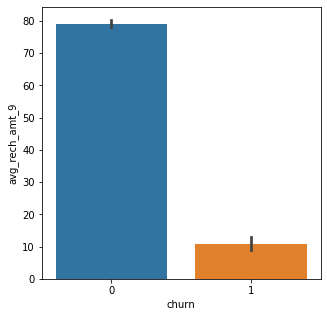

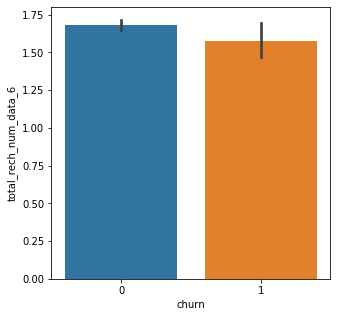

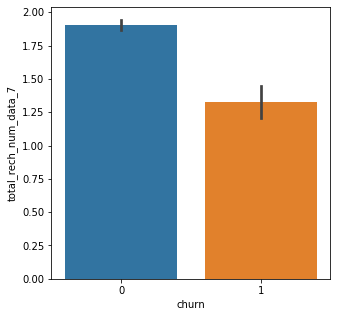

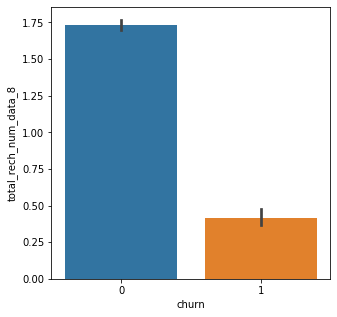

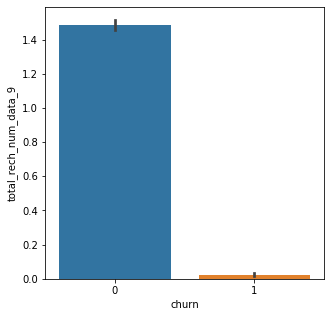

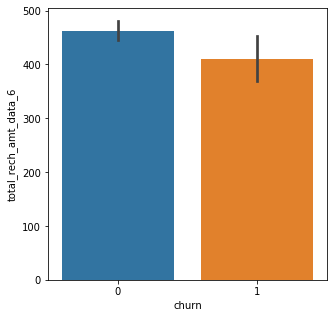

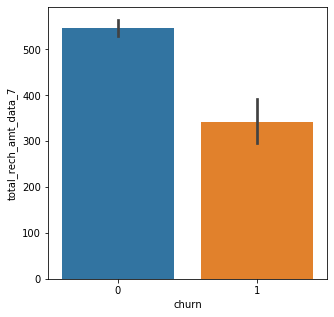

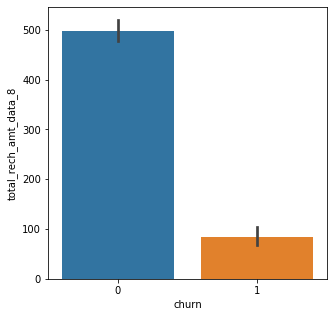

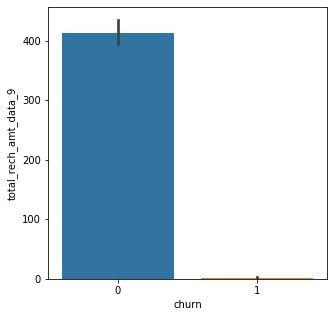

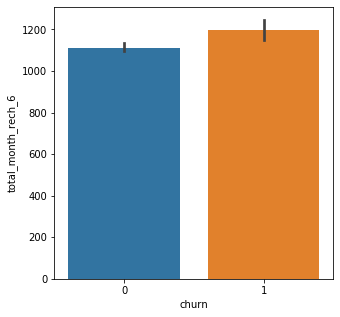

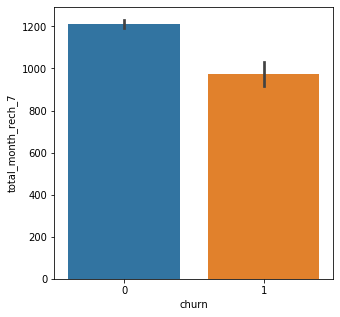

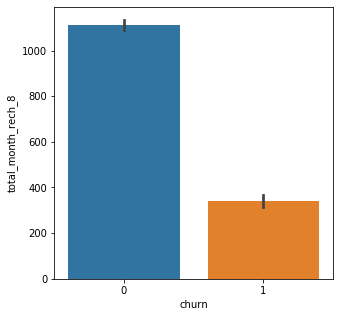

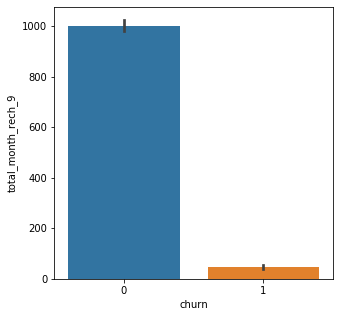

In [83]:
cont_cols = [col for col in df_hv.columns if col not in ['churn','mobile_number','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                                                        'date_of_last_rech_9','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=df_hv)
    plt.show()

[Text(0, 0.5, '(%)')]

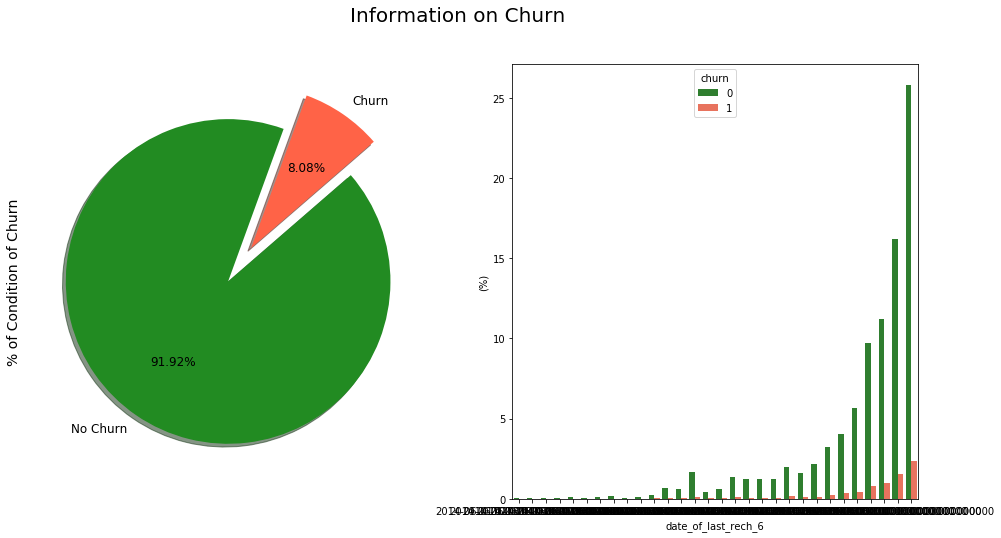

In [84]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#228B22", "#FF6347"]

labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)

df_hv["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)

palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=df_hv, palette=palette, estimator=lambda x: len(x) / len(df_hv) * 100)
ax[1].set(ylabel="(%)")

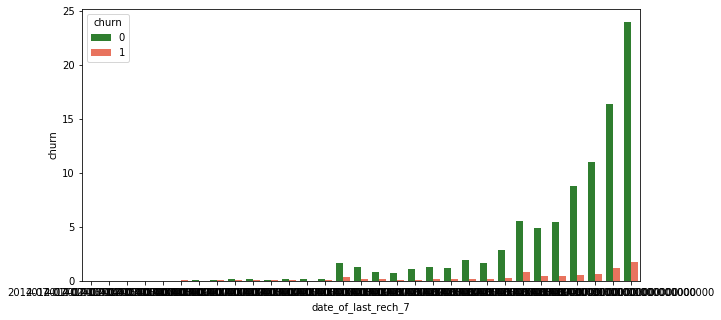

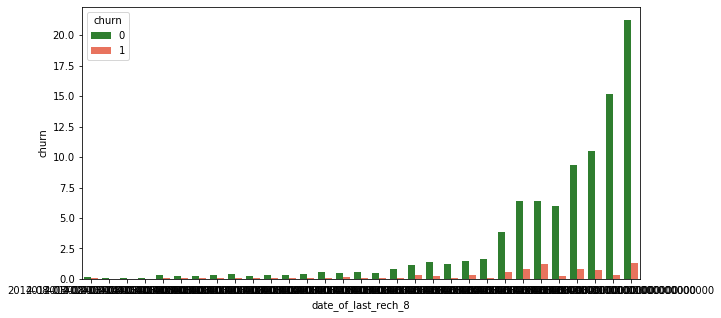

In [85]:
plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=df_hv, palette=palette, 
            estimator=lambda x: len(x) / len(df_hv) * 100)


plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=df_hv, palette=palette, 
            estimator=lambda x: len(x) / len(df_hv) * 100)

In [86]:
###Take a copy of the dataframe before renaming columns below 

df_hv1=df_hv.copy()

In [87]:
###Standardise column names for easy usability 

df_hv=df_hv.rename(columns={'aug_vbc_3g':'vbc_3g_8','jul_vbc_3g':'vbc_3g_7','jun_vbc_3g':'vbc_3g_6','sep_vbc_3g':'vbc_3g_9'})

In [88]:
###Take a copy of the dataframe post updates 

df_hv2=df_hv.copy()

In [89]:
###Splitt columns into various categories like numeric,non numeric and month specific and month non specific 

cols_non_numeric=[i for i in df_hv.columns if df_hv[i].dtype  not in ['float','int64','int32']]
cols_numeric=[i for i in df_hv.columns if df_hv[i].dtype   in ['float','int64','int32']]
cols_numeric_month9=[i for i in cols_numeric if i[-1]=='9' ]
cols_numeric_month8=[i for i in cols_numeric if i[-1]=='8' ]
cols_numeric_month7=[i for i in cols_numeric if i[-1]=='7' ]
cols_numeric_month6=[i for i in cols_numeric if i[-1]=='6' ]
cols_numeric_non_month=[i for i in df_hv.columns if i not in cols_non_numeric and i not in cols_numeric_month9 and 
 i not in cols_numeric_month8 and i not in cols_numeric_month7 and i not in cols_numeric_month6]

In [90]:
###Create new features for the individual month specific columns by aggrgeating month 6,7 and 8 columns 
###Rule - Average of month 6 and month 7 - month 8

for i in [i[:-2] for i in cols_numeric_month6]:
    df_hv[i+'_6_7_8']=round((df_hv[i+'_6']+df_hv[i+'_6'])/2,2)-df_hv[i+'_8']
    

In [91]:
###Drop columns for individual months
###Drop mobile_number as it is unique in the dataset and is not likely to contrbibute value to the model
###Drop circle_id as it has only one unique value meaning low information value and is not likely to 
###contrbibute value to the model

df_hv=df_hv.drop(cols_non_numeric,axis=1)
df_hv=df_hv.drop(cols_numeric_month6,axis=1)
df_hv=df_hv.drop(cols_numeric_month7,axis=1)
df_hv=df_hv.drop(cols_numeric_month8,axis=1)
df_hv=df_hv.drop(cols_numeric_month9,axis=1)
df_hv=df_hv.drop(['mobile_number', 'circle_id'],axis=1)

In [92]:
df_hv3=df_hv.copy()

In [81]:
############################################UNIVARIATE ANALYSIS################################################

In [93]:
cols_final=df_hv.columns

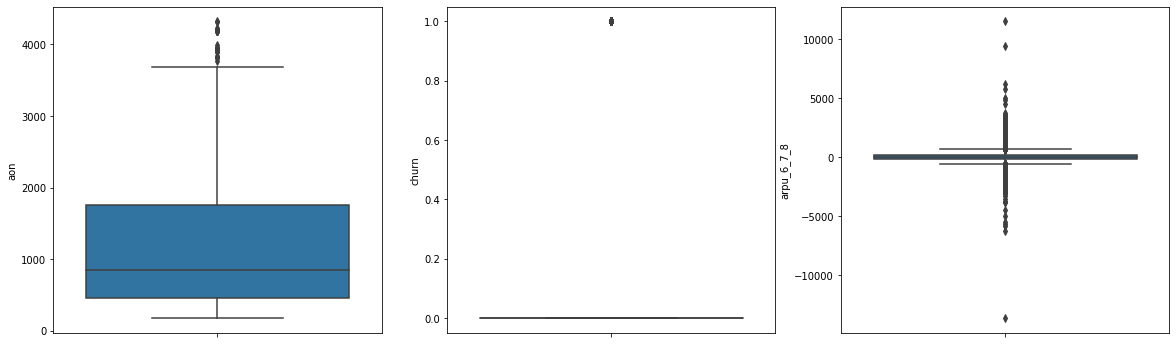

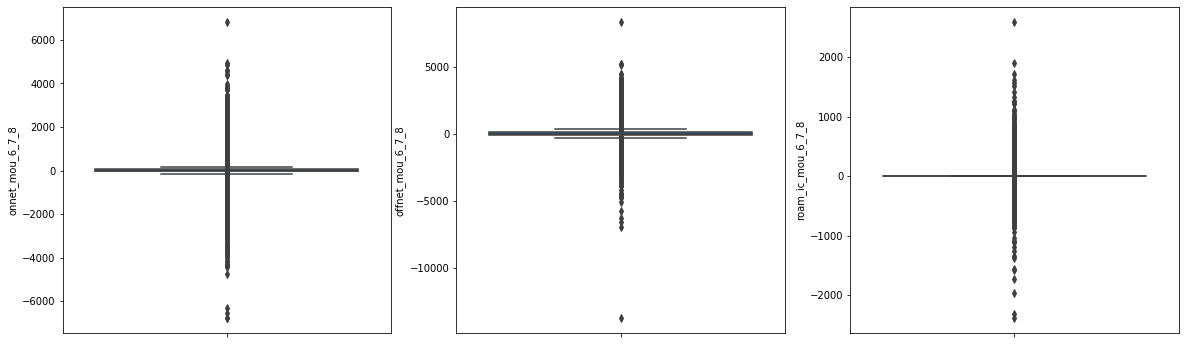

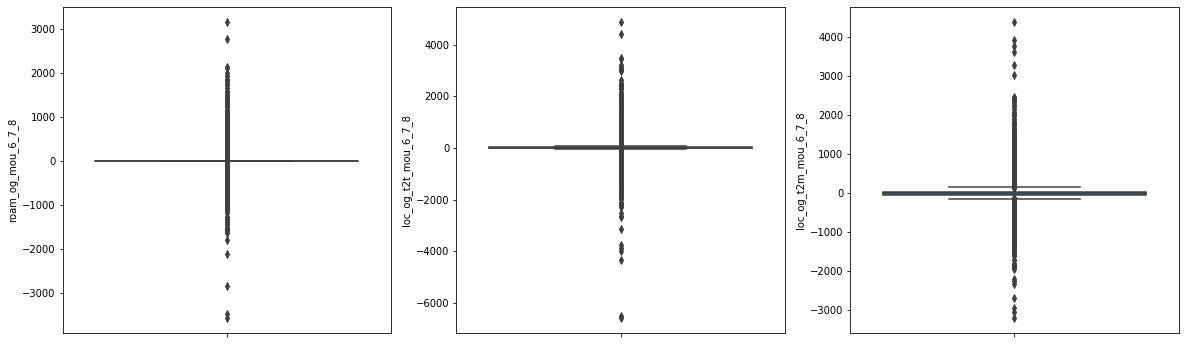

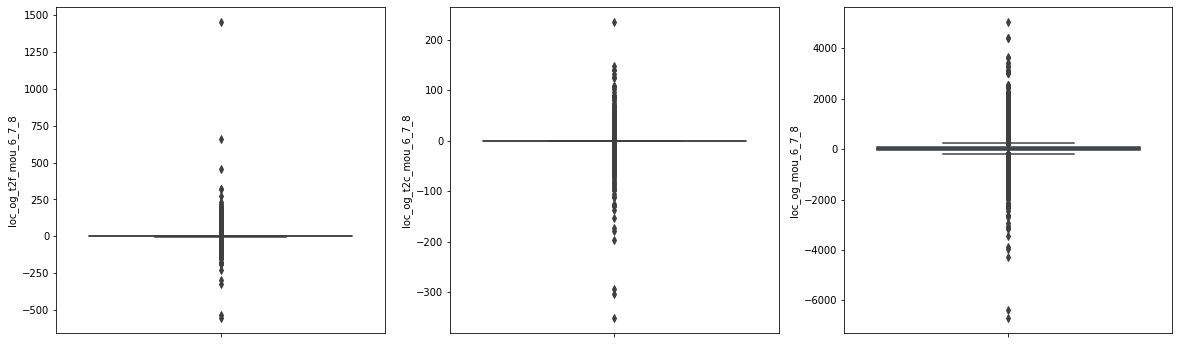

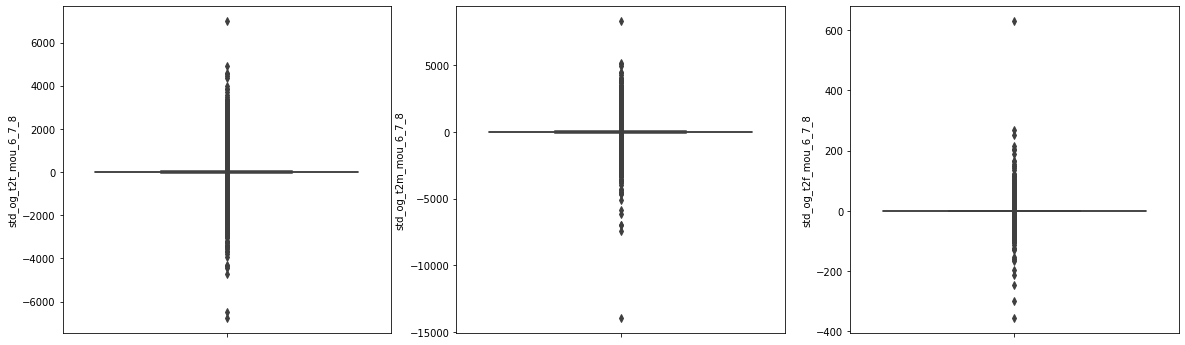

In [94]:
for i in range(0,len(cols_final)-42,3):
    pl,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
    sns.boxplot(y=cols_final[i],data=df_hv,ax=ax[0])
    sns.boxplot(y=cols_final[i+1],data=df_hv,ax=ax[1])
    sns.boxplot(y=cols_final[i+2],data=df_hv,ax=ax[2])

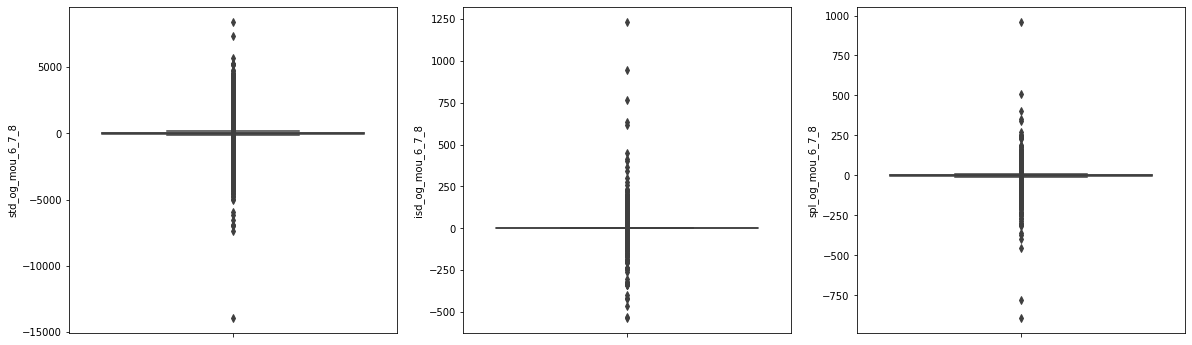

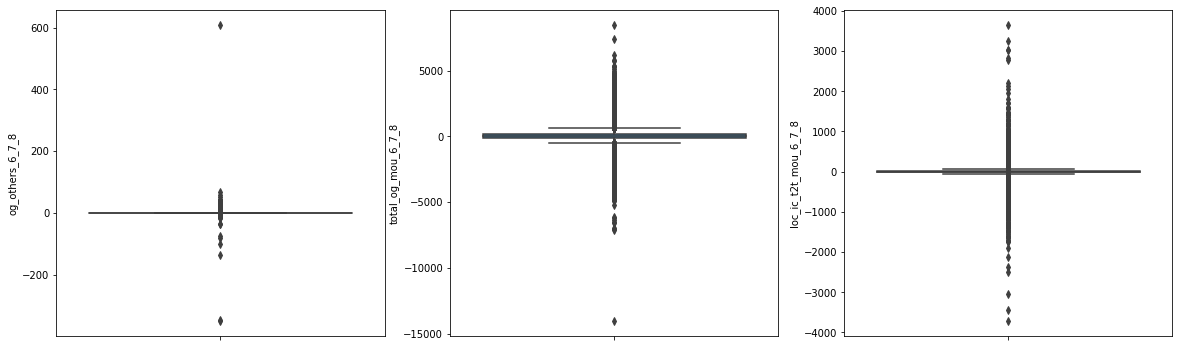

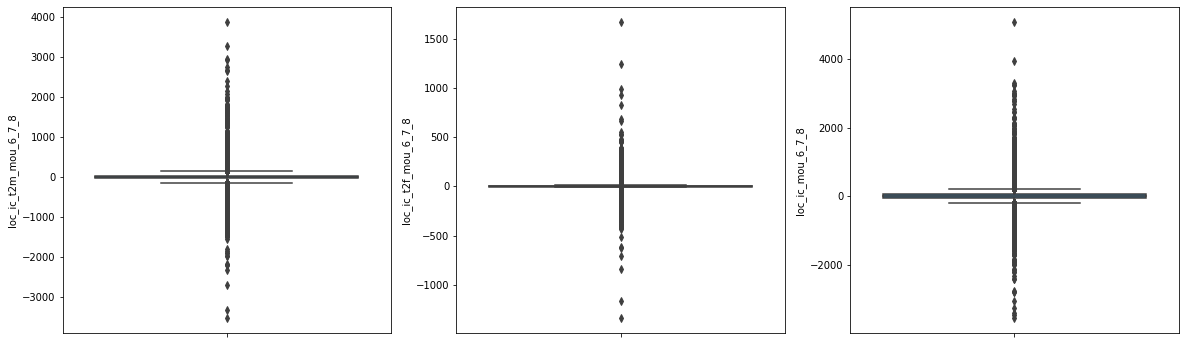

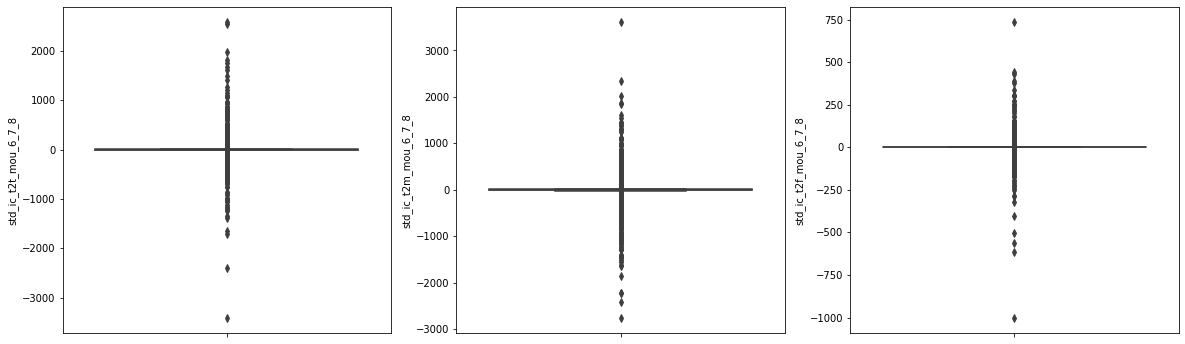

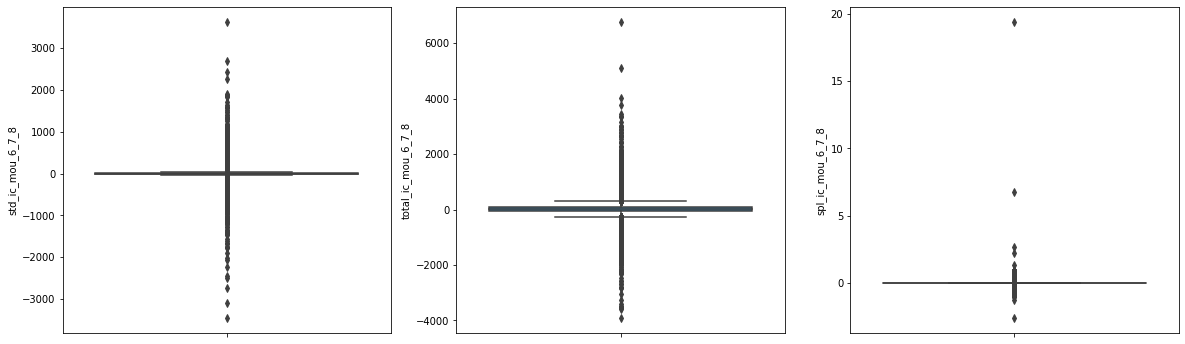

In [95]:
for i in range(15,len(cols_final)-27,3):
    pl,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
    sns.boxplot(y=cols_final[i],data=df_hv,ax=ax[0])
    sns.boxplot(y=cols_final[i+1],data=df_hv,ax=ax[1])
    sns.boxplot(y=cols_final[i+2],data=df_hv,ax=ax[2])

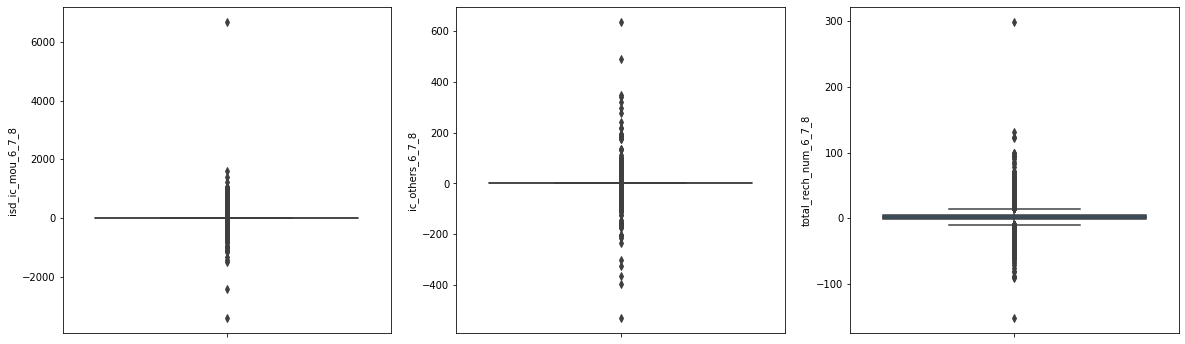

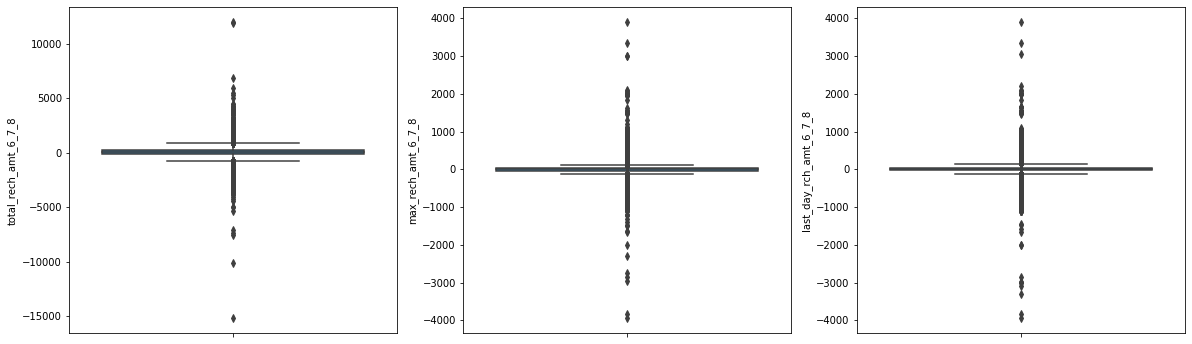

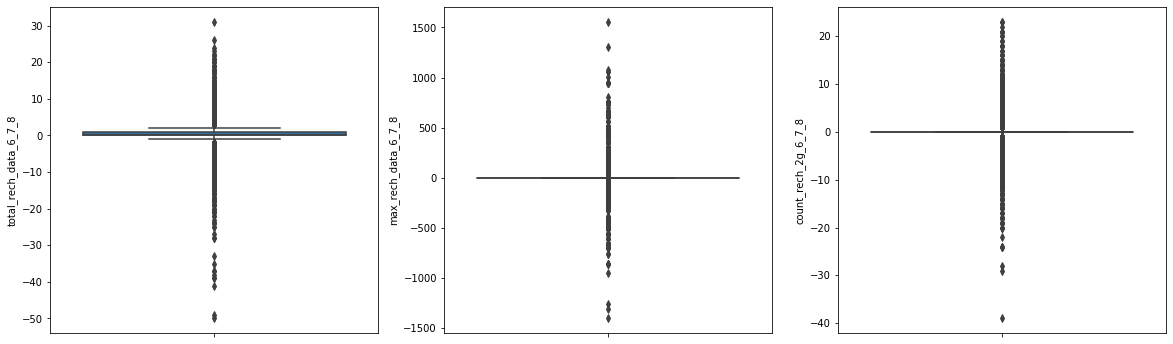

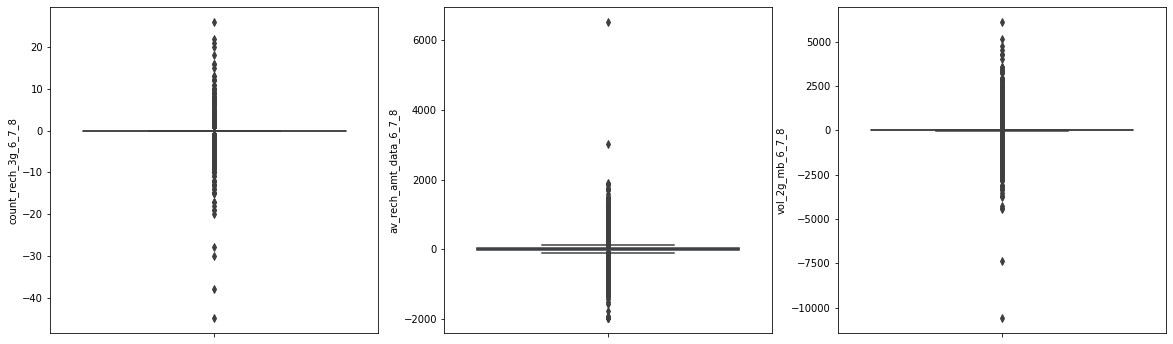

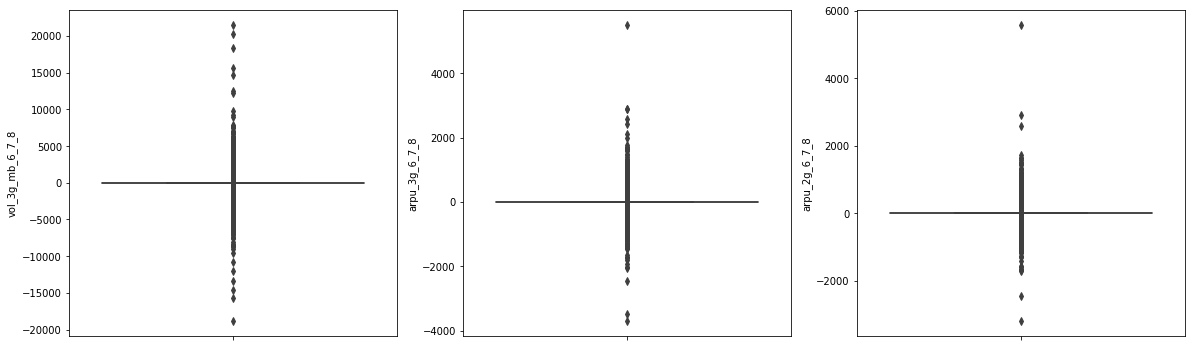

In [96]:
for i in range(30,len(cols_final)-12,3):
    pl,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
    sns.boxplot(y=cols_final[i],data=df_hv,ax=ax[0])
    sns.boxplot(y=cols_final[i+1],data=df_hv,ax=ax[1])
    sns.boxplot(y=cols_final[i+2],data=df_hv,ax=ax[2])

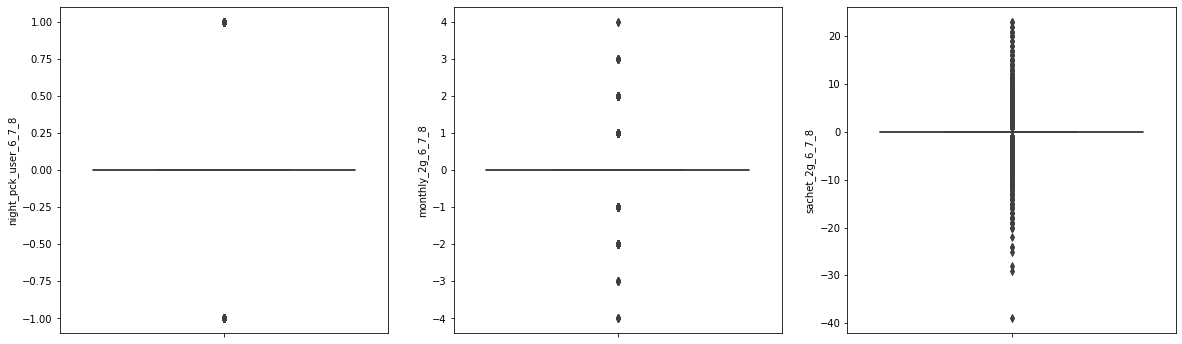

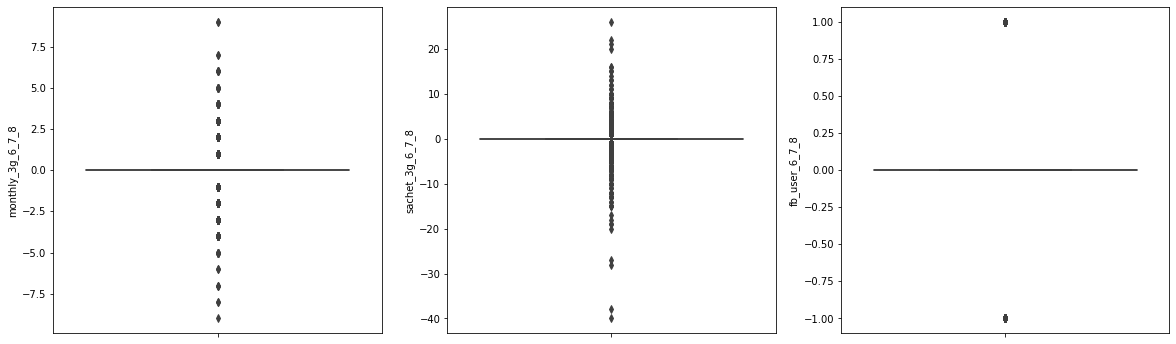

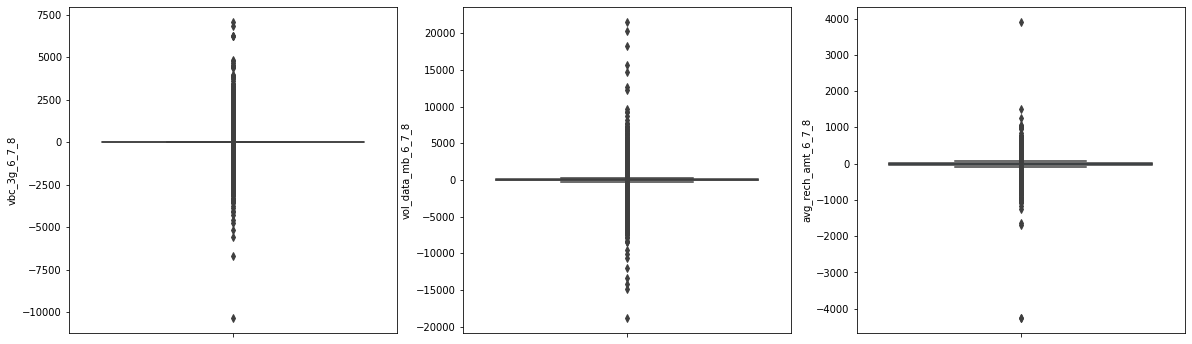

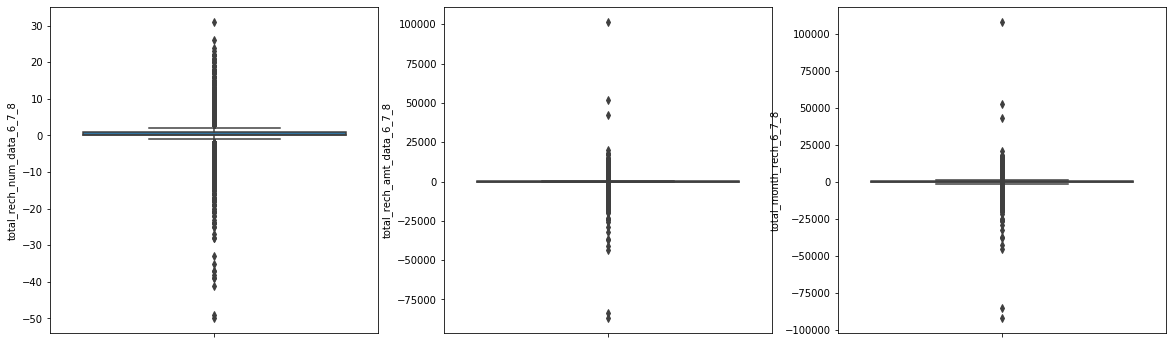

In [97]:
for i in range(45,len(cols_final),3):
    pl,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
    sns.boxplot(y=cols_final[i],data=df_hv,ax=ax[0])
    sns.boxplot(y=cols_final[i+1],data=df_hv,ax=ax[1])
    sns.boxplot(y=cols_final[i+2],data=df_hv,ax=ax[2])

In [86]:
######################################END OF UNIVARIATE ANALYSIS##################################################

In [87]:
############################################BIVARIATE ANALYSIS#################################################

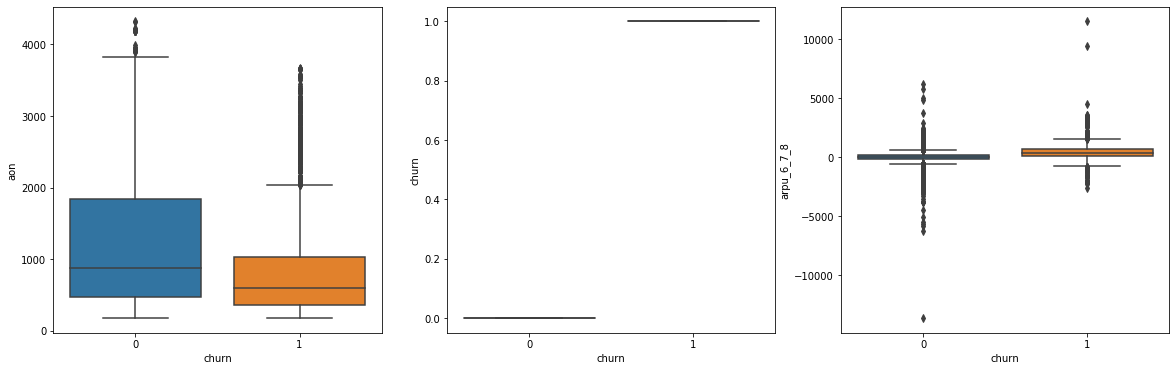

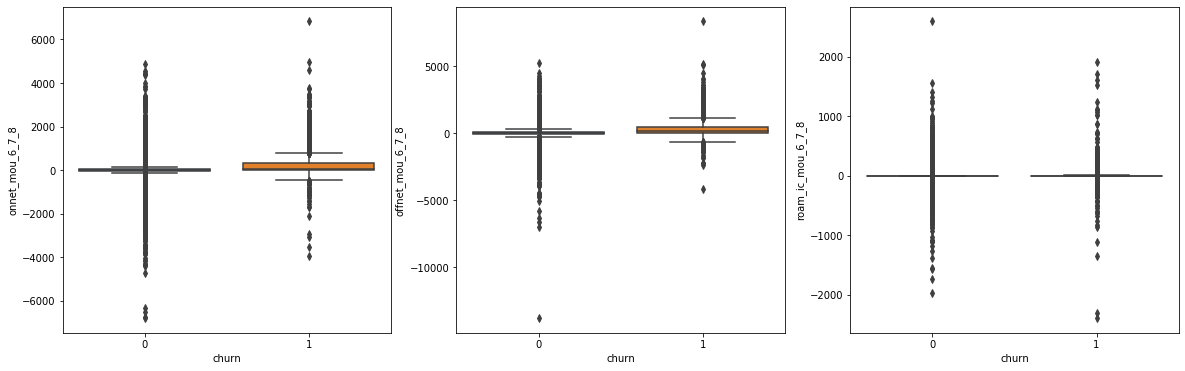

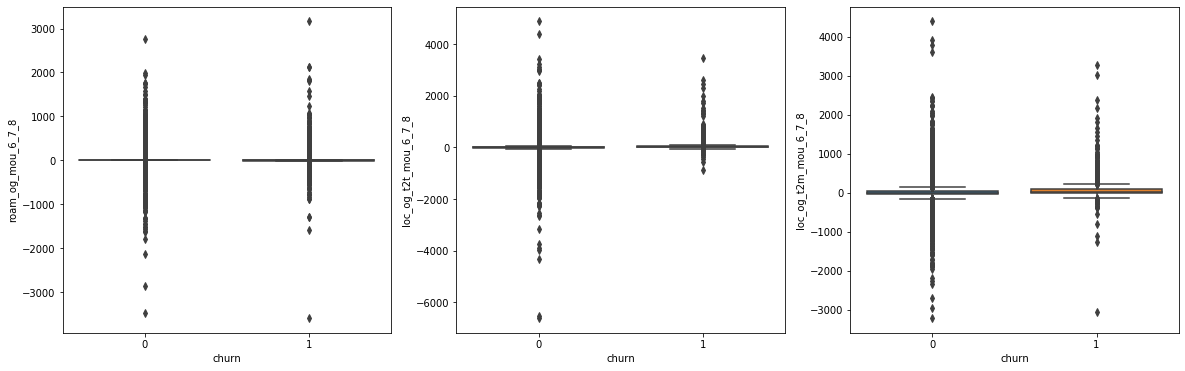

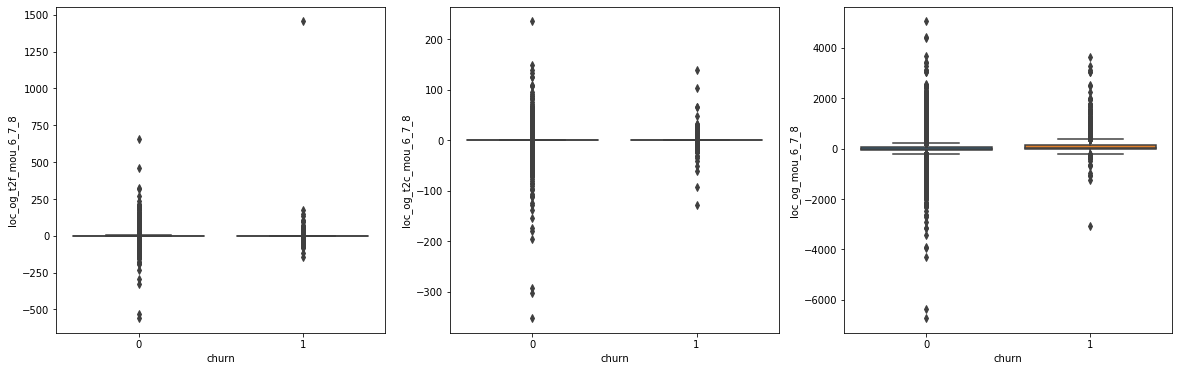

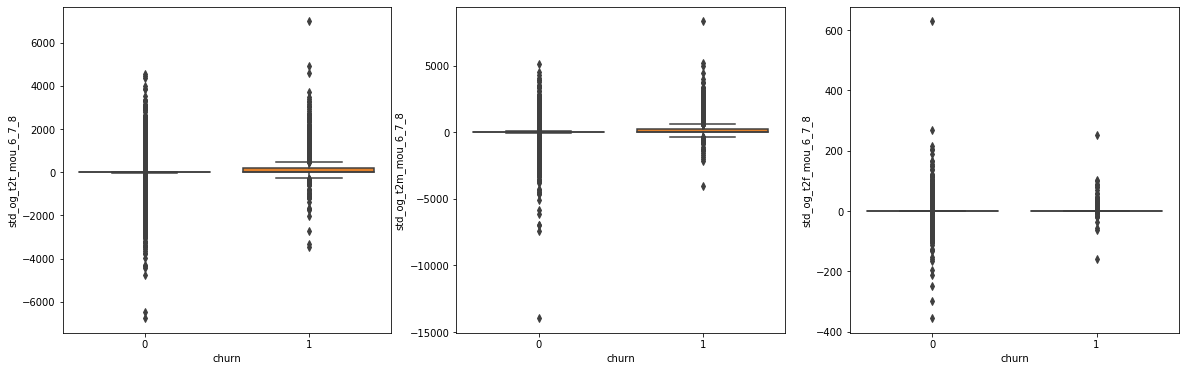

In [98]:
for i in range(0,len(cols_final)-42,3):
    pl,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
    sns.boxplot(y=cols_final[i],data=df_hv,ax=ax[0],x='churn')
    sns.boxplot(y=cols_final[i+1],data=df_hv,ax=ax[1],x='churn')
    sns.boxplot(y=cols_final[i+2],data=df_hv,ax=ax[2],x='churn')

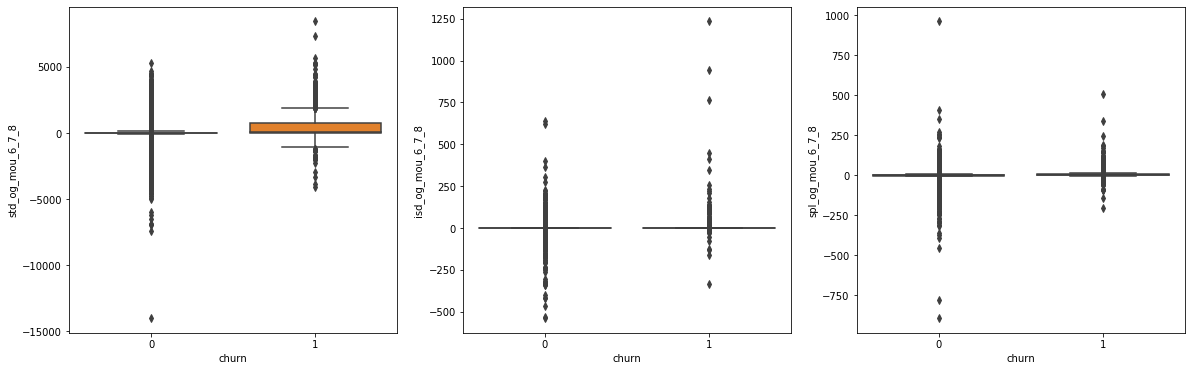

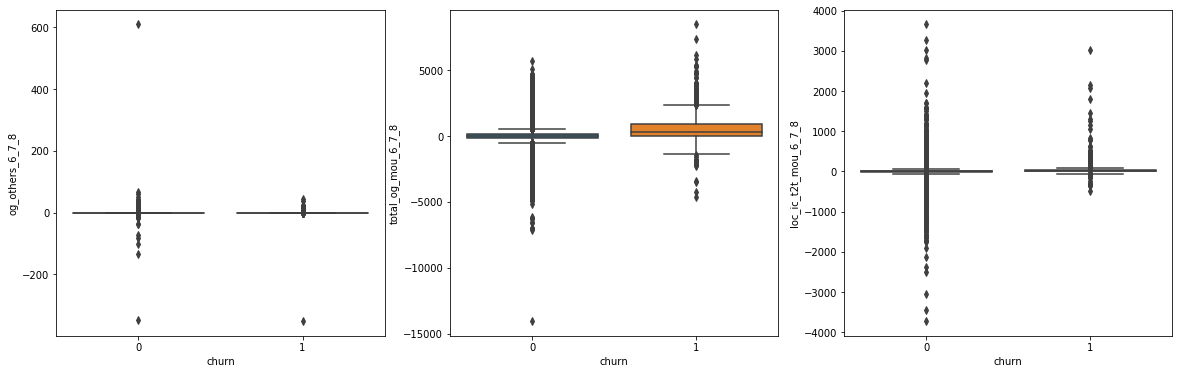

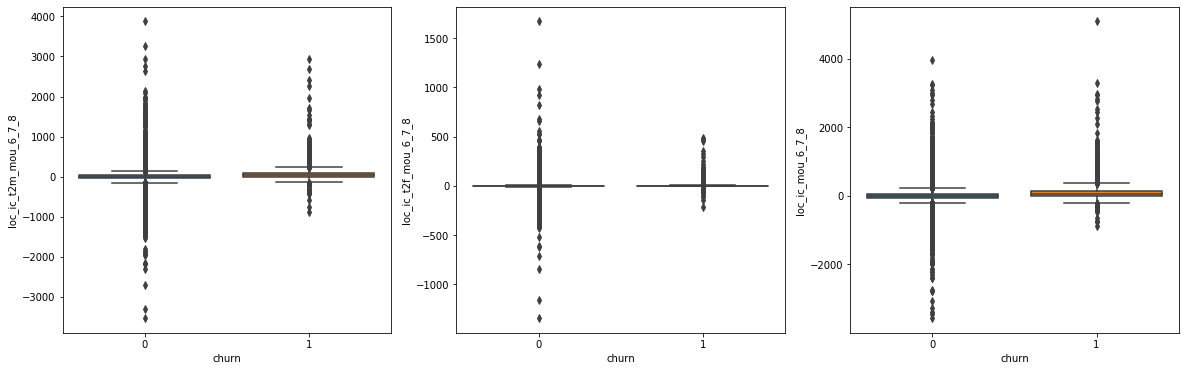

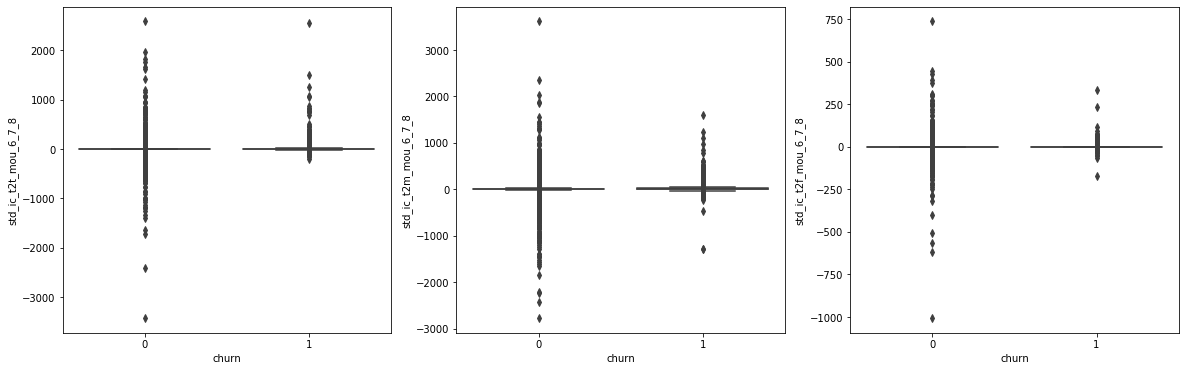

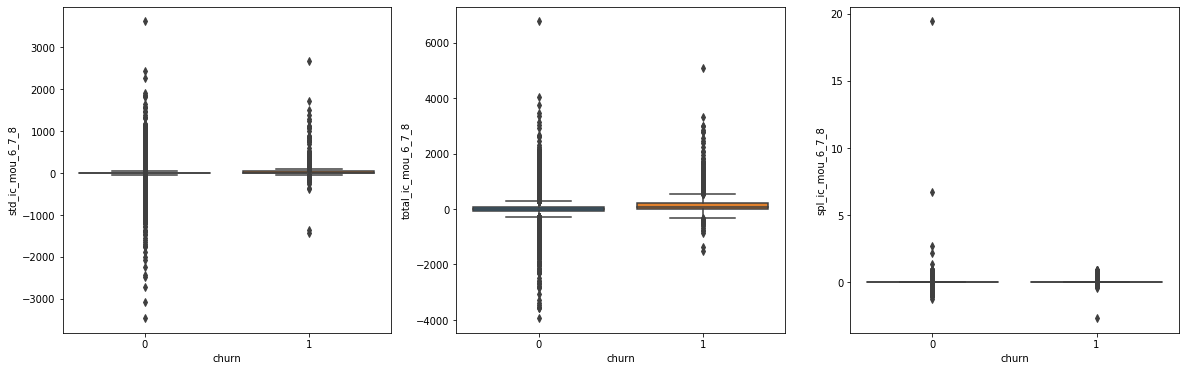

In [99]:
for i in range(15,len(cols_final)-27,3):
    pl,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
    sns.boxplot(y=cols_final[i],data=df_hv,ax=ax[0],x='churn')
    sns.boxplot(y=cols_final[i+1],data=df_hv,ax=ax[1],x='churn')
    sns.boxplot(y=cols_final[i+2],data=df_hv,ax=ax[2],x='churn')

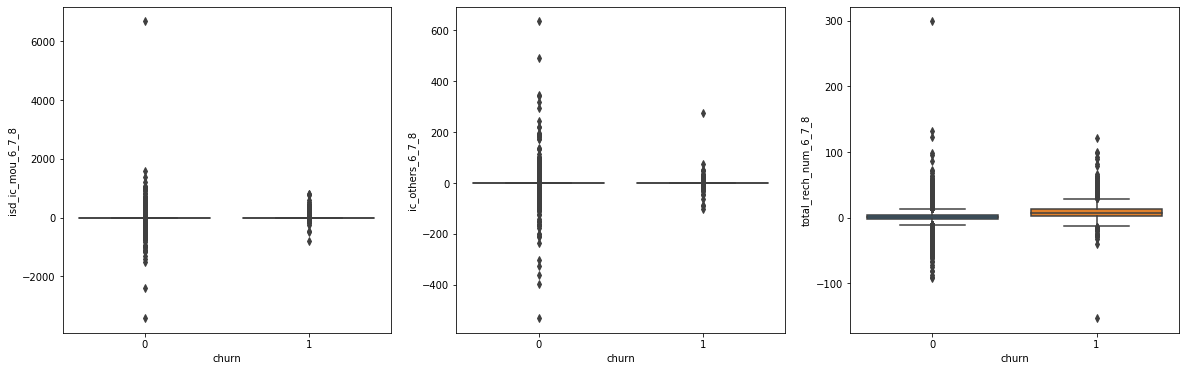

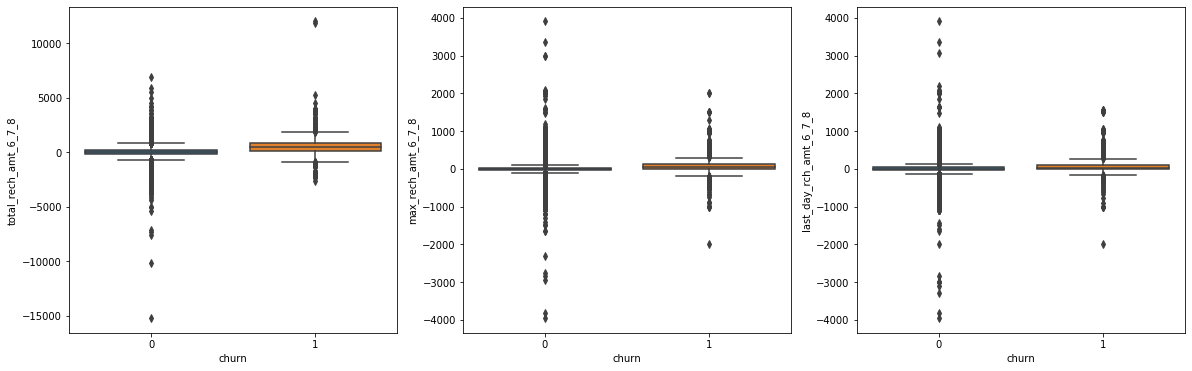

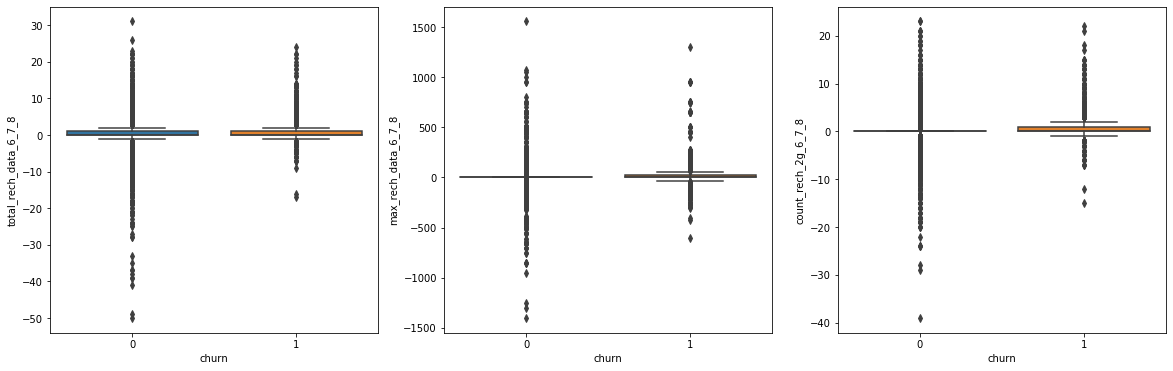

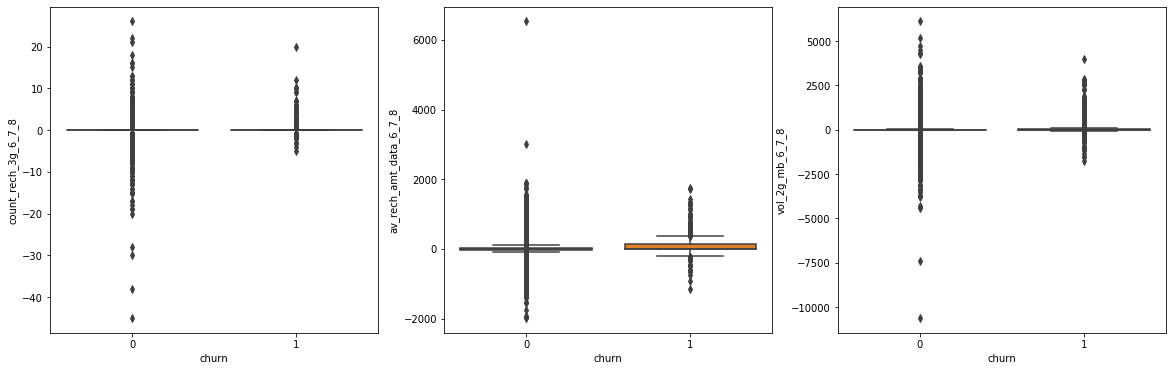

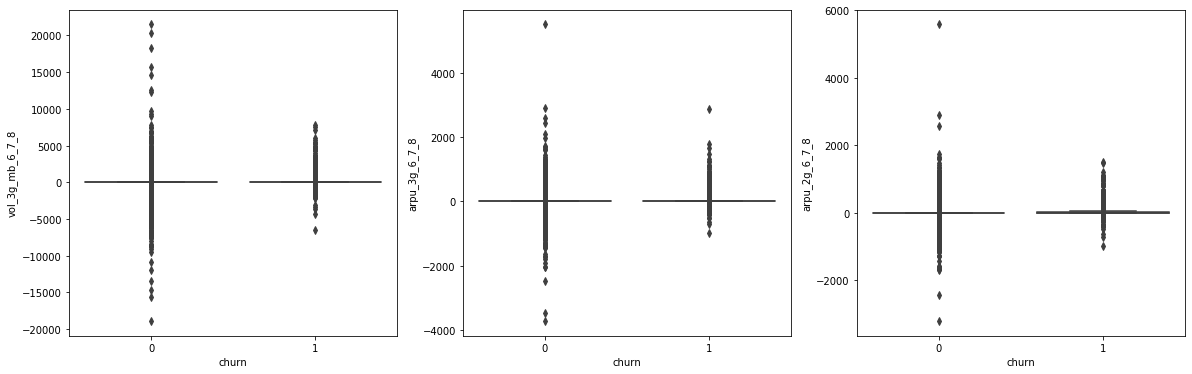

In [100]:
for i in range(30,len(cols_final)-12,3):
    pl,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
    sns.boxplot(y=cols_final[i],data=df_hv,ax=ax[0],x='churn')
    sns.boxplot(y=cols_final[i+1],data=df_hv,ax=ax[1],x='churn')
    sns.boxplot(y=cols_final[i+2],data=df_hv,ax=ax[2],x='churn')

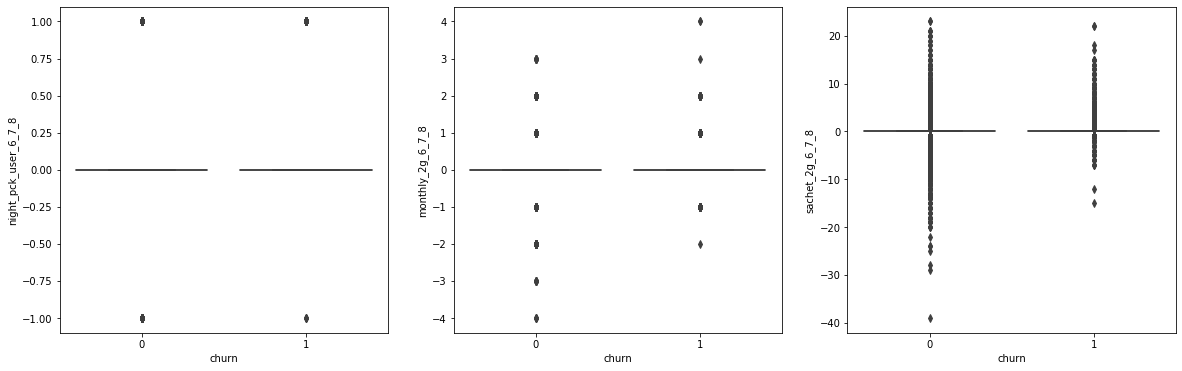

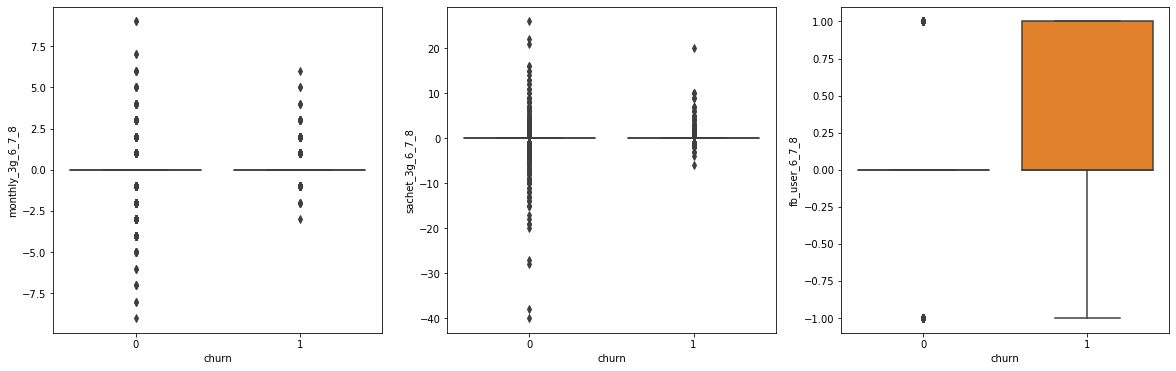

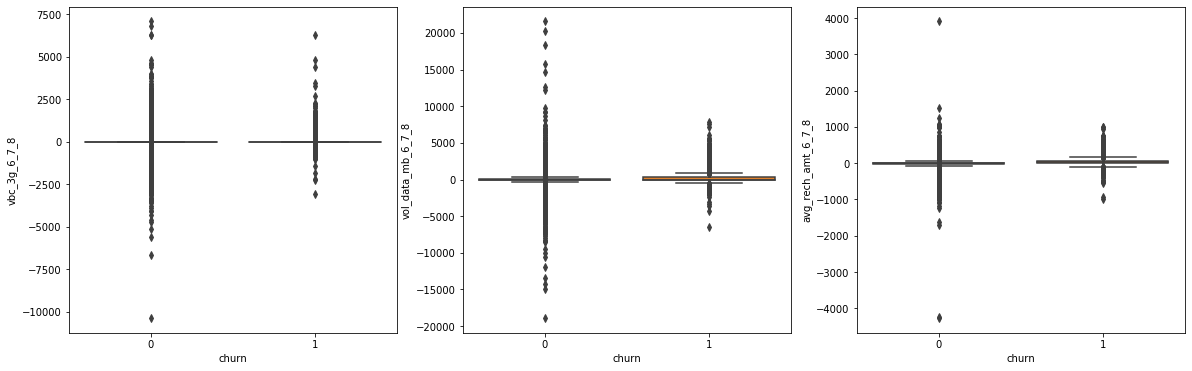

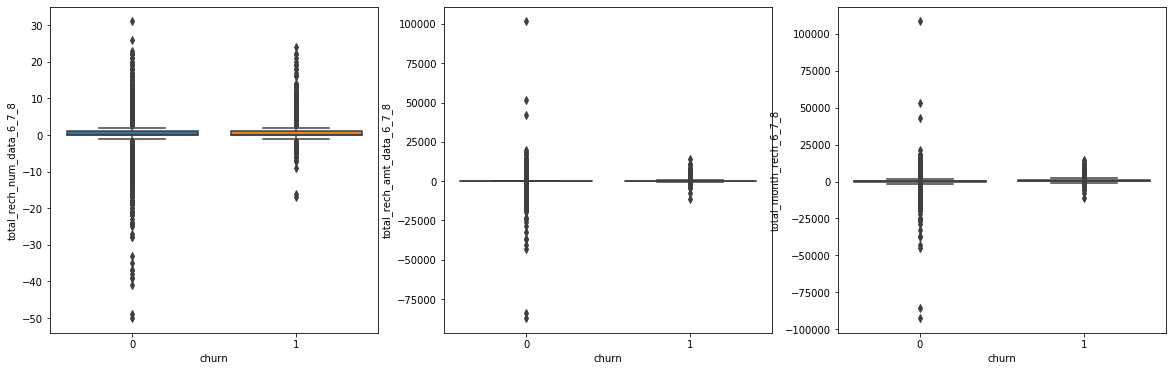

In [101]:
for i in range(45,len(cols_final),3):
    pl,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,6))
    sns.boxplot(y=cols_final[i],data=df_hv,ax=ax[0],x='churn')
    sns.boxplot(y=cols_final[i+1],data=df_hv,ax=ax[1],x='churn')
    sns.boxplot(y=cols_final[i+2],data=df_hv,ax=ax[2],x='churn')

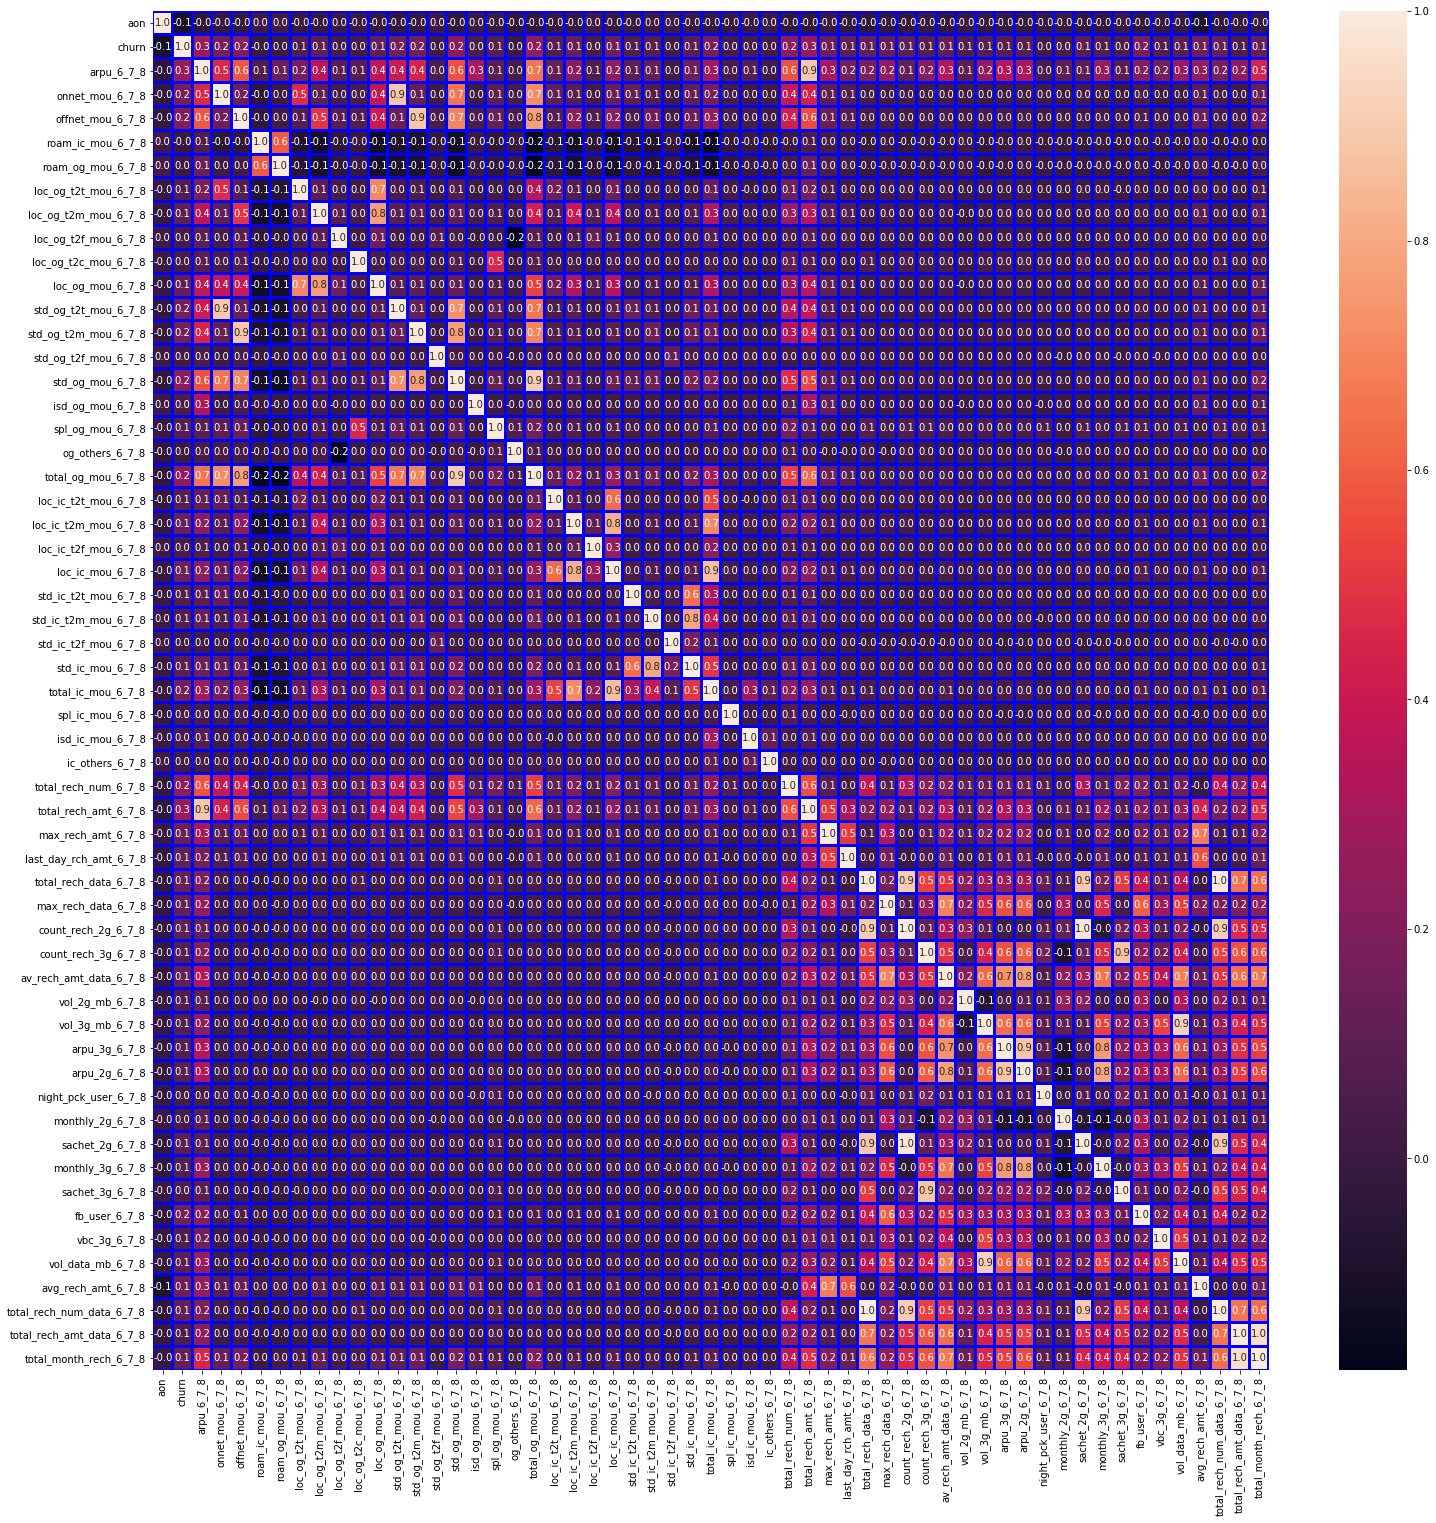

In [102]:
###Plot corelation among the variables of good month 

pl,ax=plt.subplots(nrows=1,ncols=1,figsize=(25,25))
sns.heatmap(df_hv.corr(),annot=True,linewidths=2,linecolor='b',fmt = ".1f")

In [93]:
###########################################End of Bivariate Analysis####################################################

In [94]:
###As shown above there is multicolinerity between the predictor variables and need to be handled 

In [103]:
df_hv.churn.value_counts(normalize=True)

0    0.92
1    0.08
Name: churn, dtype: float64

In [96]:
###Clearly there is some class imbalance which will need to be addressed 

In [97]:
#########################################PRINCIPAL COMPONENT ANALYSIS######################################################

In [104]:
df_high_val_pca=df_hv.copy()

In [105]:
###Remove the target variable from the dataset

y=df_high_val_pca.pop('churn')
X=df_high_val_pca.copy()

In [106]:
###create train and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [107]:
###Scale X train dataset 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [108]:
X_train

array([[-0.76484516, -0.14298008, -0.13026059, ..., -0.01371431,
         0.0053774 , -0.1655124 ],
       [ 1.38943891, -0.26931807, -0.22191448, ..., -0.01371431,
         0.0053774 ,  0.31556628],
       [ 0.83153993, -0.356727  , -0.83223642, ..., -0.01371431,
         0.0053774 , -0.24418881],
       ...,
       [ 2.55538509,  0.45609003,  0.05600375, ..., -0.01371431,
         0.0053774 ,  0.13616402],
       [-0.55275997, -0.01293214, -0.06601094, ...,  0.35500323,
         0.01311616, -0.00515284],
       [ 1.68614923,  0.01560207,  0.17145933, ..., -0.01371431,
         0.0053774 , -0.02018655]])

In [109]:
###Scale X test based on parameters from the training set 

X_test=scaler.transform(X_test)

In [110]:
###Instantiate the PCA model and fir using X train

pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [111]:
pca.explained_variance_ratio_

array([1.61837710e-01, 1.05673519e-01, 6.55078556e-02, 5.10838461e-02,
       4.05619326e-02, 3.79430239e-02, 3.38860215e-02, 3.13881208e-02,
       2.85451512e-02, 2.74334274e-02, 2.58735048e-02, 2.26934696e-02,
       2.22115190e-02, 2.15482359e-02, 2.00360613e-02, 1.94212524e-02,
       1.87844509e-02, 1.81434785e-02, 1.79993566e-02, 1.77559932e-02,
       1.74096384e-02, 1.69560007e-02, 1.68327887e-02, 1.64519550e-02,
       1.53944052e-02, 1.50633280e-02, 1.37765901e-02, 1.35678372e-02,
       1.23851394e-02, 9.50006892e-03, 9.14974160e-03, 8.96251122e-03,
       8.46596835e-03, 7.39519573e-03, 6.53194540e-03, 5.88199159e-03,
       5.04526789e-03, 4.44378691e-03, 2.90383260e-03, 2.33008513e-03,
       1.70697025e-03, 1.35317998e-03, 1.60099599e-04, 3.74034157e-06,
       1.08175667e-09, 2.44222280e-11, 1.43046855e-11, 7.05252272e-12,
       6.79459612e-12, 2.13882503e-12, 9.13608516e-13, 3.19168607e-32,
       1.20169428e-33, 1.06683594e-33, 1.06683594e-33, 1.06683594e-33])

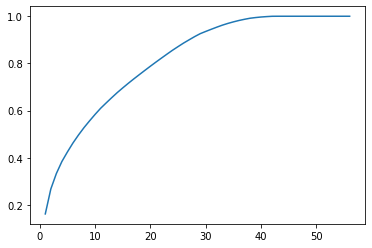

In [112]:
###Plot explained variance , so as to chose the appropriate number of variables 

var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [107]:
### As seen from above we need approximately 40 variables to explain almost all the variance 
###We will build an incremental pca model with 40 as the number of variables 

In [113]:
###Instantiate an incremental model with number of variables 60 and create a new dataset with it 

pca_final = IncrementalPCA(n_components=40)
df_train_pca = pca_final.fit_transform(X_train)

In [114]:
###Check the shape of df_train_pca

df_train_pca.shape

(20917, 40)

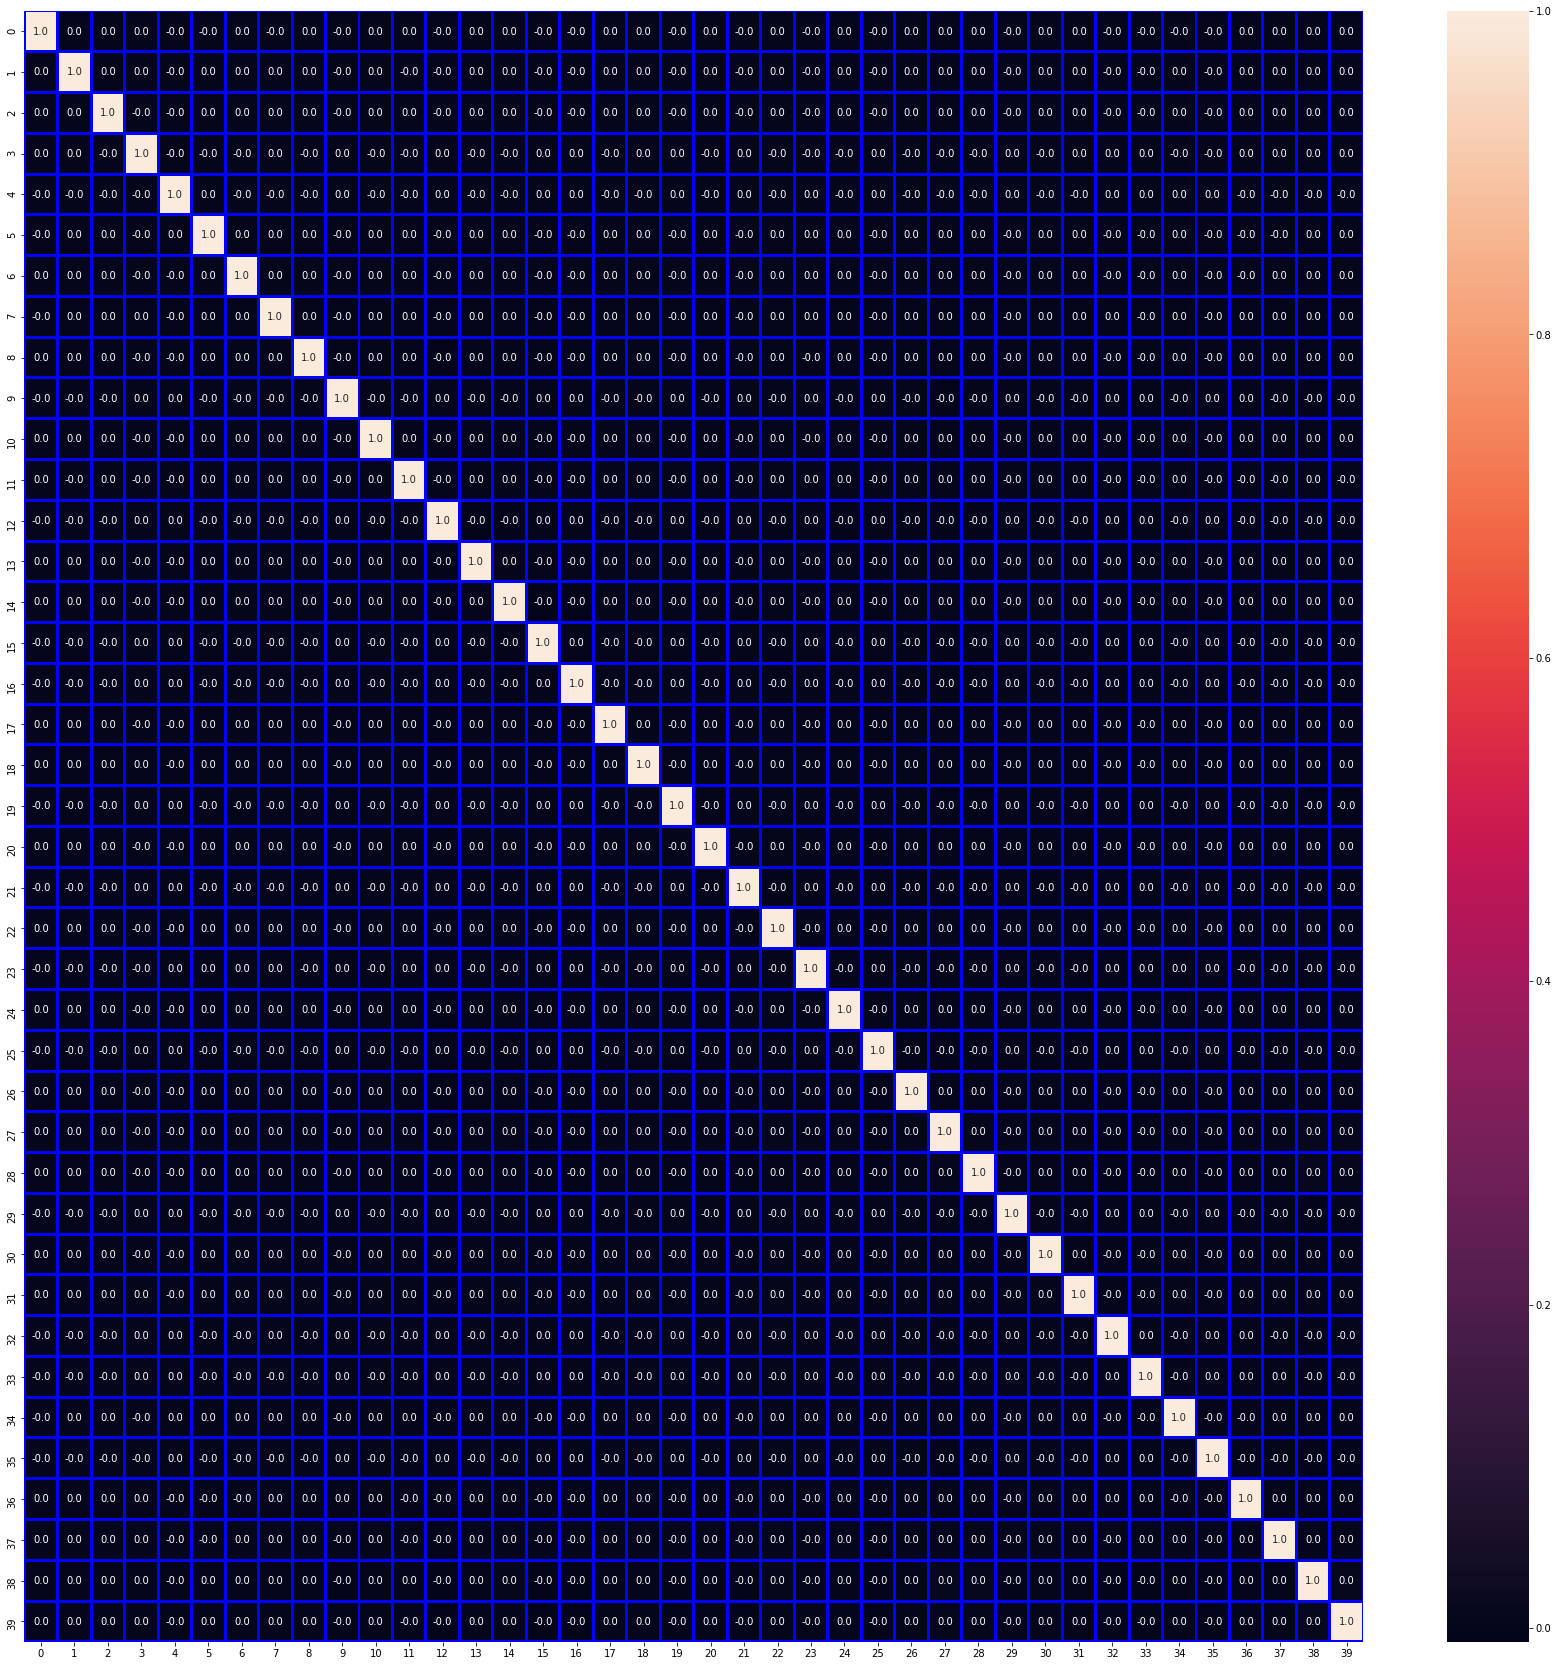

In [115]:
###Plot correlation amongst the 60 variables to ensure there is no multicolinearity 

corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True,linewidths=2,linecolor='b',fmt = ".1f")

In [111]:
###As seen from above there is no correlation amongst the variables now 

In [116]:
###Fit the final pca model on the test data 

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8965, 40)

#########################################MODEL FOR PREDICTION####################################################

In [113]:
####################################### LOGISTIC REGRESSION MODEL #########################################

In [117]:
###Instantiate a Logistic regression model and fit on the training data 
###The training data is the transformed data created from pca
###Since there is no corelation amongst the variables we don't need to consider multicolinearity now 

log_reg = LogisticRegression()
model_log_reg = log_reg.fit(df_train_pca, y_train)

In [118]:
###Predict Probability of the train set

y_train_prob_pred = log_reg.predict_proba(df_train_pca)[:,1]

In [119]:
###create dataframe to hold the churn actual value and the probability predicted by the model

y_train_pred_final = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_prob_pred})

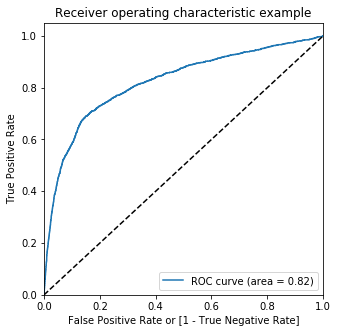

In [120]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [121]:
####Add columns to the above dataframe to suggest predicted churn value in 0 and 1 for various threshhold values 
####from through to 0.9

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
29877      0        0.05    1    0    0    0    0    0    0    0    0    0
10242      0        0.02    1    0    0    0    0    0    0    0    0    0
9513       0        0.02    1    0    0    0    0    0    0    0    0    0
27493      0        0.03    1    0    0    0    0    0    0    0    0    0
29205      0        0.02    1    0    0    0    0    0    0    0    0    0

In [122]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensi  speci
0.0   0.0      0.08   1.00   0.00
0.1   0.1      0.83   0.70   0.84
0.2   0.2      0.90   0.49   0.94
0.3   0.3      0.92   0.33   0.97
0.4   0.4      0.92   0.21   0.98
0.5   0.5      0.92   0.14   0.99
0.6   0.6      0.92   0.09   0.99
0.7   0.7      0.92   0.06   1.00
0.8   0.8      0.92   0.03   1.00
0.9   0.9      0.92   0.01   1.00


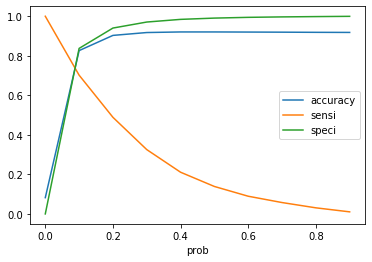

In [123]:
###Let's plot accuracy sensitivity and specificity for various probabilities so as to establish the optimal value of 
###threshhold

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [124]:
###Predict based on threshhold of 0.1

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.iloc[:,3] )
print(confusion)

[[16073  3123]
 [  513  1208]]


In [125]:
print('Accuracy of the model at 0.1 threshhold is :',metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.iloc[:,3] ))
print('Precision of the model at 0.1 threshhold is :',metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.iloc[:,3] ))
print('Recall of the model at 0.1 threshhold is :',metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.iloc[:,3] ))
print('F1 score of the model at 0.1 threshhold is :',metrics.f1_score(y_train_pred_final.Churn, y_train_pred_final.iloc[:,3] ))

Accuracy of the model at 0.1 threshhold is : 0.8261701008748864
Precision of the model at 0.1 threshhold is : 0.2789194181482337
Recall of the model at 0.1 threshhold is : 0.7019174898314933
F1 score of the model at 0.1 threshhold is : 0.39920687376074027


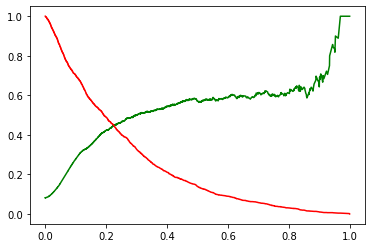

In [126]:
###Optimising threshhold value based on precision and recall

p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [127]:
###Predict based on threshhold value of 0.2

confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.iloc[:,3] )
print(confusion)

[[16073  3123]
 [  513  1208]]


In [128]:
print('Accuracy of the model at 0.2 threshhold is :',metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.iloc[:,4] ))
print('Precision of the model at 0.2 threshhold is :',metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.iloc[:,4] ))
print('Recall of the model at 0.2 threshhold is :',metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.iloc[:,4] ))
print('F1 score of the model at 0.2 threshhold is :',metrics.f1_score(y_train_pred_final.Churn, y_train_pred_final.iloc[:,4] ))

Accuracy of the model at 0.2 threshhold is : 0.9030931777979634
Precision of the model at 0.2 threshhold is : 0.42303822937625757
Recall of the model at 0.2 threshhold is : 0.4886693782684486
F1 score of the model at 0.2 threshhold is : 0.453491507144783


In [129]:
###Make prediction on test data

y_test_prob_pred = log_reg.predict_proba(df_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_prob_pred})
y_test_pred_final['predict_roc']= y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_test_pred_final['predict_precall']= y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [130]:
print('Accuracy of the model at 0.1 threshhold is :',metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predict_roc))
print('Precision of the model at 0.1 threshhold is :',metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.predict_roc ))
print('Recall of the model at 0.1 threshhold is :',metrics.recall_score(y_test_pred_final.Churn, y_test_pred_final.predict_roc))
print('F1 score of the model at 0.1 threshhold is :',metrics.f1_score(y_test_pred_final.Churn, y_test_pred_final.predict_roc ))

Accuracy of the model at 0.1 threshhold is : 0.8261015058561071
Precision of the model at 0.1 threshhold is : 0.2568858909499719
Recall of the model at 0.1 threshhold is : 0.6585014409221902
F1 score of the model at 0.1 threshhold is : 0.3695915891629599


In [131]:
print('Accuracy of the model at 0.2 threshhold is :',metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predict_precall))
print('Precision of the model at 0.2 threshhold is :',metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.predict_precall ))
print('Recall of the model at 0.2 threshhold is :',metrics.recall_score(y_test_pred_final.Churn, y_test_pred_final.predict_precall))
print('F1 score of the model at 0.2 threshhold is :',metrics.f1_score(y_test_pred_final.Churn, y_test_pred_final.predict_precall ))

Accuracy of the model at 0.2 threshhold is : 0.9031790295593977
Precision of the model at 0.2 threshhold is : 0.39232673267326734
Recall of the model at 0.2 threshhold is : 0.45677233429394815
F1 score of the model at 0.2 threshhold is : 0.4221038615179761


In [129]:
###Build Logistic regression by tuning parameters within the model to deal with class imbalance 

In [132]:
# define hyperparameters
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]

#w = [{0:1,1:99},{0:0.01,1:99}, {0:50,1:50}, 
 #     {0:0.09,1:99.01}]
crange = np.arange(0.5,10, 0.5)
hyperparam_grid = {"class_weight": w
                   ,"penalty": ["l1", "l2"]
                   ,"C": crange
                   ,"fit_intercept": [True, False]  }

In [133]:
# logistic model classifier
lg4 = LogisticRegression(random_state=13)
# define evaluation procedure
grid = GridSearchCV(lg4,hyperparam_grid,scoring="roc_auc", cv=5, n_jobs=-1, refit=True)
grid.fit(df_train_pca,y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.8206562796736522 with param: {'C': 0.5, 'class_weight': {0: 1.0, 1: 10}, 'fit_intercept': True, 'penalty': 'l2'}


In [134]:
###Fit model with the above parameters 

lg4 = LogisticRegression(random_state=13,C=0.5,fit_intercept=True, penalty='l2',class_weight={0:1.0, 1: 10} )
# fit it
lg4.fit(df_train_pca,y_train)
# test
y_pred = lg4.predict(df_test_pca)

In [135]:
###Making predictions on the test data 

print('Precision :-',metrics.precision_score(y_test,y_pred))
print('Accuracy :-',metrics.accuracy_score(y_test,y_pred))
print('Recall :-',metrics.recall_score(y_test,y_pred))

Precision :- 0.24635416666666668
Accuracy :- 0.8139431121026213
Recall :- 0.6815561959654178


In [ ]:
###The above model gives a good recall and accuracy value and is a potential model to be implemented , however 
###we need to check the peformance of other models to be able to compare and implement the best model

In [ ]:
##########################LOGISTIC REGRESSION WITH RESAMPLING- (Over sampling minority class)##############################

In [136]:
# concatenate our training data back together

resample_df=pd.DataFrame()
for i in range(df_train_pca.shape[1]):
      resample_df[i]=df_train_pca[:,i]
resample_df['churn']=np.array(y_train)
Non_Churn=resample_df[resample_df['churn']==0]
Churn=resample_df[resample_df['churn']==1]

In [137]:
###Upsample Churn cases and concatenate together with Non churn

Churn_upsampled = resample(Churn,
                          replace=True, # sample with replacement
                          n_samples=len(Non_Churn), # match number in majority class
                          random_state=27) # reproducible results
upsampled = pd.concat([Non_Churn, Churn_upsampled])

In [138]:
upsampled.churn.value_counts()

1    19196
0    19196
Name: churn, dtype: int64

In [139]:
###Create X and y instances of upsampled dataset

y_upsampled=upsampled.pop('churn')
X_upsampled=upsampled.copy()

In [140]:
log_reg_upsampled = LogisticRegression()
model_log_reg_upsampled = log_reg_upsampled.fit(X_upsampled,y_upsampled)

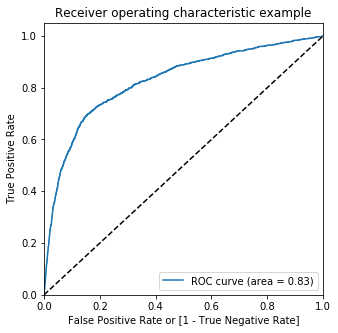

In [141]:
y_train_prob_pred_us = log_reg_upsampled.predict_proba(df_train_pca)[:,1]
y_train_pred_final_us = pd.DataFrame({'Churn':y_train, 'Churn_Prob':y_train_prob_pred_us})
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final_us.Churn, y_train_pred_final_us.Churn_Prob)

In [142]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_us[i]= y_train_pred_final_us.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_us.head()

Churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
29877      0        0.39    1    1    1    1    0    0    0    0    0    0
10242      0        0.12    1    1    0    0    0    0    0    0    0    0
9513       0        0.20    1    1    1    0    0    0    0    0    0    0
27493      0        0.17    1    1    0    0    0    0    0    0    0    0
29205      0        0.20    1    1    1    0    0    0    0    0    0    0

In [143]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_us.Churn, y_train_pred_final_us[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensi  speci
0.0   0.0      0.08   1.00   0.00
0.1   0.1      0.17   0.98   0.09
0.2   0.2      0.33   0.95   0.27
0.3   0.3      0.51   0.90   0.47
0.4   0.4      0.67   0.82   0.66
0.5   0.5      0.79   0.74   0.79
0.6   0.6      0.86   0.65   0.87
0.7   0.7      0.89   0.51   0.93
0.8   0.8      0.91   0.36   0.96
0.9   0.9      0.92   0.16   0.99


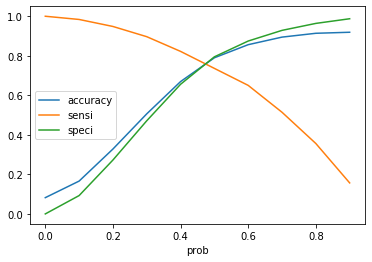

In [144]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

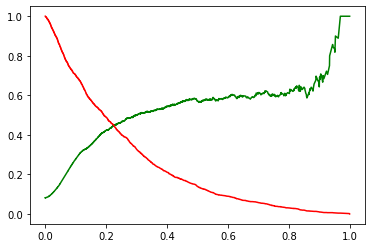

In [145]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [146]:
###Next we will try with threshhold of 0.4 and 0.2 

y_test_prob=log_reg_upsampled.predict_proba(df_test_pca)[:,1]

In [147]:
y_test_pred1=[1 if i>0.4 else 0 for i in y_test_prob]
y_test_pred2=[1 if i>0.2 else 0 for i in y_test_prob]

In [148]:
###Making Predictions on the training data

print('Precision :-',metrics.precision_score(y_test,y_test_pred1))
print('Accuracy :-',metrics.accuracy_score(y_test,y_test_pred1))
print('Recall :-',metrics.recall_score(y_test,y_test_pred1))

Precision :- 0.16475903614457832
Accuracy :- 0.6742889012827663
Recall :- 0.7881844380403458


In [149]:
###Making predictions on the test data

print('Precision :-',metrics.precision_score(y_test,y_test_pred2))
print('Accuracy :-',metrics.accuracy_score(y_test,y_test_pred2))
print('Recall :-',metrics.recall_score(y_test,y_test_pred2))

Precision :- 0.09619720426875093
Accuracy :- 0.32325711098717236
Recall :- 0.9221902017291066


In [ ]:
########Turns out with resampling although we have managed to improve recall ,it has come with an overall cost 
###of comprising Accuracy and Precision 

In [ ]:
##############################################RANDOM FOREST###########################################################

In [150]:
df_rf=df_hv.copy()
y=df_rf.pop('churn')
X=df_rf.copy()
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
#######################################Optimising parameters for random forest#########################################

In [151]:
###Optimising depth

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2,20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:1.0, 1: 10})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1.0, 1: 10}),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='recall')

In [152]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_depth             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0           1.11          0.02             0.03        3.86e-03               2   {'max_depth': 2}               0.70               0.70               0.68               0.68               0.70             0.69            0.01                2                0.69                0.68                0.72                0.70                0.71              0.70         1.50e-02
1           3.11          0.04             0.05        9.94e-04               7   {'max_depth': 7}               0.73               0.71               0.69               0.71               0.73             0.71            0.02                1                0.82                0.82                0.83                0.83                0.82              0.83         4.77e-03
2           4.33          0.05             0.06        5.05e-04              12  {'max_depth': 12}               0.63               0.61               0.60               0.62               0.64             0.62            0.01                3                0.94                0.95                0.94                0.94                0.95              0.94         2.68e-03
3           4.77          0.09             0.07        4.42e-03              17  {'max_depth': 17}               0.55               0.55               0.55               0.57               0.58             0.56            0.01                4                1.00                1.00                1.00                1.00                1.00              1.00         1.16e-03

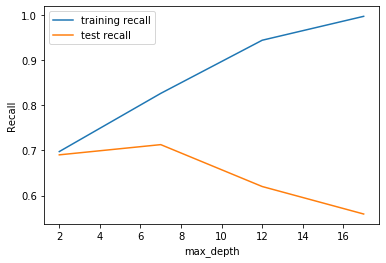

In [153]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [154]:
###Optimising number of estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(10,200,50)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight={0:1.0, 1: 10} )


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1.0, 1: 10}),
             param_grid={'n_estimators': range(10, 200, 50)},
             return_train_score=True, scoring='recall')

In [155]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_n_estimators                 params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0           0.55          0.02             0.01        4.92e-05                 10   {'n_estimators': 10}               0.35               0.33               0.36               0.31               0.33             0.34            0.02                4                0.91                0.91                0.91                0.89                 0.9               0.9         7.61e-03
1           3.21          0.04             0.05        1.62e-03                 60   {'n_estimators': 60}               0.40               0.37               0.42               0.35               0.39             0.39            0.02                2                1.00                1.00                1.00                1.00                 1.0               1.0         9.64e-04
2           5.92          0.05             0.08        3.91e-03                110  {'n_estimators': 110}               0.41               0.37               0.41               0.35               0.39             0.39            0.02                2                1.00                1.00                1.00                1.00                 1.0               1.0         3.56e-04
3           8.60          0.17             0.12        3.06e-03                160  {'n_estimators': 160}               0.41               0.38               0.41               0.35               0.40             0.39            0.02                1                1.00                1.00                1.00                1.00                 1.0               1.0         0.00e+00

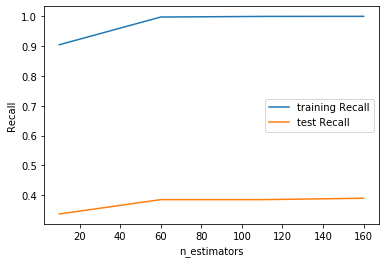

In [156]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training Recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test Recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [157]:
###Optimise maximum number of features to consider at each split


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [1,4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:1.0, 1: 10})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1.0, 1: 10}),
             param_grid={'max_features': [1, 4, 8, 14, 20, 24]},
             return_train_score=True, scoring='recall')

In [158]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_max_features                params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0           1.30          0.05             0.09        1.85e-03                  1   {'max_features': 1}               0.36               0.32               0.33               0.32               0.36             0.34            0.02                6                 1.0                 1.0                 1.0                 1.0                 1.0               1.0         3.56e-04
1           3.26          0.04             0.08        1.52e-03                  4   {'max_features': 4}               0.40               0.36               0.41               0.35               0.38             0.38            0.02                5                 1.0                 1.0                 1.0                 1.0                 1.0               1.0         2.90e-04
2           6.10          0.12             0.07        2.40e-03                  8   {'max_features': 8}               0.40               0.36               0.41               0.37               0.38             0.38            0.02                4                 1.0                 1.0                 1.0                 1.0                 1.0               1.0         9.19e-04
3          10.79          0.10             0.08        5.04e-04                 14  {'max_features': 14}               0.42               0.37               0.42               0.37               0.40             0.40            0.02                2                 1.0                 1.0                 1.0                 1.0                 1.0               1.0         2.91e-04
4          15.39          0.12             0.08        9.91e-04                 20  {'max_features': 20}               0.40               0.36               0.44               0.36               0.40             0.39            0.03                3                 1.0                 1.0                 1.0                 1.0                 1.0               1.0         2.90e-04

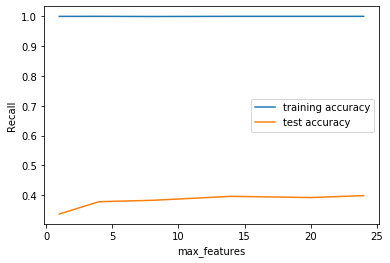

In [159]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()


In [160]:
###Optimise minimum samples in a leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:1.0, 1: 10})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1.0, 1: 10}),
             param_grid={'min_samples_leaf': range(50, 500, 50)},
             return_train_score=True, scoring='recall')

In [161]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_min_samples_leaf                     params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0           3.79          0.08             0.06        5.09e-03                     50   {'min_samples_leaf': 50}               0.76               0.73               0.71               0.72               0.72             0.73            0.02                9                0.81                0.82                0.82                0.82                0.81              0.82         3.20e-03
1           3.31          0.04             0.05        4.54e-04                    100  {'min_samples_leaf': 100}               0.79               0.74               0.71               0.74               0.75             0.74            0.03                4                0.79                0.80                0.80                0.79                0.80              0.80         2.94e-03
2           3.05          0.04             0.05        9.04e-04                    150  {'min_samples_leaf': 150}               0.78               0.74               0.72               0.74               0.75             0.74            0.02                3                0.78                0.79                0.79                0.79                0.78              0.78         6.46e-03
3           2.82          0.04             0.05        4.11e-04                    200  {'min_samples_leaf': 200}               0.79               0.74               0.72               0.75               0.74             0.75            0.03                1                0.78                0.78                0.78                0.78                0.78              0.78         2.63e-03
4           2.66          0.05             0.05        1.75e-03                    250  {'min_samples_leaf': 250}               0.80               0.74               0.71               0.74               0.75             0.75            0.03                1                0.77                0.77                0.77                0.77                0.77              0.77         2.63e-03

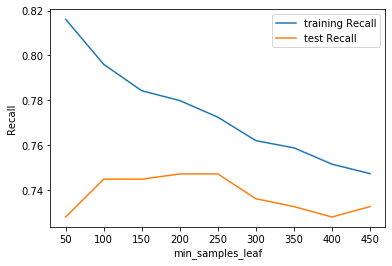

In [162]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training Recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test Recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [163]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(50,1000, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight={0:1.0, 1: 10})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1.0, 1: 10}),
             param_grid={'min_samples_split': range(50, 1000, 50)},
             return_train_score=True, scoring='recall')

In [164]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_min_samples_split                      params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0           5.29          0.17             0.07        5.84e-03                      50   {'min_samples_split': 50}               0.58               0.59               0.58               0.60               0.60             0.59        1.05e-02               19                0.88                0.88                0.88                0.89                0.89              0.88         2.00e-03
1           4.94          0.07             0.06        1.80e-03                     100  {'min_samples_split': 100}               0.67               0.66               0.65               0.66               0.66             0.66        9.52e-03               18                0.85                0.85                0.85                0.85                0.85              0.85         1.02e-03
2           4.73          0.03             0.07        5.30e-03                     150  {'min_samples_split': 150}               0.69               0.67               0.66               0.68               0.68             0.68        1.08e-02               17                0.83                0.83                0.83                0.84                0.83              0.83         5.10e-03
3           4.61          0.04             0.06        1.02e-03                     200  {'min_samples_split': 200}               0.71               0.69               0.67               0.69               0.70             0.69        1.33e-02               16                0.81                0.83                0.82                0.82                0.81              0.82         7.17e-03
4           4.53          0.09             0.06        1.63e-03                     250  {'min_samples_split': 250}               0.72               0.70               0.68               0.68               0.71             0.70        1.79e-02               15                0.81                0.82                0.81                0.81                0.81              0.81         3.13e-03

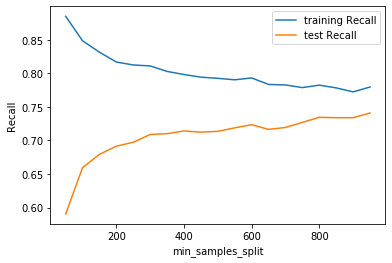

In [165]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training Recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test Recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [ ]:
######The below are the canidate values for the various hyperparameters 
###"max_depth":3,4,5,6,7
###"n-estimators":40,60,80,100
###"max_features":3,4,5
###'min_samples_leaf':100,150,200
###'min_samples_split':200,250,300,350,400

In [166]:
# Create the parameter grid based on the results of random search to create the best combination 

param_grid = {
    'max_depth': [3,4,5,6,7],
    'min_samples_leaf': [100,150,200],
    'min_samples_split': [200,250,300,350,400],
    'n_estimators': [40,60,80,100], 
    'max_features': [3,4,5]
}
# Create a based model
rf = RandomForestClassifier(class_weight={0:1.0, 1: 10})
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,scoring="recall",return_train_score=True)

In [167]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  9.7min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 1.0, 1: 10}),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [3, 4, 5],
                         'min_samples_leaf': [100, 150, 200],
                         'min_samples_split': [200, 250, 300, 350, 400],
                         'n_estimators': [40, 60, 80, 100]},
             return_train_score=True, scoring='recall', verbose=1)

In [169]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.7425707353558203 using {'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 150, 'min_samples_split': 350, 'n_estimators': 40}


In [170]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=150, 
                             min_samples_split=350,
                             max_features=3,
                             n_estimators=40,class_weight={0:1.0, 1: 10})

In [171]:
# fit
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.0, 1: 10}, max_depth=7,
                       max_features=3, min_samples_leaf=150,
                       min_samples_split=350, n_estimators=40)

In [172]:
# prediction on training set 
predictions_train = rfc.predict(X_train)

In [173]:
print(classification_report(y_train,predictions_train))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     19196
           1       0.37      0.76      0.50      1721

    accuracy                           0.87     20917
   macro avg       0.67      0.82      0.71     20917
weighted avg       0.93      0.87      0.89     20917



In [174]:
print('Accuracy score :',metrics.accuracy_score(y_train, predictions_train))
print('Precision score :',metrics.precision_score(y_train, predictions_train))
print('Recall score :',metrics.recall_score(y_train, predictions_train))

Accuracy score : 0.8734522159009418
Precision score : 0.3695039458850056
Recall score : 0.7617664148750727


In [175]:
###Prediction on testing set

predictions_test = rfc.predict(X_test)

In [176]:
print('Accuracy score :',metrics.accuracy_score(y_test, predictions_test))
print('Precision score :',metrics.precision_score(y_test, predictions_test))
print('Recall score :',metrics.recall_score(y_test, predictions_test))

Accuracy score : 0.8729503625209146
Precision score : 0.34812286689419797
Recall score : 0.7348703170028819


In [ ]:
################The recall and accuracy score is suffcinetly high for this model on the test data

In [ ]:
###################################################SVM MODEL############################################################

In [177]:
df_highval_svm=df_hv.copy()

In [178]:
# splitting into X and y
X = df_highval_svm.drop("churn", axis = 1)
y = df_highval_svm['churn']

In [179]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

In [180]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9167875069715561


In [183]:
print(metrics.recall_score(y_test, y_pred))

0.0


In [184]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)
print(metrics.recall_score(y_test, y_pred))

0.1032171581769437


In [185]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)   

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 15.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='recall', verbose=1)

In [186]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C param_gamma                     params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
0           5.88          0.11             0.89        2.75e-02       1        0.01    {'C': 1, 'gamma': 0.01}               0.04               0.04               0.08               0.08               0.07             0.06        1.49e-02                6                0.11            1.21e-01            1.25e-01                0.12                0.12          1.19e-01         6.75e-03
1           5.06          0.09             0.77        1.44e-02       1       0.001   {'C': 1, 'gamma': 0.001}               0.00               0.00               0.00               0.00               0.00             0.00        0.00e+00                9                0.00            7.51e-04            7.46e-04                0.00                0.00          3.00e-04         3.67e-04
2           4.34          0.14             0.78        9.40e-03       1      0.0001  {'C': 1, 'gamma': 0.0001}               0.00               0.00               0.00               0.00               0.00             0.00        0.00e+00                9                0.00            0.00e+00            0.00e+00                0.00                0.00          0.00e+00         0.00e+00
3           7.22          0.13             0.93        1.77e-02      10        0.01   {'C': 10, 'gamma': 0.01}               0.18               0.19               0.16               0.22               0.20             0.19        2.07e-02                3                0.33            3.45e-01            3.54e-01                0.35                0.34          3.43e-01         7.51e-03
4           5.47          0.19             0.76        5.83e-03      10       0.001  {'C': 10, 'gamma': 0.001}               0.01               0.01               0.02               0.02               0.02             0.02        3.42e-03                7                0.03            3.76e-02            3.51e-02                0.03                0.03          3.29e-02         3.39e-03

In [187]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.2963520480731232 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


In [ ]:
####The test recall score is below par compared to random forest

In [ ]:
################################################XG Boosting#######################################################

In [188]:
X_xgb = df_hv.drop('churn', axis=1)
y_xgb = df_hv[['churn']]

# split data into train and test/validation sets
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb,y_xgb, test_size=0.20, random_state=101)

In [189]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             'n_estimators': [100,200,300]}          


# specify model
xgb_model = XGBClassifier(max_depth=2)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

In [190]:
# fit the model
model_cv.fit(X_xgb_train, y_xgb_train)       

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  1.3min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [191]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.4109375 corresponding to hyperparameters {'learning_rate': 0.2, 'n_estimators': 300, 'subsample': 0.9}


In [192]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
# params = {'learning_rate': 0.2,
#           'max_depth': 2, 
#           'n_estimators':200,
#           'subsample':0.9,
#          'objective':'binary:logistic}

# fit model on training data
model = XGBClassifier(max_depth=2,learning_rate=0.2,n_estimators=200,subsample=0.9,objective='binary:logistic')
model.fit(X_xgb_train, y_xgb_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [193]:
# predict
y_pred = model.predict_proba(X_xgb_test)
y_pred[:10]

array([[0.99843234, 0.00156769],
       [0.48019063, 0.51980937],
       [0.9983641 , 0.00163589],
       [0.9985003 , 0.00149974],
       [0.99884963, 0.00115038],
       [0.9586974 , 0.04130262],
       [0.9790797 , 0.0209203 ],
       [0.87819326, 0.12180676],
       [0.99647075, 0.00352926],
       [0.9920209 , 0.0079791 ]], dtype=float32)

In [197]:
# Test Recall score
sklearn.metrics.recall_score(y_xgb_test, model.predict(X_xgb_test))


0.4080808080808081

In [198]:
# feature importance
importance = dict(zip(X_xgb_train.columns, model.feature_importances_))


In [199]:
sorted(importance.items(), key=lambda item: item[1],reverse=True)[:10]

[('arpu_6_7_8', 0.07727263),
 ('avg_rech_amt_6_7_8', 0.061068136),
 ('total_rech_num_6_7_8', 0.06061029),
 ('last_day_rch_amt_6_7_8', 0.04547589),
 ('total_rech_amt_6_7_8', 0.037910502),
 ('loc_ic_mou_6_7_8', 0.03760847),
 ('vol_data_mb_6_7_8', 0.03642528),
 ('std_ic_mou_6_7_8', 0.034342546),
 ('loc_ic_t2m_mou_6_7_8', 0.034179594),
 ('fb_user_6_7_8', 0.03326441)]

In [ ]:
########################The best recall score is below par compared to random forest ################################

In [ ]:
###Based on the scores obtained for various models the most optimum model for prediction is the random forest

#############################################MODEL FOR INTERPRETATION################################################

In [ ]:
###Feature importance using Random Forest

In [200]:
#putting features variables in X
X = df_hv.drop(['churn'], axis=1)

#putting response variables in Y
y =df_hv['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [203]:
scaler = StandardScaler()

In [204]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

In [205]:
rf= RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=150,
                             min_samples_split=350,
                             max_features=3,
                             n_estimators=40,class_weight={0:1.0, 1: 10})

In [206]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1.0, 1: 10}, max_depth=7,
                       max_features=3, min_samples_leaf=150,
                       min_samples_split=350, n_estimators=40)

In [214]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)

In [219]:
print('The top 10 important features according to Random Forest are' ,feat_importances.sort_values(ascending=False).head(10))

The top 10 important features according to Random Forest are loc_ic_t2t_mou_6_7_8      0.08
total_month_rech_6_7_8    0.07
total_rech_amt_6_7_8      0.07
total_og_mou_6_7_8        0.07
arpu_6_7_8                0.05
loc_ic_t2m_mou_6_7_8      0.05
avg_rech_amt_6_7_8        0.04
total_ic_mou_6_7_8        0.04
loc_ic_t2f_mou_6_7_8      0.03
loc_ic_mou_6_7_8          0.03
dtype: float64


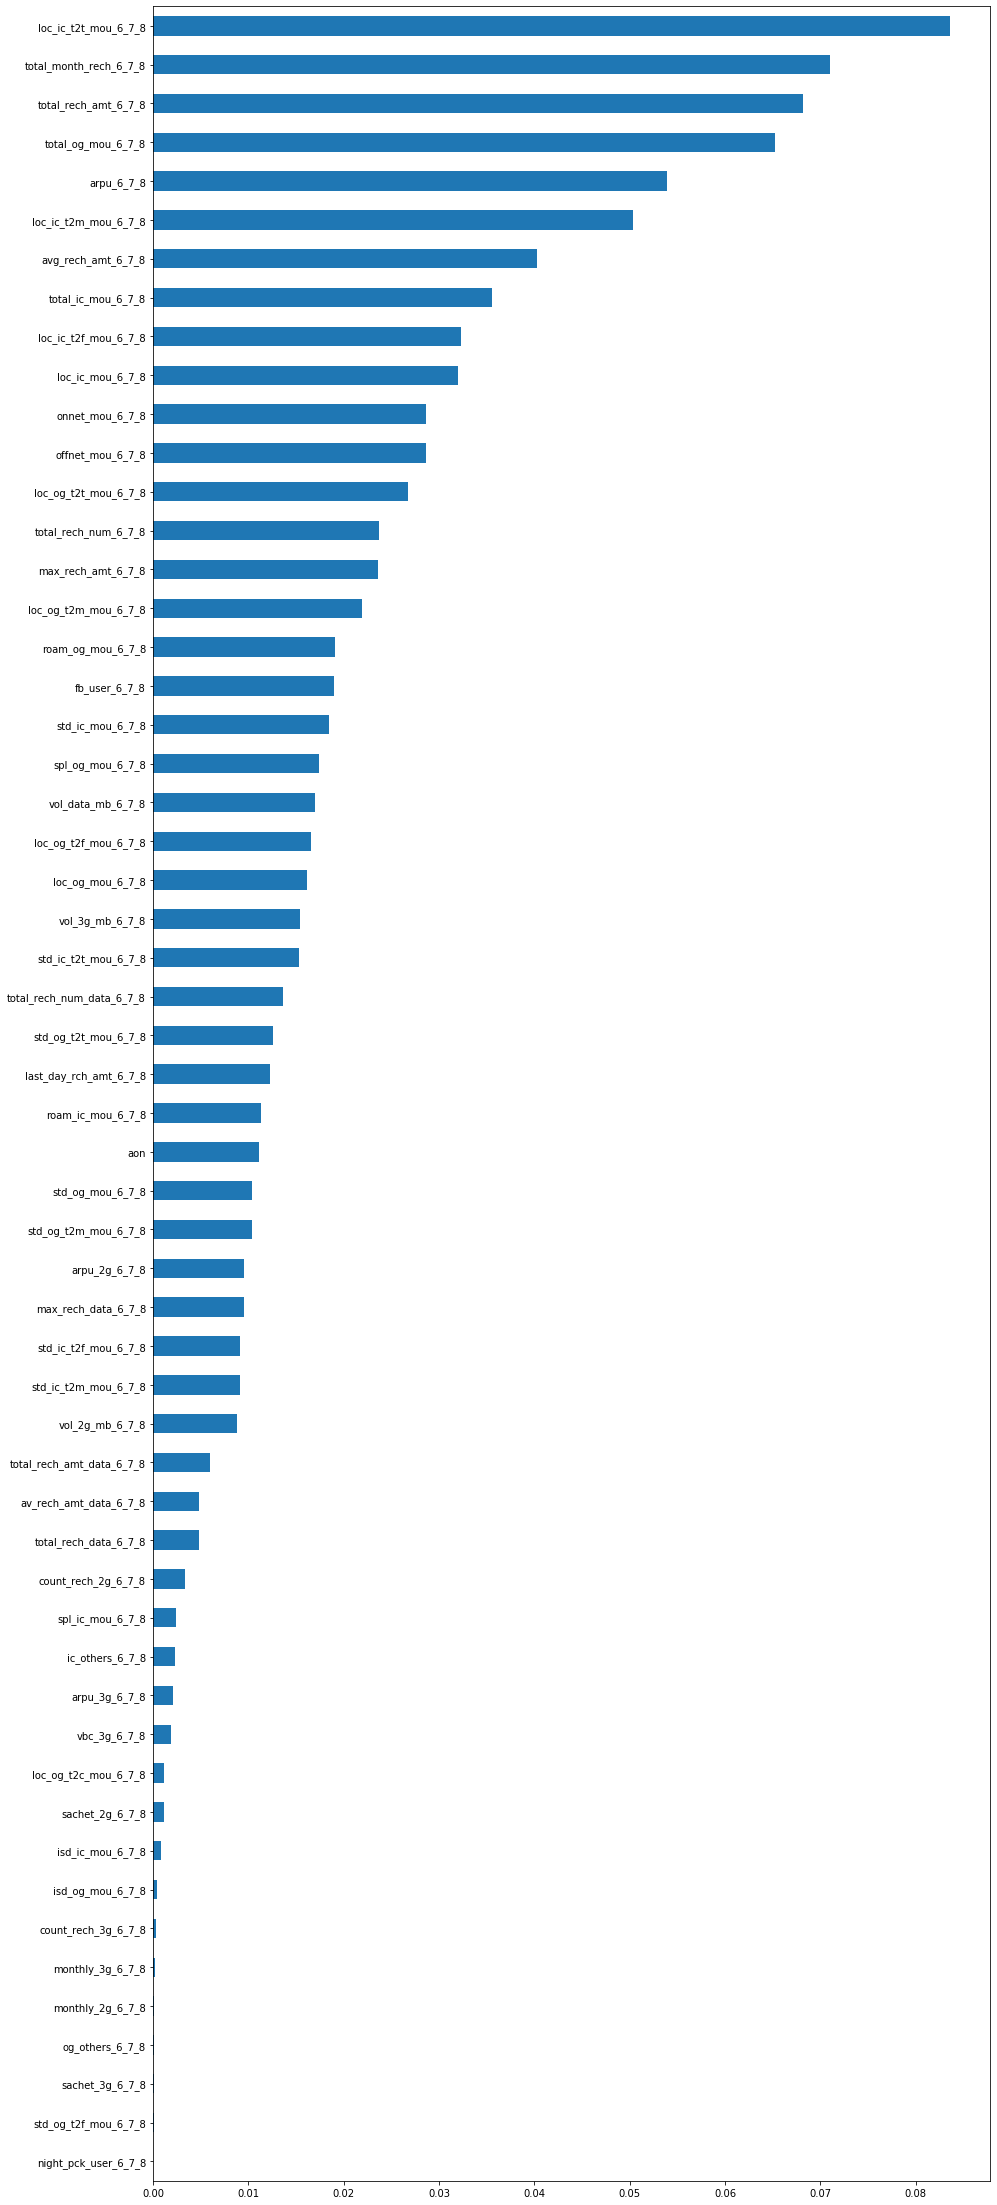

In [220]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')
plt.show()

In [ ]:
###Feature importance using XGBosst

In [208]:
X_xgb = df_hv.drop('churn', axis=1)
y_xgb = df_hv[['churn']]
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb,y_xgb, test_size=0.20, random_state=101)

In [209]:
model = XGBClassifier(max_depth=2,learning_rate=0.2,n_estimators=200,subsample=0.9,objective='binary:logistic')
model.fit(X_xgb_train, y_xgb_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [210]:
importance = dict(zip(X_xgb_train.columns, model.feature_importances_))
sorted(importance.items(), key=lambda item: item[1],reverse=True)[:10]

[('arpu_6_7_8', 0.07727263),
 ('avg_rech_amt_6_7_8', 0.061068136),
 ('total_rech_num_6_7_8', 0.06061029),
 ('last_day_rch_amt_6_7_8', 0.04547589),
 ('total_rech_amt_6_7_8', 0.037910502),
 ('loc_ic_mou_6_7_8', 0.03760847),
 ('vol_data_mb_6_7_8', 0.03642528),
 ('std_ic_mou_6_7_8', 0.034342546),
 ('loc_ic_t2m_mou_6_7_8', 0.034179594),
 ('fb_user_6_7_8', 0.03326441)]

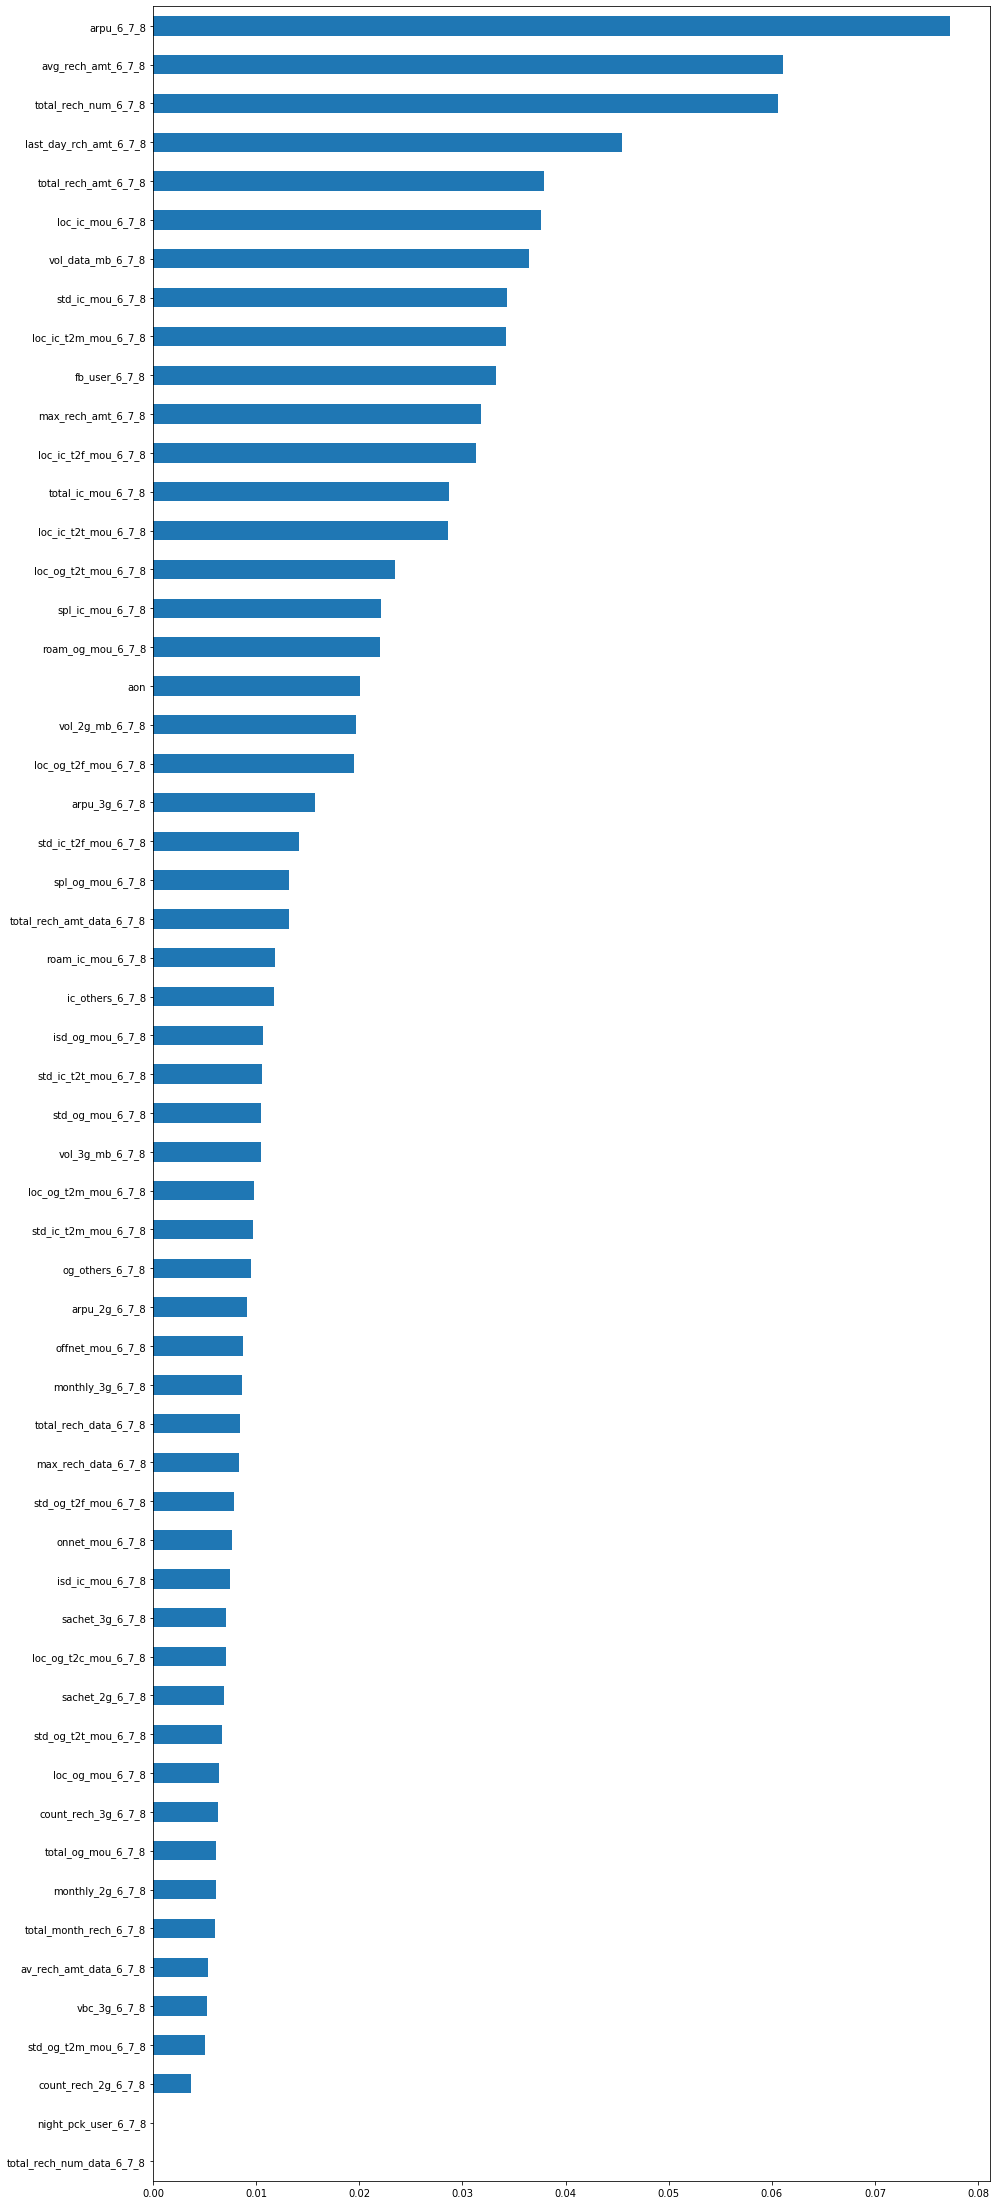

In [222]:
plt.figure(figsize=(15,40))
feat_top_10 = pd.Series(model.feature_importances_,index=X_xgb_train.columns)
feat_top_10.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')
plt.show()

In [ ]:
###The 2 above models are mostly in agreement and some of the most important features are 
###arpu
###avg_rech_amt
###loc_ic_mou
###vol_data_mb
###loc_ic_t2m_mou
###total_og_mou
###total_month_rech
###std_ic
###std_og

In [ ]:
############################################Business Recomendation#################################################

#1-It appears from above it is a good identifier to identify a customer as a potential churn in the near future 
#when the average revnue per user drops and the customers stops or slowly starts reducing his recrage amount on calling
#or data 
#2.In some cases it appears the customer's incoming call is also dropping between the good and action months 
#signifying probably these are cases where a customer has already switched to a different operator already .This underlines
#the need to review and validate our business rules for identifying churn in the first place 
#3.It appears in some cases the customer is churing after he has spent a significant amount for std incoming and outgoing
#We should look to provide a tiered plan for high usage customers in std which bills then low rates after a threshhold
#4.We should also look to provide cheaper rates for data when the customer shows signs of churn 

In [ ]:
#############################################End of Assignment############################################################